In [1]:
# Import all the basic libraries:
# We will be importing other libraries throughout our process. 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# The file sits on my notebook directory so I can just read the file as the following: 
df = pd.read_csv('Loan_status_2007-2020Q3-100ksample.csv')

In [3]:
# Lets see all the columns available:
list(df.columns)

['Unnamed: 0.1',
 'Unnamed: 0',
 'id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_j

In [4]:
# Lets look at the number of columns we are dealing with:
len(list(df.columns))

143

In [5]:
# We will store the target variable here as it might be needed further when down when testing/EDA.
target_var = df['loan_status']

In [6]:
# Lets found out the number of null data in each columns:
df.isnull().sum().to_dict()

{'Unnamed: 0.1': 0,
 'Unnamed: 0': 0,
 'id': 0,
 'loan_amnt': 0,
 'funded_amnt': 0,
 'funded_amnt_inv': 0,
 'term': 0,
 'int_rate': 0,
 'installment': 0,
 'grade': 0,
 'sub_grade': 0,
 'emp_title': 8954,
 'emp_length': 6950,
 'home_ownership': 0,
 'annual_inc': 0,
 'verification_status': 0,
 'issue_d': 0,
 'loan_status': 0,
 'pymnt_plan': 0,
 'url': 0,
 'purpose': 0,
 'title': 780,
 'zip_code': 0,
 'addr_state': 0,
 'dti': 102,
 'delinq_2yrs': 0,
 'earliest_cr_line': 0,
 'fico_range_low': 0,
 'fico_range_high': 0,
 'inq_last_6mths': 0,
 'mths_since_last_delinq': 52814,
 'mths_since_last_record': 85370,
 'open_acc': 0,
 'pub_rec': 0,
 'revol_bal': 0,
 'revol_util': 81,
 'total_acc': 0,
 'initial_list_status': 0,
 'out_prncp': 0,
 'out_prncp_inv': 0,
 'total_pymnt': 0,
 'total_pymnt_inv': 0,
 'total_rec_prncp': 0,
 'total_rec_int': 0,
 'total_rec_late_fee': 0,
 'recoveries': 0,
 'collection_recovery_fee': 0,
 'last_pymnt_d': 191,
 'last_pymnt_amnt': 0,
 'next_pymnt_d': 63573,
 'last_cred

In [7]:
# There seems to be a lot of columns with null so lets drop columns with more than 90% null as they
# lack sufficient data for meaningful analysis. Retaining them could lead to biased conclusions or ineffective models.

# Another reason is feature utility so if more than half the values are missing, the feature may not be reliable or relevant for model training. 
# Removing these columns ensures we focus on the most informative features.

# Dropping will also help with Computational Efficiency: Handling large amounts of missing data (especially if imputed) 
# increases processing time and complexity, which can slow down the model training pipeline.

In [8]:
def remove_90_more_null(df):
    for col in df.columns:
        # Checks for columns with that have 90% null:
        if df[col].isnull().sum()>90000:
            # If the column is more than 90% then we drop from our original df:
            df.drop(col,axis=1, inplace=True)
    return df

# Make the original column equal to the dropped df:
df=remove_90_more_null(df)

In [9]:
# Drop unnecessary index columns: These appear to be duplicate index columns without meaningful information.
df = df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0','id'])

In [10]:
# The URL contains redundant information (loan_id) and isn't useful for analysis.
df = df.drop('url', axis=1)


In [11]:
# Check consistency between loan amount columns
df[['loan_amnt','funded_amnt','funded_amnt','funded_amnt_inv']].corr()

,loan_amnt,funded_amnt,funded_amnt,funded_amnt_inv
loan_amnt,1.000000,0.999829,0.999829,0.999297
funded_amnt,0.999829,1.000000,1.000000,0.999510
funded_amnt,0.999829,1.000000,1.000000,0.999510
funded_amnt_inv,0.999297,0.999510,0.999510,1.000000


In [12]:
# As we can see they are all similar and correlated and hence we should drop 3 of them as it reduces curse of
# dimensionality and reduces multicollinearity

In [13]:
df = df.drop(['funded_amnt','funded_amnt','funded_amnt_inv'], axis=1)

In [14]:
# As we can see both 'term' and 'int_rates' should be numerical values as converting to 
# numeric types will enable mathematical operations:
df['term'] = list(map(lambda x: int(x.split()[0]),df['term']))

In [15]:
# Similarly with int_rate column:
df['int_rate'] = list(map(lambda x: float(x.split('%')[0].strip()),df['int_rate']))

In [16]:
# As we can see the employment information seems to be formatted with text data type which is not helpful to the model
# so we can replace the data with known integers:
emp_length_mapping = {
    '< 1 year': 0,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10
}
df['emp_length'] = df['emp_length'].map(emp_length_mapping)

In [17]:
df['emp_length']

0        10.0
1         6.0
2        10.0
3         NaN
4        10.0
         ... 
99995     1.0
99996     2.0
99997    10.0
99998    10.0
99999     NaN
Name: emp_length, Length: 100000, dtype: float64

In [18]:
# Lets check the data type for revol_util: 
type(df['revol_util'][0].split('%')[0])

str

In [19]:
# As we can see its string so we need to convert this:

In [20]:
df['revol_util']

0        82.8%
1        64.5%
2        52.6%
3        12.1%
4        27.1%
         ...  
99995      73%
99996    18.6%
99997    83.7%
99998    47.6%
99999    64.8%
Name: revol_util, Length: 100000, dtype: object

In [21]:
# Since it contains decimal value, lets convert it to float and replace the '%' with nothing:
df['revol_util'] = df['revol_util'].str.replace('%', '').astype(float)

In [22]:
df['revol_util']

0        82.8
1        64.5
2        52.6
3        12.1
4        27.1
         ... 
99995    73.0
99996    18.6
99997    83.7
99998    47.6
99999    64.8
Name: revol_util, Length: 100000, dtype: float64

In [23]:
# Zipcode might contain important information and can be correlated with the target variable so lets keep this
# and remove the 'xx' from as it provides redundant information
df['zip_code']

0        115xx
1        708xx
2        347xx
3        443xx
4        681xx
         ...  
99995    488xx
99996    913xx
99997    934xx
99998    301xx
99999    856xx
Name: zip_code, Length: 100000, dtype: object

In [24]:
df['zip_code'] = list(map(lambda x: int(x.split('xx')[0]),df['zip_code']))

In [25]:
# Lets see if the above has worked properly:
df['zip_code']

0        115
1        708
2        347
3        443
4        681
        ... 
99995    488
99996    913
99997    934
99998    301
99999    856
Name: zip_code, Length: 100000, dtype: int64

In [26]:
# We also see there are is a column for 'addr_state' and now we have to decide whether to keep it or leave it. 
# We will keep it if its not correlated with zip code and if it shows no additional information than the zipcode

In [27]:
# As we can see nearly every zip_code maps to exactly one addr_state (i.e., the output is 1 with a count equal to the number of unique zip_codes), 
# therefore the addr_state is somewhat redundant and so therefore lets drop it:
df.groupby("zip_code")["addr_state"].nunique().value_counts()

addr_state
1    751
2    113
3     11
4      3
Name: count, dtype: int64

In [28]:
# Lets drop it:
df.drop('addr_state', axis=1, inplace=True)

In [29]:
# As we can see this contains the same information across all the rows, this will not be a usefull input for the model:
df['pymnt_plan'].value_counts()

pymnt_plan
n    100000
Name: count, dtype: int64

In [30]:
# Lets drop it:
df.drop('pymnt_plan', axis=1, inplace=True)

In [31]:
# Lets deal with outliers! 
# The step taken is to first remove the outliers and then impute the nulls, the reason this was chosen was because
# outliers can skew imputation so removing them first ensures nulls are filled with more representative values. 

# Secondly imputing nulls before handling outliers might propagate errors so filling nulls with values influenced by outliers

In [32]:
'''
its important to realise that removing outliers lead to 'NA' columns and therefore this NA can intefere with original
NA of the data. On the other hand, removing them means we loose the entire row which could contain important information
for the model. To account for this, I have decided to impute the outliers instead of removing them or creating 'NA'.'''

"\nits important to realise that removing outliers lead to 'NA' columns and therefore this NA can intefere with original\nNA of the data. On the other hand, removing them means we loose the entire row which could contain important information\nfor the model. To account for this, I have decided to impute the outliers instead of removing them or creating 'NA'."

In [33]:
'''
Its also important to realise that imputing outliers is normally done if the outliers are recorded via 
data collection errors so though imputing them is not the ideal way to go, however it can have some benefits: 
Removing too many outliers can bias the analysis
If the outlier row has other useful features, dropping it means you lose all that info.
This method also allows for imputing the original nulls further down the line '''

'\nIts also important to realise that imputing outliers is normally done if the outliers are recorded via \ndata collection errors so though imputing them is not the ideal way to go, however it can have some benefits: \nRemoving too many outliers can bias the analysis\nIf the outlier row has other useful features, dropping it means you lose all that info.\nThis method also allows for imputing the original nulls further down the line '

In [34]:
# With that being said, lets handle outliers! 

In [35]:
# For now the outliers we are going to deal with is just numeric values so lets filter for those:
df_numeric = df.select_dtypes(include='number')
df_numeric

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,zip_code,dti,delinq_2yrs,fico_range_low,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,4000.0,36,13.08,134.93,10.0,48000.0,115,20.25,1.0,665.0,...,0.0,0.0,75.0,NaN,1.0,0.0,395328.0,11948.0,0.0,17928.0
1,24000.0,60,9.16,500.07,6.0,57000.0,708,25.33,0.0,680.0,...,0.0,1.0,95.8,60.0,0.0,0.0,88154.0,61815.0,13000.0,52954.0
2,5000.0,36,10.49,162.49,10.0,55000.0,347,7.22,0.0,665.0,...,0.0,1.0,100.0,33.3,0.0,1.0,171118.0,13124.0,10000.0,7526.0
3,24000.0,60,11.05,522.42,NaN,43500.0,443,24.55,0.0,750.0,...,0.0,2.0,95.7,0.0,0.0,0.0,202606.0,18520.0,49000.0,20000.0
4,14000.0,60,13.59,322.79,10.0,48000.0,681,24.30,0.0,735.0,...,0.0,4.0,100.0,0.0,0.0,0.0,152081.0,34847.0,28800.0,38181.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3300.0,36,11.49,108.81,1.0,60000.0,488,17.98,1.0,670.0,...,0.0,1.0,50.0,40.0,0.0,0.0,42449.0,28437.0,32800.0,8449.0
99996,6000.0,36,9.80,193.05,2.0,150000.0,913,13.13,0.0,715.0,...,0.0,2.0,100.0,8.3,0.0,0.0,105169.0,38741.0,35800.0,41369.0
99997,10000.0,60,19.99,264.89,10.0,48000.0,934,27.79,2.0,660.0,...,0.0,5.0,85.2,75.0,0.0,0.0,37534.0,21445.0,9400.0,26234.0
99998,10625.0,36,8.81,336.94,10.0,90000.0,301,27.58,0.0,765.0,...,0.0,2.0,93.9,11.1,0.0,0.0,527675.0,73748.0,53400.0,30000.0


In [36]:
# The following columns are protected from outliers or imputing the outliers as normally
# FICO scores are standardized; "outliers" may indicate critical risk cases

# Business logic prevents invalid terms so we should not look for outliers in the 'term' columns

# outliers for int_rate are often data errors, not outliers so lets to impute them with outliers:
df_no_outlier = df_numeric[['fico_range_low','fico_range_high','term','int_rate']]

# These are the columns that contain too many zeros and therefore should not be targetted with outlier imputation and we will deal with them
# separately:
df_zero_inflated = df_numeric[['delinq_2yrs', 'pub_rec', 'collections_12_mths_ex_med','acc_now_delinq', 'chargeoff_within_12_mths','total_rec_late_fee','tot_coll_amt','delinq_amnt','num_tl_120dpd_2m','num_tl_30dpd','tax_liens']]

# Lets combine the above two dataframe to 'df_no_outlier_processing' and this will not go through any outlier imputation:
df_no_outlier_processing = pd.concat([df_no_outlier,df_zero_inflated], axis=1)
df_no_outlier_processing

,fico_range_low,fico_range_high,term,int_rate,delinq_2yrs,pub_rec,collections_12_mths_ex_med,acc_now_delinq,chargeoff_within_12_mths,total_rec_late_fee,tot_coll_amt,delinq_amnt,num_tl_120dpd_2m,num_tl_30dpd,tax_liens
0,665.0,669.0,36,13.08,1.0,1.0,1.0,0.0,0.0,0.0,3832.0,0.0,0.0,0.0,0.0
1,680.0,684.0,60,9.16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,665.0,669.0,36,10.49,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,750.0,754.0,60,11.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,735.0,739.0,60,13.59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,670.0,674.0,36,11.49,1.0,0.0,0.0,0.0,0.0,0.0,1021.0,0.0,0.0,0.0,0.0
99996,715.0,719.0,36,9.80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,660.0,664.0,60,19.99,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,765.0,769.0,36,8.81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
# Lets drop the no outlier column from the original df, leaving us with columns to deal with outliers:
df_outlier_processing = df_numeric.drop(df_no_outlier_processing, axis=1)

In [38]:
'''
The approach taken to impute outlier is to look at the skew of each column and then divide them into what can be
cannot be done. The following range of skew was chosen:
<2 - low skew
2-15 - moderate skew
>15 - high skew'''

'\nThe approach taken to impute outlier is to look at the skew of each column and then divide them into what can be\ncannot be done. The following range of skew was chosen:\n<2 - low skew\n2-15 - moderate skew\n>15 - high skew'

In [39]:
df_outlier_processing.skew()

loan_amnt                      0.788737
installment                    1.006234
emp_length                    -0.164088
annual_inc                    47.015555
zip_code                       0.060804
                                ...    
pub_rec_bankruptcies           3.332470
tot_hi_cred_lim                2.694842
total_bal_ex_mort              3.415134
total_bc_limit                 2.686337
total_il_high_credit_limit     2.878206
Length: 74, dtype: float64

In [40]:
from scipy.stats import zscore

In [41]:
# Lets filter out the columns that have skew less than 2:
df_skew_less_2 = df_outlier_processing.loc[:, abs(df_outlier_processing.skew()) < 2]
df_skew_less_2

,loan_amnt,installment,emp_length,zip_code,mths_since_last_delinq,mths_since_last_record,open_acc,revol_util,total_acc,total_pymnt,...,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_op_past_12m,percent_bc_gt_75
0,4000.0,134.93,10.0,115,19.0,110.0,4.0,82.8,12.0,266.950000,...,0.0,2.0,0.0,1.0,2.0,5.0,2.0,4.0,0.0,NaN
1,24000.0,500.07,6.0,708,NaN,NaN,10.0,64.5,24.0,25496.160000,...,3.0,5.0,5.0,6.0,7.0,9.0,5.0,10.0,1.0,60.0
2,5000.0,162.49,10.0,347,NaN,61.0,7.0,52.6,9.0,5846.672836,...,3.0,5.0,3.0,3.0,5.0,6.0,5.0,7.0,1.0,33.3
3,24000.0,522.42,NaN,443,NaN,NaN,15.0,12.1,23.0,12000.930000,...,6.0,7.0,11.0,16.0,13.0,19.0,7.0,15.0,2.0,0.0
4,14000.0,322.79,10.0,681,NaN,NaN,16.0,27.1,23.0,16605.680000,...,4.0,5.0,5.0,6.0,13.0,16.0,5.0,16.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3300.0,108.81,1.0,488,23.0,NaN,7.0,73.0,14.0,3554.758909,...,4.0,5.0,5.0,6.0,6.0,7.0,5.0,7.0,1.0,40.0
99996,6000.0,193.05,2.0,913,NaN,NaN,25.0,18.6,34.0,6718.690113,...,6.0,8.0,15.0,19.0,22.0,27.0,8.0,25.0,2.0,8.3
99997,10000.0,264.89,10.0,934,14.0,NaN,9.0,83.7,27.0,3962.240000,...,4.0,7.0,4.0,10.0,7.0,22.0,7.0,9.0,5.0,75.0
99998,10625.0,336.94,10.0,301,36.0,NaN,23.0,47.6,49.0,2690.320000,...,7.0,10.0,9.0,16.0,18.0,36.0,10.0,23.0,2.0,11.1


In [42]:
# Here I have created a function for df_skew_less_2 where we take the z_score of each column and if
# the score if above 3, we impute them with the mean of the column.

# nan_policy='omit' is implemented to ensure that z_score is not effected by the originals null data in the column:
# Adding nan_policy='omit' also ensures that we are keeping the original nan_policy='omit' which can later be imputed down the line:

# The reason mean is chosen as the imputation method is because the skew is less than 2, the mean isn't heavily distorted

def skew_less_2_mean(df_skew_less_2):
    
     # Iterate over each column in the dataframe which has skew less than 2:
    for col in df_skew_less_2.columns:
        z_scores = np.abs(zscore(df_skew_less_2[col], nan_policy='omit'))
        
        # Calculate the column mean (excluding NaNs)
        col_mean = df_skew_less_2[col].mean()
        
        # Replace values with Z-score > 3 (outliers) with the column mean
        df_skew_less_2[col] = np.where(z_scores > 3, col_mean, df_skew_less_2[col])
    
    return df_skew_less_2
df_skew_less_2_no_out = skew_less_2_mean(df_skew_less_2)

# We will create a new df that ensures that it has not outliers:
df_skew_less_2_no_out

/var/folders/1q/jjlnxt5j4dg2mnmw35tf858m0000gn/T/ipykernel_1631/1104782792.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_skew_less_2[col] = np.where(z_scores > 3, col_mean, df_skew_less_2[col])
/var/folders/1q/jjlnxt5j4dg2mnmw35tf858m0000gn/T/ipykernel_1631/1104782792.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_skew_less_2[col] = np.where(z_scores > 3, col_mean, df_skew_less_2[col])
/var/folders/1q/jjlnxt5j4dg2mnmw35tf858m0000gn/T/ipykernel_1631/1104782792.py:19: SettingWithCopyWarning

,loan_amnt,installment,emp_length,zip_code,mths_since_last_delinq,mths_since_last_record,open_acc,revol_util,total_acc,total_pymnt,...,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_op_past_12m,percent_bc_gt_75
0,4000.0,134.93,10.0,115.0,19.0,110.0,4.0,82.8,12.0,266.950000,...,0.0,2.0,0.000000,1.0,2.0,5.0,2.0,4.0,0.0,NaN
1,24000.0,500.07,6.0,708.0,NaN,NaN,10.0,64.5,24.0,25496.160000,...,3.0,5.0,5.000000,6.0,7.0,9.0,5.0,10.0,1.0,60.0
2,5000.0,162.49,10.0,347.0,NaN,61.0,7.0,52.6,9.0,5846.672836,...,3.0,5.0,3.000000,3.0,5.0,6.0,5.0,7.0,1.0,33.3
3,24000.0,522.42,NaN,443.0,NaN,NaN,15.0,12.1,23.0,12000.930000,...,6.0,7.0,11.000000,16.0,13.0,19.0,7.0,15.0,2.0,0.0
4,14000.0,322.79,10.0,681.0,NaN,NaN,16.0,27.1,23.0,16605.680000,...,4.0,5.0,5.000000,6.0,13.0,16.0,5.0,16.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3300.0,108.81,1.0,488.0,23.0,NaN,7.0,73.0,14.0,3554.758909,...,4.0,5.0,5.000000,6.0,6.0,7.0,5.0,7.0,1.0,40.0
99996,6000.0,193.05,2.0,913.0,NaN,NaN,25.0,18.6,34.0,6718.690113,...,6.0,8.0,4.858508,19.0,22.0,27.0,8.0,25.0,2.0,8.3
99997,10000.0,264.89,10.0,934.0,14.0,NaN,9.0,83.7,27.0,3962.240000,...,4.0,7.0,4.000000,10.0,7.0,22.0,7.0,9.0,5.0,75.0
99998,10625.0,336.94,10.0,301.0,36.0,NaN,23.0,47.6,49.0,2690.320000,...,7.0,10.0,9.000000,16.0,18.0,36.0,10.0,23.0,2.0,11.1


In [43]:
# Lets filter df that only contains skew between 2 and 15:
df_skew_between_2_15 = df_outlier_processing.loc[:, (abs(df_outlier_processing.skew()) >= 2) & (abs(df_outlier_processing.skew()) < 15)]
df_skew_between_2_15

,inq_last_6mths,revol_bal,out_prncp,out_prncp_inv,total_rec_int,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_low,tot_cur_bal,...,mths_since_recent_bc,num_accts_ever_120_pd,num_il_tl,num_tl_90g_dpd_24m,pct_tl_nvr_dlq,pub_rec_bankruptcies,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,0.0,1988.0,3816.34,3816.34,83.29,0.0,0.0,134.93,665.0,259024.0,...,NaN,1.0,5.0,0.0,75.0,1.0,395328.0,11948.0,0.0,17928.0
1,0.0,22697.0,4333.29,4333.29,5829.45,0.0,0.0,500.07,700.0,61815.0,...,7.0,0.0,15.0,0.0,95.8,0.0,88154.0,61815.0,13000.0,52954.0
2,0.0,6001.0,0.00,0.00,846.67,0.0,0.0,162.43,785.0,159131.0,...,14.0,0.0,2.0,0.0,100.0,0.0,171118.0,13124.0,10000.0,7526.0
3,0.0,6573.0,16317.69,16317.69,4318.62,0.0,0.0,522.42,745.0,104590.0,...,1.0,1.0,2.0,0.0,95.7,0.0,202606.0,18520.0,49000.0,20000.0
4,1.0,11894.0,0.00,0.00,2605.68,0.0,0.0,11128.82,775.0,90253.0,...,6.0,0.0,5.0,0.0,100.0,0.0,152081.0,34847.0,28800.0,38181.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.0,24811.0,0.00,0.00,254.76,0.0,0.0,563.03,740.0,28437.0,...,3.0,0.0,7.0,0.0,50.0,0.0,42449.0,28437.0,32800.0,8449.0
99996,4.0,11893.0,0.00,0.00,718.69,0.0,0.0,3251.96,740.0,38741.0,...,12.0,0.0,6.0,0.0,100.0,0.0,105169.0,38741.0,35800.0,41369.0
99997,1.0,9458.0,0.00,0.00,2305.20,0.0,0.0,264.89,555.0,21445.0,...,6.0,0.0,5.0,0.0,85.2,0.0,37534.0,21445.0,9400.0,26234.0
99998,0.0,48150.0,8499.51,8499.51,564.83,0.0,0.0,336.94,700.0,418255.0,...,8.0,0.0,9.0,0.0,93.9,0.0,527675.0,73748.0,53400.0,30000.0


In [44]:
# For moderate skew, the chosen method of imputation is Winsorization, this is ideal because:
# Reduces outlier impact and maintains data structure

# The below allows caps the top 5% and bottom 5% of values, replacing them with the 5th and 95th percentiles, respectively:
from scipy.stats.mstats import winsorize
df_winsorized = df_skew_between_2_15.apply(
    lambda x: winsorize(x, limits=[0.05, 0.05])  # 5% on each side
)

# Convert back to DataFrame (winsorize returns a masked array)
df_skew_between_2_15_no_out = pd.DataFrame(df_winsorized, columns=df_skew_between_2_15.columns)
df_skew_between_2_15_no_out

# Again, each step of the way we are ensuring that original nulls are not being effected as they will be dealt specifically.

,inq_last_6mths,revol_bal,out_prncp,out_prncp_inv,total_rec_int,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_low,tot_cur_bal,...,mths_since_recent_bc,num_accts_ever_120_pd,num_il_tl,num_tl_90g_dpd_24m,pct_tl_nvr_dlq,pub_rec_bankruptcies,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,0.0,1988.0,3816.34,3816.34,180.82,0.0,0.0,134.93,665.0,259024.0,...,123.0,1.0,5.0,0.0,75.9,1.0,395328.0,11948.0,2500.0,17928.0
1,0.0,22697.0,4333.29,4333.29,5829.45,0.0,0.0,500.07,700.0,61815.0,...,7.0,0.0,15.0,0.0,95.8,0.0,88154.0,61815.0,13000.0,52954.0
2,0.0,6001.0,0.00,0.00,846.67,0.0,0.0,162.43,785.0,159131.0,...,14.0,0.0,2.0,0.0,100.0,0.0,171118.0,13124.0,10000.0,7526.0
3,0.0,6573.0,16317.69,16317.69,4318.62,0.0,0.0,522.42,745.0,104590.0,...,2.0,1.0,2.0,0.0,95.7,0.0,202606.0,18520.0,49000.0,20000.0
4,1.0,11894.0,0.00,0.00,2605.68,0.0,0.0,11128.82,775.0,90253.0,...,6.0,0.0,5.0,0.0,100.0,0.0,152081.0,34847.0,28800.0,38181.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.0,24811.0,0.00,0.00,254.76,0.0,0.0,563.03,740.0,28437.0,...,3.0,0.0,7.0,0.0,75.9,0.0,42449.0,28437.0,32800.0,8449.0
99996,2.0,11893.0,0.00,0.00,718.69,0.0,0.0,3251.96,740.0,38741.0,...,12.0,0.0,6.0,0.0,100.0,0.0,105169.0,38741.0,35800.0,41369.0
99997,1.0,9458.0,0.00,0.00,2305.20,0.0,0.0,264.89,555.0,21445.0,...,6.0,0.0,5.0,0.0,85.2,0.0,37534.0,21445.0,9400.0,26234.0
99998,0.0,46431.0,8499.51,8499.51,564.83,0.0,0.0,336.94,700.0,418255.0,...,8.0,0.0,9.0,0.0,93.9,0.0,527675.0,73748.0,53400.0,30000.0


In [45]:
# Lets filter out columns that has skew over 15:
df_skew_over_15 = df_outlier_processing.loc[:, (abs(df_outlier_processing.skew()) > 15)]
df_skew_over_15

,annual_inc,dti
0,48000.0,20.25
1,57000.0,25.33
2,55000.0,7.22
3,43500.0,24.55
4,48000.0,24.30
...,...,...
99995,60000.0,17.98
99996,150000.0,13.13
99997,48000.0,27.79
99998,90000.0,27.58


In [46]:
lower = df_skew_over_15.quantile(0.05) #  Sets the lower bound at the 5th percentile
upper = df_skew_over_15.quantile(0.95) #  Sets the lower bound at the 95th percentile

# This is chosen for high skew and high cardinality because extreme skewness (>15) Needs Strong Outlier Control
# Clipping also works with any distribution:

df_skew_over_15_no_out = df_skew_over_15.clip(lower, upper, axis=1)
df_skew_over_15_no_out

,annual_inc,dti
0,48000.0,20.25
1,57000.0,25.33
2,55000.0,7.22
3,43500.0,24.55
4,48000.0,24.30
...,...,...
99995,60000.0,17.98
99996,150000.0,13.13
99997,48000.0,27.79
99998,90000.0,27.58


In [47]:
# Lets combine all the dataframe calculated above:
df_numeric = pd.concat([df_skew_less_2_no_out,df_skew_between_2_15_no_out,df_no_outlier, df_zero_inflated], axis=1)
df_numeric

,loan_amnt,installment,emp_length,zip_code,mths_since_last_delinq,mths_since_last_record,open_acc,revol_util,total_acc,total_pymnt,...,pub_rec,collections_12_mths_ex_med,acc_now_delinq,chargeoff_within_12_mths,total_rec_late_fee,tot_coll_amt,delinq_amnt,num_tl_120dpd_2m,num_tl_30dpd,tax_liens
0,4000.0,134.93,10.0,115.0,19.0,110.0,4.0,82.8,12.0,266.950000,...,1.0,1.0,0.0,0.0,0.0,3832.0,0.0,0.0,0.0,0.0
1,24000.0,500.07,6.0,708.0,NaN,NaN,10.0,64.5,24.0,25496.160000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5000.0,162.49,10.0,347.0,NaN,61.0,7.0,52.6,9.0,5846.672836,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,24000.0,522.42,NaN,443.0,NaN,NaN,15.0,12.1,23.0,12000.930000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,14000.0,322.79,10.0,681.0,NaN,NaN,16.0,27.1,23.0,16605.680000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3300.0,108.81,1.0,488.0,23.0,NaN,7.0,73.0,14.0,3554.758909,...,0.0,0.0,0.0,0.0,0.0,1021.0,0.0,0.0,0.0,0.0
99996,6000.0,193.05,2.0,913.0,NaN,NaN,25.0,18.6,34.0,6718.690113,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,10000.0,264.89,10.0,934.0,14.0,NaN,9.0,83.7,27.0,3962.240000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,10625.0,336.94,10.0,301.0,36.0,NaN,23.0,47.6,49.0,2690.320000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
# Lets replace all original columns with the outlier imputed column:
df[df_numeric.columns] = df_numeric

In [49]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,4000.0,36,13.08,134.93,B,B5,cashier,10.0,MORTGAGE,48000.0,...,75.9,NaN,1.0,0.0,395328.0,11948.0,2500.0,17928.0,N,N
1,24000.0,60,9.16,500.07,B,B2,ABM,6.0,RENT,57000.0,...,95.8,60.0,0.0,0.0,88154.0,61815.0,13000.0,52954.0,N,N
2,5000.0,36,10.49,162.49,B,B3,driver,10.0,MORTGAGE,55000.0,...,100.0,33.3,0.0,1.0,171118.0,13124.0,10000.0,7526.0,N,N
3,24000.0,60,11.05,522.42,B,B4,NaN,NaN,MORTGAGE,43500.0,...,95.7,0.0,0.0,0.0,202606.0,18520.0,49000.0,20000.0,N,N
4,14000.0,60,13.59,322.79,C,C2,Shipping Clerk,10.0,MORTGAGE,48000.0,...,100.0,0.0,0.0,0.0,152081.0,34847.0,28800.0,38181.0,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3300.0,36,11.49,108.81,B,B5,Regional Sales Manager,1.0,MORTGAGE,60000.0,...,75.9,40.0,0.0,0.0,42449.0,28437.0,32800.0,8449.0,N,N
99996,6000.0,36,9.80,193.05,B,B3,Sales Manager,2.0,RENT,150000.0,...,100.0,8.3,0.0,0.0,105169.0,38741.0,35800.0,41369.0,N,N
99997,10000.0,60,19.99,264.89,D,D4,Certified Nurse's Assistant,10.0,RENT,48000.0,...,85.2,75.0,0.0,0.0,37534.0,21445.0,9400.0,26234.0,N,N
99998,10625.0,36,8.81,336.94,A,A5,ACCOUNTANT,10.0,MORTGAGE,90000.0,...,93.9,11.1,0.0,0.0,527675.0,73748.0,53400.0,30000.0,N,N


In [50]:
# Lets deal with NaN values!!!

Text(0.5, 1.0, 'Nulls in the dataframe')

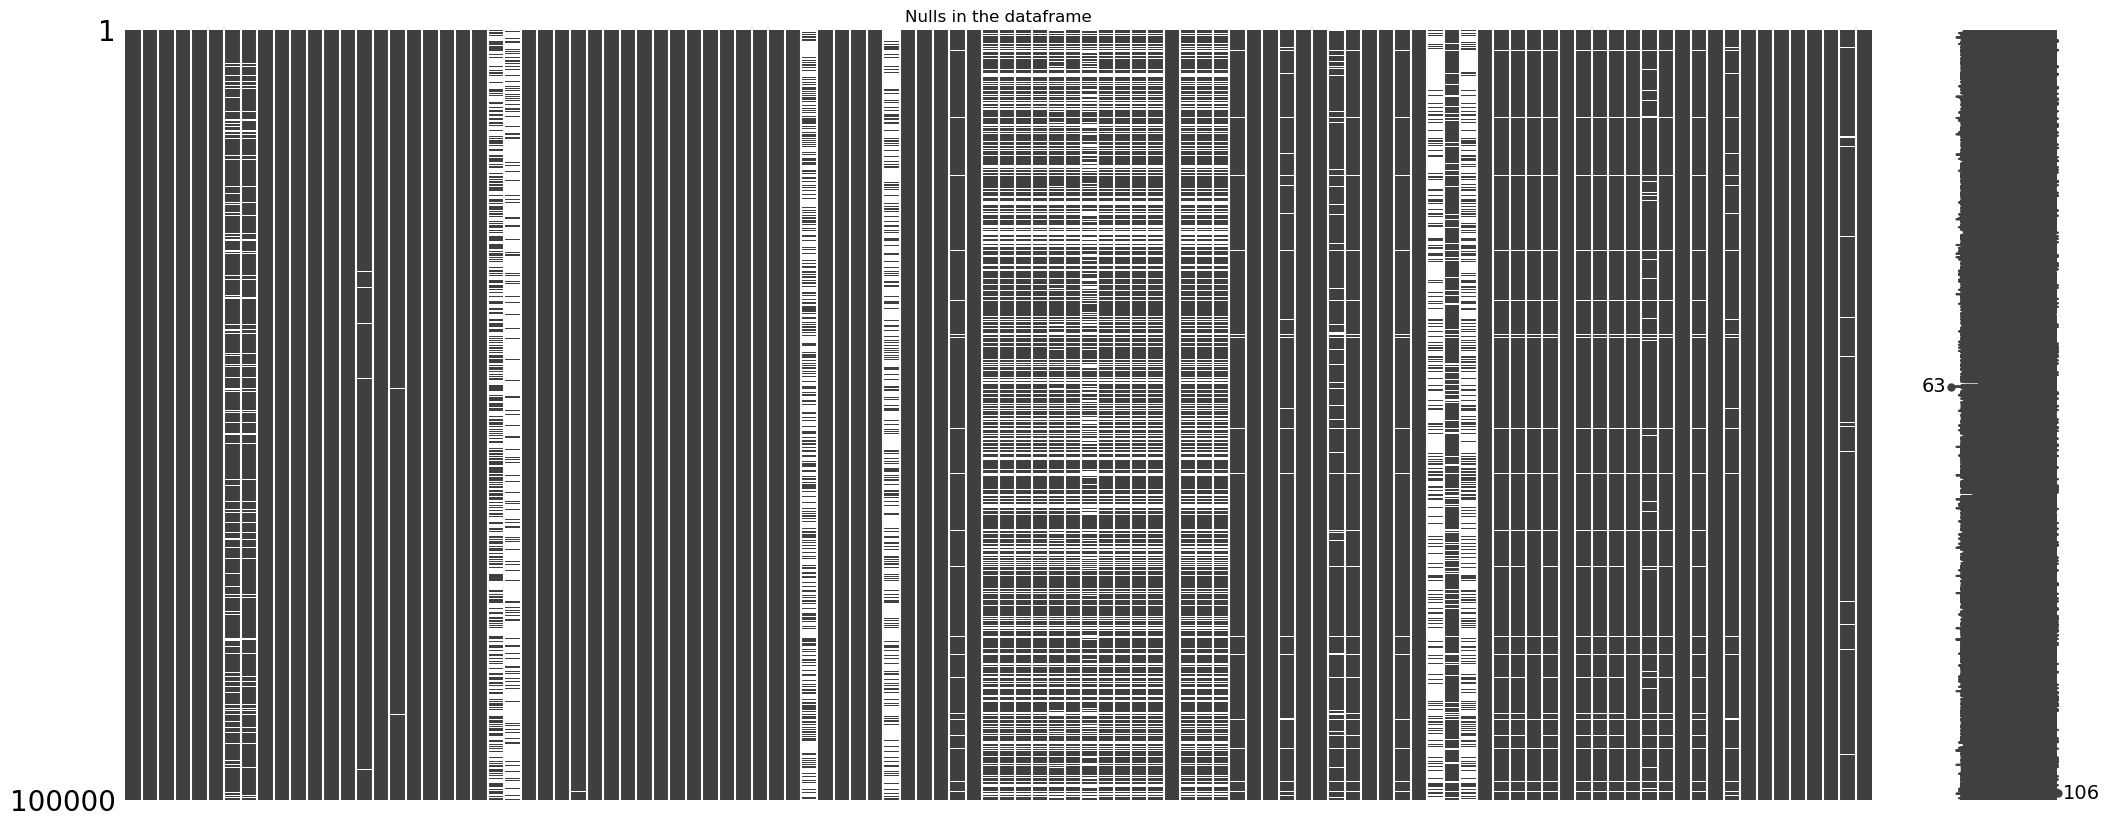

In [51]:
# Missing data matrix pattern analysis
import missingno as msno
msno.matrix(df)
plt.title('Nulls in the dataframe')

In [52]:
# White spaces indicate missing values (NaN)
# Black lines indicate present values

In [53]:
'''As we can see column 8 and 9 (emp_title & emp_length) do have similar location of missing values.
 This means that it has structured missingness meaning its MAR because it depends on another observed variable 
(e.g., people who don’t report their job title may also not report their job length)'''

'As we can see column 8 and 9 (emp_title & emp_length) do have similar location of missing values.\n This means that it has structured missingness meaning its MAR because it depends on another observed variable \n(e.g., people who don’t report their job title may also not report their job length)'

In [54]:
# Since emp_title is discrete data points we can use mode to impute
df['emp_title'].fillna(df['emp_title'].mode()[0], inplace=True)

# Similarly the employment length also is a discrete data points so we can impute with mode:
df['emp_length'].fillna(df['emp_length'].mode()[0], inplace=True)

/var/folders/1q/jjlnxt5j4dg2mnmw35tf858m0000gn/T/ipykernel_1631/4262630315.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['emp_title'].fillna(df['emp_title'].mode()[0], inplace=True)
/var/folders/1q/jjlnxt5j4dg2mnmw35tf858m0000gn/T/ipykernel_1631/4262630315.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are settin

In [55]:
# Since this is a non numeric column, we can simply use mode to impute the nulls:
df['title'].fillna(df['title'].mode()[0], inplace=True)

/var/folders/1q/jjlnxt5j4dg2mnmw35tf858m0000gn/T/ipykernel_1631/628546509.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['title'].fillna(df['title'].mode()[0], inplace=True)


In [56]:
# This is a binary data column, meaning that nulls can be imputed with mode:
df['hardship_flag'].value_counts()

hardship_flag
N    94507
Y     4166
Name: count, dtype: int64

In [57]:
df['hardship_flag'].fillna(df['hardship_flag'].mode()[0], inplace=True)

/var/folders/1q/jjlnxt5j4dg2mnmw35tf858m0000gn/T/ipykernel_1631/1275227287.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['hardship_flag'].fillna(df['hardship_flag'].mode()[0], inplace=True)


In [58]:
'''As we can see from the above figure , since column 55-66 have similar structured missingness meaning most likely its MAR meaning
   missing values may depend on observed data. This aligns with the MAR (Missing At Random) assumption, 
   where missingness is systematic but not related to the missing data itself.
'''
# We will use IterativeImputer with BayesianRidge to impute this:
# Firstly lets filter out those columns:
df_na_col1 = df.columns[55:66]

In [59]:
# df containing columns from 55-66:
# We can see that NaN values follow a similar pattern and NaN for one column further indicates NaN for other columns:
df[df_na_col1].head(40)

,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl
0,1.0,16.0,9960.0,56.000000,0.0,0.0,613.0,59.000000,6200.0,1.0,0.0
1,3.0,14.0,39118.0,72.000000,1.0,1.0,2137.0,67.000000,35200.0,0.0,7.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11400.0,NaN,NaN
3,1.0,17.0,11947.0,60.000000,2.0,3.0,2223.0,25.000000,54500.0,2.0,0.0
4,1.0,7.0,22953.0,60.000000,3.0,4.0,3907.0,43.000000,43900.0,1.0,0.0
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9200.0,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16050.0,NaN,NaN
7,4.0,5.0,68118.0,94.000000,0.0,0.0,2165.0,93.000000,6200.0,2.0,1.0
8,2.0,16.0,5350.0,67.000000,2.0,4.0,2813.0,26.000000,23700.0,3.0,0.0
9,1.0,5.0,235020.0,94.000000,3.0,4.0,4922.0,72.000000,79700.0,0.0,0.0


In [60]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

# IterativeImputer is an MICE (Multiple Imputation by Chained Equations)-based method.
# It iteratively predicts missing values by modeling each feature as a function of other features.
# BayesianRidge is chosen because it handles multicollinearity well and provides stable predictions.
# Create imputation models
num_imputer = IterativeImputer(random_state=42, estimator=BayesianRidge())

In [61]:
# Ensuring we are only filtering out numeric values of those columns:
num_cols1 = df[df_na_col1].select_dtypes(include=np.number).columns

In [62]:
# We will replace the original data with null with the newly imputed columns:
df[num_cols1] = num_imputer.fit_transform(df[num_cols1])

In [63]:
# Lets check for results:
# As we can see all the columns have been filled:
df[df_na_col1].head(40)

,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl
0,1.000000,16.000000,9960.000000,56.000000,0.000000,0.000000,613.000000,59.000000,6200.0,1.000000,0.000000
1,3.000000,14.000000,39118.000000,72.000000,1.000000,1.000000,2137.000000,67.000000,35200.0,0.000000,7.000000
2,1.457888,22.135786,31220.739388,67.301750,1.074360,2.206744,3469.571987,61.168962,11400.0,1.091620,1.310693
3,1.000000,17.000000,11947.000000,60.000000,2.000000,3.000000,2223.000000,25.000000,54500.0,2.000000,0.000000
4,1.000000,7.000000,22953.000000,60.000000,3.000000,4.000000,3907.000000,43.000000,43900.0,1.000000,0.000000
5,1.451947,22.242952,30719.179090,67.434141,1.058845,2.182318,3244.538899,61.620217,9200.0,1.093061,1.292516
6,1.470445,21.909277,32280.855472,67.021921,1.107154,2.258372,3945.210106,60.215175,16050.0,1.088576,1.349112
7,4.000000,5.000000,68118.000000,94.000000,0.000000,0.000000,2165.000000,93.000000,6200.0,2.000000,1.000000
8,2.000000,16.000000,5350.000000,67.000000,2.000000,4.000000,2813.000000,26.000000,23700.0,3.000000,0.000000
9,1.000000,5.000000,235020.000000,94.000000,3.000000,4.000000,4922.000000,72.000000,79700.0,0.000000,0.000000


In [64]:
# Lets check if any nulls are left:
df[df_na_col1].isnull().sum()

open_il_24m           0
mths_since_rcnt_il    0
total_bal_il          0
il_util               0
open_rv_12m           0
open_rv_24m           0
max_bal_bc            0
all_util              0
total_rev_hi_lim      0
inq_fi                0
total_cu_tl           0
dtype: int64

In [65]:
# Lets analyse more nulls:
df.isnull().sum().to_dict()

{'loan_amnt': 0,
 'term': 0,
 'int_rate': 0,
 'installment': 0,
 'grade': 0,
 'sub_grade': 0,
 'emp_title': 0,
 'emp_length': 0,
 'home_ownership': 0,
 'annual_inc': 0,
 'verification_status': 0,
 'issue_d': 0,
 'loan_status': 0,
 'purpose': 0,
 'title': 0,
 'zip_code': 0,
 'dti': 102,
 'delinq_2yrs': 0,
 'earliest_cr_line': 0,
 'fico_range_low': 0,
 'fico_range_high': 0,
 'inq_last_6mths': 0,
 'mths_since_last_delinq': 52814,
 'mths_since_last_record': 85370,
 'open_acc': 0,
 'pub_rec': 0,
 'revol_bal': 0,
 'revol_util': 81,
 'total_acc': 0,
 'initial_list_status': 0,
 'out_prncp': 0,
 'out_prncp_inv': 0,
 'total_pymnt': 0,
 'total_pymnt_inv': 0,
 'total_rec_prncp': 0,
 'total_rec_int': 0,
 'total_rec_late_fee': 0,
 'recoveries': 0,
 'collection_recovery_fee': 0,
 'last_pymnt_d': 191,
 'last_pymnt_amnt': 0,
 'next_pymnt_d': 63573,
 'last_credit_pull_d': 2,
 'last_fico_range_high': 0,
 'last_fico_range_low': 0,
 'collections_12_mths_ex_med': 6,
 'mths_since_last_major_derog': 75398,
 '

Text(0.5, 1.0, 'Nulls in the dataframe')

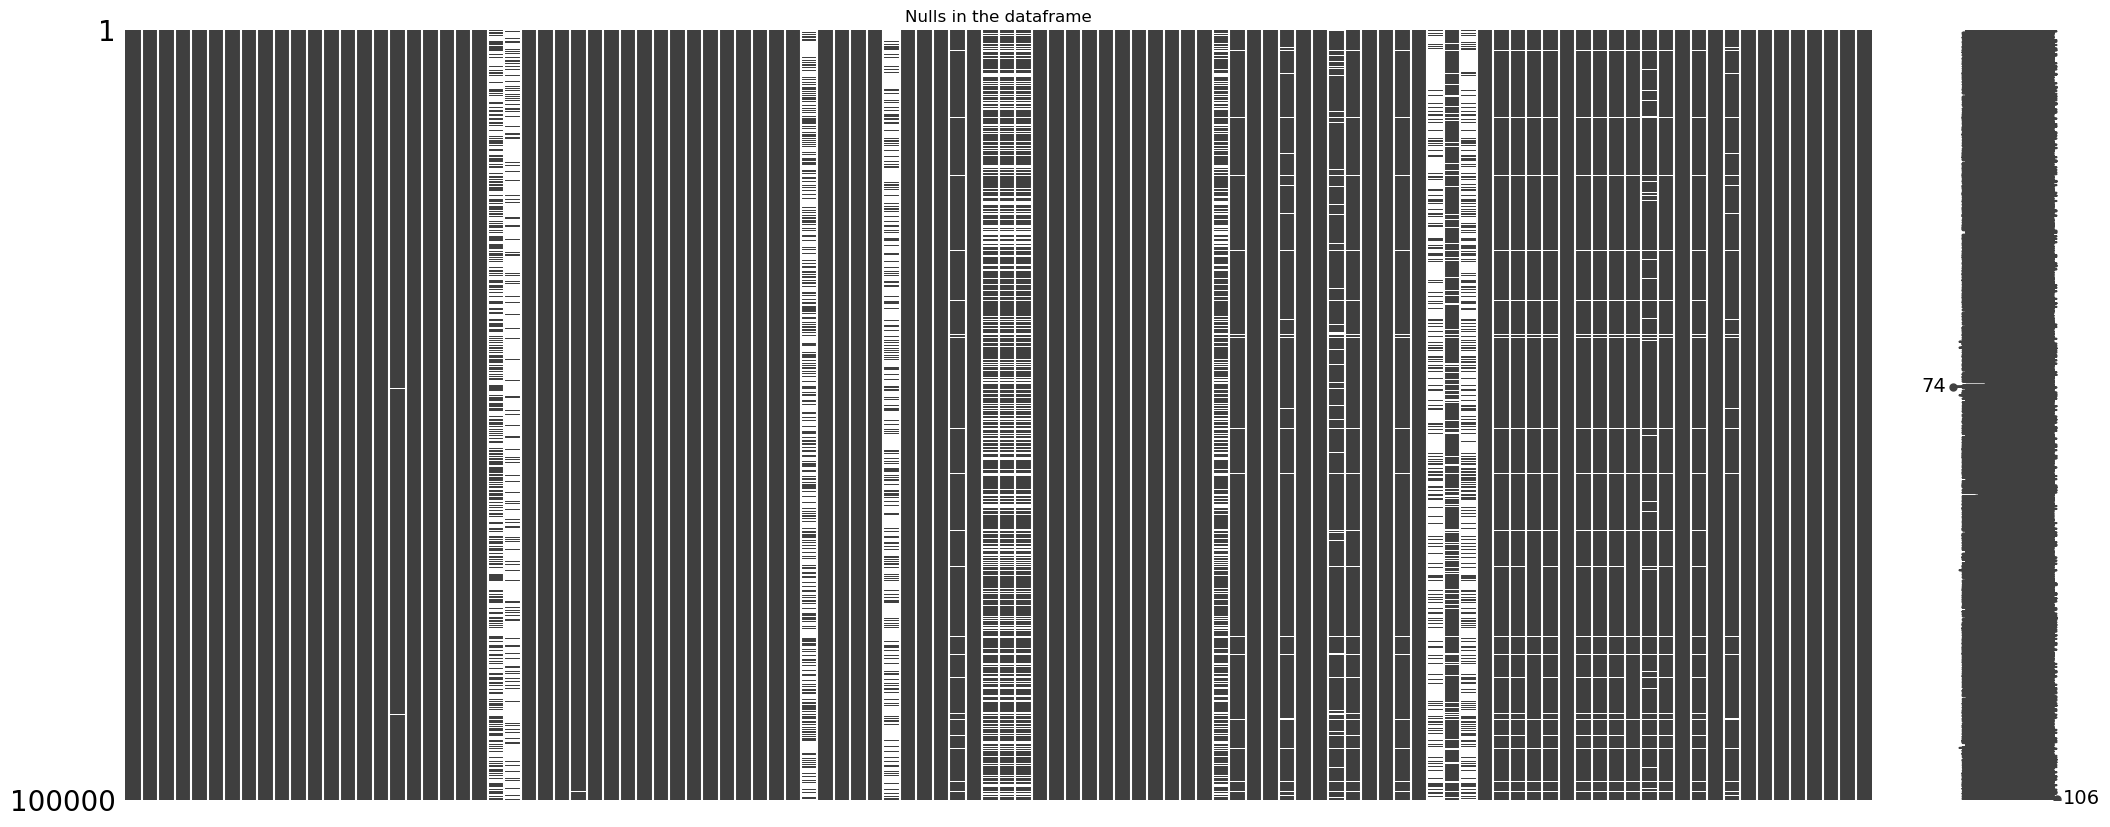

In [66]:
# Lets see the visual representation of these nulls:
msno.matrix(df)
plt.title('Nulls in the dataframe')

In [67]:
df.columns.nunique()

106

In [68]:
# Lets analyse these columns that are null in the df:
df[['mths_since_last_delinq','mths_since_last_record']]

,mths_since_last_delinq,mths_since_last_record
0,19.0,110.0
1,NaN,NaN
2,NaN,61.0
3,NaN,NaN
4,NaN,NaN
...,...,...
99995,23.0,NaN
99996,NaN,NaN
99997,14.0,NaN
99998,36.0,NaN


In [69]:
# This time, instead of assuming through visually look at data,
# lets check to see if missingness is related to other observed variables (MAR) or the unobserved value itself (MNAR):
from scipy.stats import ttest_ind

'''
We use 'annual_inc' (annual income) here because it's a continuous, numerical variable that likely influences loan outcomes.
Borrowers with lower income may be more prone to late payments or defaults, while even higher-income borrowers can exhibit 
risky behavior (e.g., over-leveraging).

By comparing income distributions between rows with and without missing values, we can test if 
missingness depends on observed data — a key trait of MAR (Missing At Random).
'''
# Extract annual income for rows where 'mths_since_last_delinq' is missing
delinq_missing = df[df['mths_since_last_delinq'].isna()]['annual_inc']

# Extract annual income for rows where 'mths_since_last_delinq' is present
delinq_not_missing = df[df['mths_since_last_delinq'].notna()]['annual_inc']

# Perform a t-test to check if the income distributions differ significantly
# This helps determine if missingness in 'mths_since_last_delinq' is related to income (i.e., observed data -> MAR)
t_stat, p_value = ttest_ind(delinq_missing, delinq_not_missing)

print(f"Missingness vs. annual_inc p-value: {p_value:.4f}")

Missingness vs. annual_inc p-value: 0.0000


In [70]:
# The p-value of 0.0000 from t-test indicates strong evidence that missingness in MAR
# Extremely strong statistical significance – The missingness is not random and is highly associated with income.
# Missing At Random (MAR) – The likelihood of missing data depends on the observed income values.

In [71]:
df[['mths_since_last_delinq','annual_inc']]

,mths_since_last_delinq,annual_inc
0,19.0,48000.0
1,NaN,57000.0
2,NaN,55000.0
3,NaN,43500.0
4,NaN,48000.0
...,...,...
99995,23.0,60000.0
99996,NaN,150000.0
99997,14.0,48000.0
99998,36.0,90000.0


Text(0.5, 1.0, 'Relationship between mths_since_last_delinq and annual_inc')

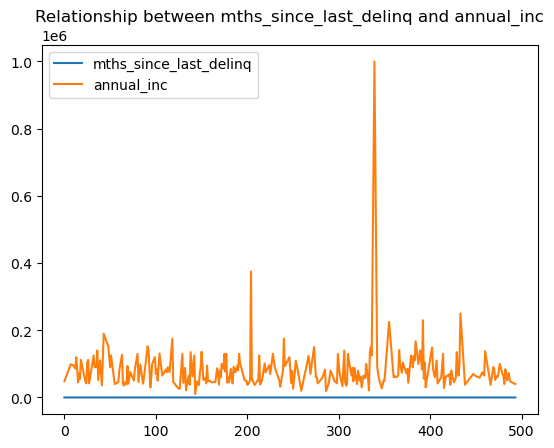

In [72]:
# As we can see from the below, the mths_since_last_delinq and annual_inc is non-linear and hence we will use RandomForestRegressor
df[['mths_since_last_delinq','annual_inc']][0:500].dropna(inplace=False).plot()
plt.title('Relationship between mths_since_last_delinq and annual_inc')

In [73]:
# Similarly lets do this with mths_since_last_record
record_missing = df[df['mths_since_last_record'].isna()]['annual_inc']
record_not_missing = df[df['mths_since_last_record'].notna()]['annual_inc']
t_stat, p_value = ttest_ind(delinq_missing, delinq_not_missing)

print(f"Missingness vs. annual_inc p-value: {p_value:.4f}")


Missingness vs. annual_inc p-value: 0.0000


In [74]:
# Similarly lets check for mths_since_last_record
# The p-value of 0.0000 from the t-test indicates strong evidence that missingness in 
# mths_since_last_record is related to annual_inc (MAR)

Text(0.5, 1.0, 'Relationship between mths_since_last_record and annual_inc')

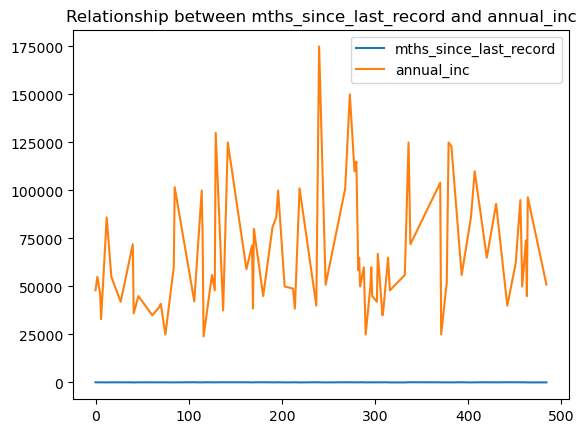

In [75]:
# Again as we can see its non-linear so lets use RandomForestRegressor
df[['mths_since_last_record','annual_inc']][0:500].dropna(inplace=False).plot()
plt.title('Relationship between mths_since_last_record and annual_inc')

In [76]:
# Since 'mths_since_last_delinq' and 'mths_since_last_record' are correlated —
# it can inform and improve the prediction of the other during imputation.
df[['mths_since_last_delinq', 'mths_since_last_record']]

,mths_since_last_delinq,mths_since_last_record
0,19.0,110.0
1,NaN,NaN
2,NaN,61.0
3,NaN,NaN
4,NaN,NaN
...,...,...
99995,23.0,NaN
99996,NaN,NaN
99997,14.0,NaN
99998,36.0,NaN


In [77]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

# Initialize MICE with a time-sensitive estimator
# Initialize the IterativeImputer using a RandomForestRegressor as the estimator
imputer = IterativeImputer(
    estimator=RandomForestRegressor(),  # Handles non-linear relationships as seen above 2 figures.
    max_iter=20,
    random_state=42
)
# Fit the imputer and transform the data using selected columns.
# Impute using auxiliary features (annual_inc)
# Adding 'annual_inc' as an auxiliary variable improves accuracy, especially since income may influence delinquency/record history.

df_imputed = pd.DataFrame(
    imputer.fit_transform(df[['mths_since_last_delinq', 'mths_since_last_record', 'annual_inc']]),
    columns=['mths_since_last_delinq', 'mths_since_last_record', 'annual_inc']
)

df_imputed

,mths_since_last_delinq,mths_since_last_record,annual_inc
0,19.000000,110.000000,48000.0
1,34.676294,82.875000,57000.0
2,40.783714,61.000000,55000.0
3,29.360256,67.810000,43500.0
4,34.353760,62.606333,48000.0
...,...,...,...
99995,23.000000,79.210000,60000.0
99996,31.590584,92.270000,150000.0
99997,14.000000,98.244667,48000.0
99998,36.000000,98.370000,90000.0


In [78]:
# replace the original columns with the imputed column:
df[['mths_since_last_delinq','mths_since_last_record','annual_inc']] = df_imputed

In [79]:
# Lets do testing on more nulls:
df.isnull().sum().to_dict()

{'loan_amnt': 0,
 'term': 0,
 'int_rate': 0,
 'installment': 0,
 'grade': 0,
 'sub_grade': 0,
 'emp_title': 0,
 'emp_length': 0,
 'home_ownership': 0,
 'annual_inc': 0,
 'verification_status': 0,
 'issue_d': 0,
 'loan_status': 0,
 'purpose': 0,
 'title': 0,
 'zip_code': 0,
 'dti': 102,
 'delinq_2yrs': 0,
 'earliest_cr_line': 0,
 'fico_range_low': 0,
 'fico_range_high': 0,
 'inq_last_6mths': 0,
 'mths_since_last_delinq': 0,
 'mths_since_last_record': 0,
 'open_acc': 0,
 'pub_rec': 0,
 'revol_bal': 0,
 'revol_util': 81,
 'total_acc': 0,
 'initial_list_status': 0,
 'out_prncp': 0,
 'out_prncp_inv': 0,
 'total_pymnt': 0,
 'total_pymnt_inv': 0,
 'total_rec_prncp': 0,
 'total_rec_int': 0,
 'total_rec_late_fee': 0,
 'recoveries': 0,
 'collection_recovery_fee': 0,
 'last_pymnt_d': 191,
 'last_pymnt_amnt': 0,
 'next_pymnt_d': 63573,
 'last_credit_pull_d': 2,
 'last_fico_range_high': 0,
 'last_fico_range_low': 0,
 'collections_12_mths_ex_med': 6,
 'mths_since_last_major_derog': 75398,
 'policy_c

In [80]:
# This column represent the months since last major derogatory mark 
df['mths_since_last_major_derog'].value_counts()

mths_since_last_major_derog
46.0     412
47.0     400
45.0     389
37.0     389
65.0     378
        ... 
107.0      4
94.0       4
108.0      4
105.0      2
106.0      2
Name: count, Length: 111, dtype: int64

In [81]:
# It ok to assume that the NaN value in this column means borrower never had a major derogatory mark on their credit. 
# and therefore we can fill this column with 0 meaning that the derogatory mark never happened. 
df['mths_since_last_major_derog'] = df['mths_since_last_major_derog'].fillna(0)

In [82]:
# lets analyse more nulls:
df.isnull().sum().to_dict()

{'loan_amnt': 0,
 'term': 0,
 'int_rate': 0,
 'installment': 0,
 'grade': 0,
 'sub_grade': 0,
 'emp_title': 0,
 'emp_length': 0,
 'home_ownership': 0,
 'annual_inc': 0,
 'verification_status': 0,
 'issue_d': 0,
 'loan_status': 0,
 'purpose': 0,
 'title': 0,
 'zip_code': 0,
 'dti': 102,
 'delinq_2yrs': 0,
 'earliest_cr_line': 0,
 'fico_range_low': 0,
 'fico_range_high': 0,
 'inq_last_6mths': 0,
 'mths_since_last_delinq': 0,
 'mths_since_last_record': 0,
 'open_acc': 0,
 'pub_rec': 0,
 'revol_bal': 0,
 'revol_util': 81,
 'total_acc': 0,
 'initial_list_status': 0,
 'out_prncp': 0,
 'out_prncp_inv': 0,
 'total_pymnt': 0,
 'total_pymnt_inv': 0,
 'total_rec_prncp': 0,
 'total_rec_int': 0,
 'total_rec_late_fee': 0,
 'recoveries': 0,
 'collection_recovery_fee': 0,
 'last_pymnt_d': 191,
 'last_pymnt_amnt': 0,
 'next_pymnt_d': 63573,
 'last_credit_pull_d': 2,
 'last_fico_range_high': 0,
 'last_fico_range_low': 0,
 'collections_12_mths_ex_med': 6,
 'mths_since_last_major_derog': 0,
 'policy_code'

In [83]:
# Lets try to impute time series column:
df['next_pymnt_d'] 

0        Jun-2020
1        Jun-2020
2             NaN
3        Jun-2020
4             NaN
           ...   
99995         NaN
99996         NaN
99997         NaN
99998    Jun-2020
99999         NaN
Name: next_pymnt_d, Length: 100000, dtype: object

In [84]:
'''
Since our data has a temporal structure (e.g., monthly payments)

We want to track state over time (e.g., payment delays/advancements)

We would need probabilistic estimates (confidence intervals for imputations)
'''

'\nSince our data has a temporal structure (e.g., monthly payments)\n\nWe want to track state over time (e.g., payment delays/advancements)\n\nWe would need probabilistic estimates (confidence intervals for imputations)\n'

In [85]:
# Lets convert this to datime format, we will use the first of each month for this approach
df['next_pymnt_d'] = pd.to_datetime(df['next_pymnt_d'], format='%b-%Y')
df['next_pymnt_d']

0       2020-06-01
1       2020-06-01
2              NaT
3       2020-06-01
4              NaT
           ...    
99995          NaT
99996          NaT
99997          NaT
99998   2020-06-01
99999          NaT
Name: next_pymnt_d, Length: 100000, dtype: datetime64[ns]

In [86]:
# Lets put this in a dataframe:
df_date_numeric = pd.DataFrame(df['next_pymnt_d'])
df_date_numeric

,next_pymnt_d
0,2020-06-01
1,2020-06-01
2,NaT
3,2020-06-01
4,NaT
...,...
99995,NaT
99996,NaT
99997,NaT
99998,2020-06-01


In [87]:
# We will use Kalman Filter as it uses observations (known datetime values) to predict missing ones so lets import it:
from pykalman import KalmanFilter

# Convert dates to numeric values (days since epoch)
df['date_numeric'] = (pd.to_datetime(df['next_pymnt_d'], format='%b-%Y') - pd.Timestamp('1970-01-01')).dt.days

# Create masks for observed and missing values
observed_mask = df['date_numeric'].notna()
missing_mask = df['date_numeric'].isna()

# Extract observed values
observed_values = df.loc[observed_mask, 'date_numeric']

# Initialize and configure Kalman Filter
kf = KalmanFilter(
    initial_state_mean=observed_values.mean(),
    initial_state_covariance=1,
    observation_covariance=1,  # Measurement noise
    transition_covariance=0.1,  # Process noise
    transition_matrices=[1]     # Identity matrix for 1D state
)

# Run Kalman smoothing on observed values
smoothed_state_means, _ = kf.smooth(observed_values.values)

# Fill missing values - ensure we don't exceed available smoothed values
num_missing = missing_mask.sum()
available_smoothed = smoothed_state_means.flatten()

# Handle case where there are more missing values than smoothed estimates
if num_missing > len(available_smoothed):
    # If more missing values than smoothed estimates, cycle through available estimates
    repeats = num_missing // len(available_smoothed) + 1
    available_smoothed = np.tile(available_smoothed, repeats)

df.loc[missing_mask, 'date_numeric'] = available_smoothed[:num_missing]

# Convert back to datetime format
df['next_pymnt_d_imputed'] = pd.to_datetime(df['date_numeric'], unit='D')

# Format as 'Month-Year' string:
df['next_pymnt_d_imputed'] = df['next_pymnt_d_imputed'].dt.strftime('%b-%Y')

In [88]:
# Once this has been added lets drop date_numeric as this was created during the above process 
# and next_pymnt_d which was the original column. 
df.drop(['date_numeric','next_pymnt_d'], axis=1, inplace=True)

In [89]:
# For the following columns, lets impute them with mode as there is only negligible amount of nulls so we can
# impute with 0:
df[['last_pymnt_d','last_credit_pull_d']].isna().sum()

last_pymnt_d          191
last_credit_pull_d      2
dtype: int64

In [90]:
df['last_pymnt_d'].fillna(df['last_pymnt_d'].mode()[0], inplace=True)

/var/folders/1q/jjlnxt5j4dg2mnmw35tf858m0000gn/T/ipykernel_1631/3343529490.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['last_pymnt_d'].fillna(df['last_pymnt_d'].mode()[0], inplace=True)


In [91]:
df['last_credit_pull_d'].fillna(df['last_credit_pull_d'].mode()[0], inplace=True)

/var/folders/1q/jjlnxt5j4dg2mnmw35tf858m0000gn/T/ipykernel_1631/2899042181.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['last_credit_pull_d'].fillna(df['last_credit_pull_d'].mode()[0], inplace=True)


In [92]:
# Lets analyse more nulls:
df.isnull().sum().to_dict()

{'loan_amnt': 0,
 'term': 0,
 'int_rate': 0,
 'installment': 0,
 'grade': 0,
 'sub_grade': 0,
 'emp_title': 0,
 'emp_length': 0,
 'home_ownership': 0,
 'annual_inc': 0,
 'verification_status': 0,
 'issue_d': 0,
 'loan_status': 0,
 'purpose': 0,
 'title': 0,
 'zip_code': 0,
 'dti': 102,
 'delinq_2yrs': 0,
 'earliest_cr_line': 0,
 'fico_range_low': 0,
 'fico_range_high': 0,
 'inq_last_6mths': 0,
 'mths_since_last_delinq': 0,
 'mths_since_last_record': 0,
 'open_acc': 0,
 'pub_rec': 0,
 'revol_bal': 0,
 'revol_util': 81,
 'total_acc': 0,
 'initial_list_status': 0,
 'out_prncp': 0,
 'out_prncp_inv': 0,
 'total_pymnt': 0,
 'total_pymnt_inv': 0,
 'total_rec_prncp': 0,
 'total_rec_int': 0,
 'total_rec_late_fee': 0,
 'recoveries': 0,
 'collection_recovery_fee': 0,
 'last_pymnt_d': 0,
 'last_pymnt_amnt': 0,
 'last_credit_pull_d': 0,
 'last_fico_range_high': 0,
 'last_fico_range_low': 0,
 'collections_12_mths_ex_med': 6,
 'mths_since_last_major_derog': 0,
 'policy_code': 0,
 'application_type': 

In [93]:
# Since all three columns (inq_fi, total_cu_tl, inq_last_12m) have the same number of missing values (29,644) and in
# similar places, suggests that the missingness is structured (likely MAR or MNAR)
# Since these varilables are not highly correlated 

In [94]:
df[['inq_fi','total_cu_tl','inq_last_12m']]

,inq_fi,total_cu_tl,inq_last_12m
0,1.00000,0.000000,0.0
1,0.00000,7.000000,0.0
2,1.09162,1.310693,NaN
3,2.00000,0.000000,2.0
4,1.00000,0.000000,2.0
...,...,...,...
99995,1.00000,0.000000,2.0
99996,1.00000,1.000000,12.0
99997,0.00000,3.000000,2.0
99998,0.00000,6.000000,0.0


In [95]:
# We should explore alternative imputation strategies that do not rely on strong inter-variable relationships.

In [96]:
df[['inq_fi','total_cu_tl','inq_last_12m']].corr()

,inq_fi,total_cu_tl,inq_last_12m
inq_fi,1.000000,0.079792,0.549184
total_cu_tl,0.079792,1.000000,0.090296
inq_last_12m,0.549184,0.090296,1.000000


In [97]:
# inq_fi and inq_last_12m are correlated (0.55)
# We should be imputed jointly to preserve this relationship


In [98]:
# open_acc (number of open credit lines) shows the strongest correlation with the targets, 
# so we use it as the primary predictor for imputation.

In [99]:
df[['inq_fi','total_cu_tl','inq_last_12m','open_acc']].corr()

,inq_fi,total_cu_tl,inq_last_12m,open_acc
inq_fi,1.000000,0.079792,0.549184,0.111445
total_cu_tl,0.079792,1.000000,0.090296,0.108430
inq_last_12m,0.549184,0.090296,1.000000,0.177705
open_acc,0.111445,0.108430,0.177705,1.000000


In [100]:
predictors = ['open_acc'] # Uses the open_acc column (number of open credit lines) as the primary predictor 

targets = ['inq_fi', 'inq_last_12m'] # columns to impute

# Configure imputer to preserve correlation
imputer = IterativeImputer(
    estimator=BayesianRidge(),  # Handles multicollinearity and Avoids overfittings
    max_iter=20,
    random_state=42
)

# Impute and replace the columns in the original dataframe:
df[targets] = imputer.fit_transform(df[predictors + targets])[:, -2:]

In [101]:
# However with:
df['total_cu_tl'].skew()

4.077848247954848

In [102]:
# We can see, total_cu_tl is moderately skewed and therefore can be imputed with a simple median:
df['total_cu_tl'] = df['total_cu_tl'].fillna(df['total_cu_tl'].median())

In [103]:
# Lets look for more nulls:
df.isnull().sum().to_dict()

{'loan_amnt': 0,
 'term': 0,
 'int_rate': 0,
 'installment': 0,
 'grade': 0,
 'sub_grade': 0,
 'emp_title': 0,
 'emp_length': 0,
 'home_ownership': 0,
 'annual_inc': 0,
 'verification_status': 0,
 'issue_d': 0,
 'loan_status': 0,
 'purpose': 0,
 'title': 0,
 'zip_code': 0,
 'dti': 102,
 'delinq_2yrs': 0,
 'earliest_cr_line': 0,
 'fico_range_low': 0,
 'fico_range_high': 0,
 'inq_last_6mths': 0,
 'mths_since_last_delinq': 0,
 'mths_since_last_record': 0,
 'open_acc': 0,
 'pub_rec': 0,
 'revol_bal': 0,
 'revol_util': 81,
 'total_acc': 0,
 'initial_list_status': 0,
 'out_prncp': 0,
 'out_prncp_inv': 0,
 'total_pymnt': 0,
 'total_pymnt_inv': 0,
 'total_rec_prncp': 0,
 'total_rec_int': 0,
 'total_rec_late_fee': 0,
 'recoveries': 0,
 'collection_recovery_fee': 0,
 'last_pymnt_d': 0,
 'last_pymnt_amnt': 0,
 'last_credit_pull_d': 0,
 'last_fico_range_high': 0,
 'last_fico_range_low': 0,
 'collections_12_mths_ex_med': 6,
 'mths_since_last_major_derog': 0,
 'policy_code': 0,
 'application_type': 

In [104]:
# Lets look at the correlation between these two:
df[['mths_since_recent_bc_dlq','mths_since_recent_revol_delinq']].corr()

,mths_since_recent_bc_dlq,mths_since_recent_revol_delinq
mths_since_recent_bc_dlq,1.000000,0.895545
mths_since_recent_revol_delinq,0.895545,1.000000


<Axes: >

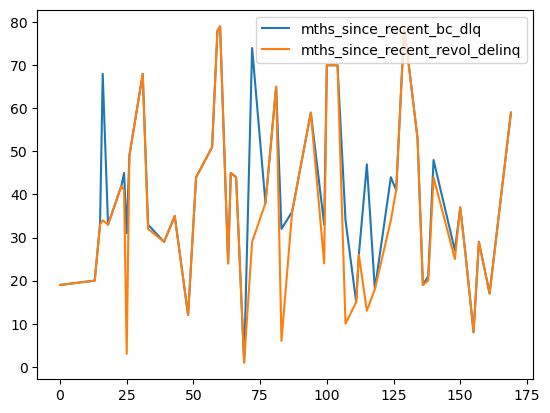

In [105]:
df[['mths_since_recent_bc_dlq','mths_since_recent_revol_delinq']].dropna(inplace=False)[0:50].plot()

In [106]:
# From the table and the graph we can see that both 'mths_since_recent_bc_dlq','mths_since_recent_revol_delinq' are
# correlated. So for this we can impute both using multivariate_normal as it samples from the distribution, producing realistic variability.
# Unlike mean/median imputation, it doesn’t create identical values for all missing cases.
# it also maintains the Means and variances of each variable and Correlation between variables.

In [107]:
# Lets implement this:

In [108]:
from scipy.stats import multivariate_normal

# Calculate mean and covariance from observed data
# Prepare observed data (complete cases only)
observed = df[['mths_since_recent_bc_dlq', 'mths_since_recent_revol_delinq']].dropna()
mean = observed.mean().values
cov = observed.cov().values

# Create multivariate normal distribution
dist = multivariate_normal(mean=mean, cov=cov)

In [109]:
from sklearn.linear_model import LinearRegression

X = observed['mths_since_recent_bc_dlq'].values.reshape(-1, 1)  # Predictor
y = observed['mths_since_recent_revol_delinq'].values           # Target

# Train two reciprocal models
# This establishes a bidirectional relationship between the two variables
model_bc_to_revol = LinearRegression().fit(X, y)
model_revol_to_bc = LinearRegression().fit(y.reshape(-1, 1), X.ravel())

# For rows where both values are missing:
# Fills with the mean of observed values (a simple fallback)
# For rows with one missing value:
# Uses the trained models to predict the missing value based on the existing one

def impute_pair(row):
    if pd.isna(row['mths_since_recent_bc_dlq']) and pd.isna(row['mths_since_recent_revol_delinq']):
        row['mths_since_recent_bc_dlq'] = observed['mths_since_recent_bc_dlq'].mean()
        row['mths_since_recent_revol_delinq'] = observed['mths_since_recent_revol_delinq'].mean()
    return row

df = df.apply(impute_pair, axis=1)


In [110]:
# Ensures no negative values with .clip(lower=0)
df['mths_since_recent_bc_dlq'] = df['mths_since_recent_bc_dlq'].clip(lower=0)
df['mths_since_recent_revol_delinq'] = df['mths_since_recent_revol_delinq'].clip(lower=0)


In [111]:
# we can also add small random noise (+-3 months) to imputed values to avoid creating artificial patterns
df['mths_since_recent_bc_dlq'].fillna(df['mths_since_recent_bc_dlq'].median()) + np.random.randint(-3, 4, size=len(df)) 
df['mths_since_recent_revol_delinq'].fillna(df['mths_since_recent_bc_dlq'].median())+ np.random.randint(-3, 4, size=len(df)) 

0        18.000000
1        34.877554
2        38.877554
3        37.877554
4        33.877554
           ...    
99995    23.000000
99996    33.877554
99997    11.000000
99998    35.000000
99999    36.877554
Name: mths_since_recent_revol_delinq, Length: 100000, dtype: float64

In [112]:
# Lets analyse more nulls:
df.isnull().sum().to_dict()

{'loan_amnt': 0,
 'term': 0,
 'int_rate': 0,
 'installment': 0,
 'grade': 0,
 'sub_grade': 0,
 'emp_title': 0,
 'emp_length': 0,
 'home_ownership': 0,
 'annual_inc': 0,
 'verification_status': 0,
 'issue_d': 0,
 'loan_status': 0,
 'purpose': 0,
 'title': 0,
 'zip_code': 0,
 'dti': 102,
 'delinq_2yrs': 0,
 'earliest_cr_line': 0,
 'fico_range_low': 0,
 'fico_range_high': 0,
 'inq_last_6mths': 0,
 'mths_since_last_delinq': 0,
 'mths_since_last_record': 0,
 'open_acc': 0,
 'pub_rec': 0,
 'revol_bal': 0,
 'revol_util': 81,
 'total_acc': 0,
 'initial_list_status': 0,
 'out_prncp': 0,
 'out_prncp_inv': 0,
 'total_pymnt': 0,
 'total_pymnt_inv': 0,
 'total_rec_prncp': 0,
 'total_rec_int': 0,
 'total_rec_late_fee': 0,
 'recoveries': 0,
 'collection_recovery_fee': 0,
 'last_pymnt_d': 0,
 'last_pymnt_amnt': 0,
 'last_credit_pull_d': 0,
 'last_fico_range_high': 0,
 'last_fico_range_low': 0,
 'collections_12_mths_ex_med': 6,
 'mths_since_last_major_derog': 0,
 'policy_code': 0,
 'application_type': 

<Axes: >

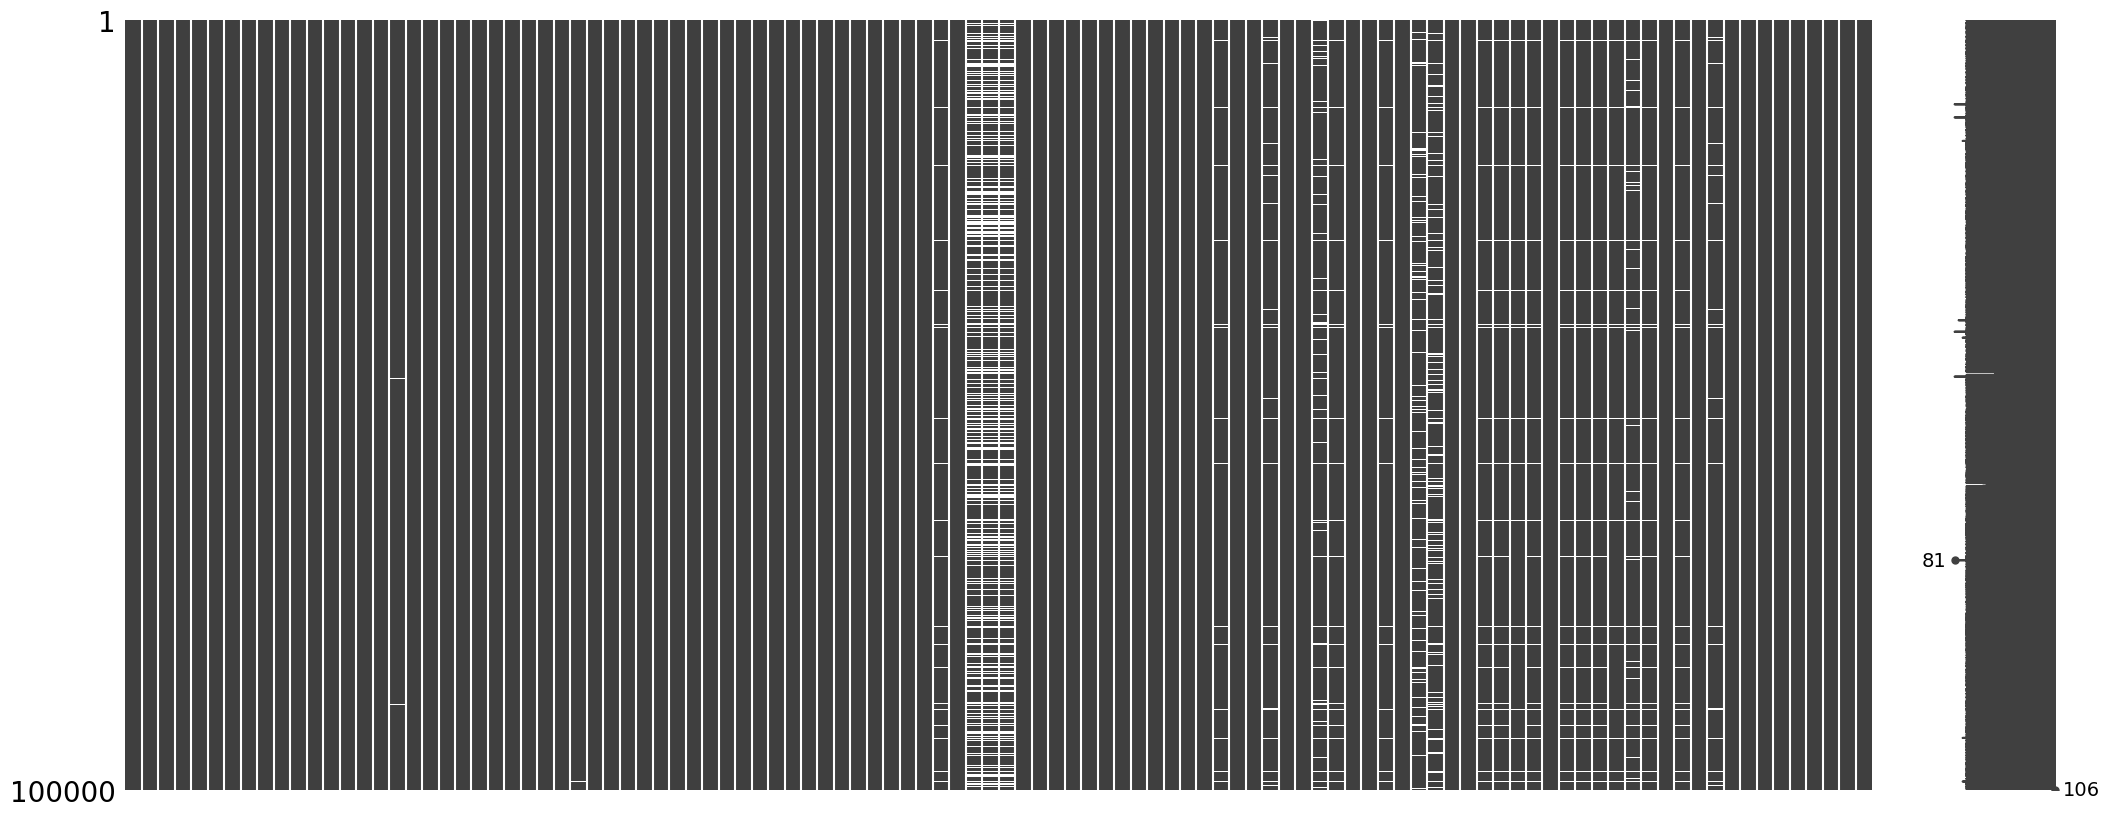

In [113]:
msno.matrix(df)

In [114]:
# We are now left with columns that have less than 30% null, these can be imputed with a simple mean/median:

In [115]:
# The plan/idea here is depending on the skew and the type of data (int or float), we will use
# different imputation strategy so int here is discrete data and float is continous data.

# But first we need to separate the two:

In [116]:
# This empty list is initialed which will contain all the numeric columns that have nulls in them:
null_numeric_list = []

def null_numeric(non_null_numeric_list):
    for key,value in df.select_dtypes(include='number').isnull().sum().to_dict().items():
        if value>0:
            null_numeric_list.append(key)
    return null_numeric_list
null_numeric_list = null_numeric(null_numeric_list)

In [117]:
# create a df just dedicated to this filter of null numeric list:
df_null_numeric = df[null_numeric_list]

In [118]:
df_null_numeric

,dti,revol_util,collections_12_mths_ex_med,tot_coll_amt,open_acc_6m,open_act_il,open_il_12m,acc_open_past_24mths,bc_util,chargeoff_within_12_mths,...,num_bc_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_op_past_12m,percent_bc_gt_75,tax_liens
0,20.25,82.8,1.0,3832.0,0.0,1.0,0.0,1.000000,NaN,0.0,...,1.0,2.0,5.0,2.0,4.0,0.0,0.0,0.0,NaN,0.0
1,25.33,64.5,0.0,0.0,0.0,3.0,0.0,4.000000,40.5,0.0,...,6.0,7.0,9.0,5.0,10.0,0.0,0.0,1.0,60.0,0.0
2,7.22,52.6,0.0,0.0,NaN,NaN,NaN,4.000000,54.8,0.0,...,3.0,5.0,6.0,5.0,7.0,0.0,0.0,1.0,33.3,1.0
3,24.55,12.1,0.0,0.0,2.0,1.0,0.0,4.000000,12.0,0.0,...,16.0,13.0,19.0,7.0,15.0,0.0,0.0,2.0,0.0,0.0
4,24.30,27.1,0.0,0.0,2.0,2.0,1.0,5.000000,39.9,0.0,...,6.0,13.0,16.0,5.0,16.0,0.0,0.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,17.98,73.0,0.0,1021.0,1.0,1.0,0.0,2.000000,74.4,0.0,...,6.0,6.0,7.0,5.0,7.0,0.0,0.0,1.0,40.0,0.0
99996,13.13,18.6,0.0,0.0,0.0,2.0,1.0,4.512166,20.1,0.0,...,19.0,22.0,27.0,8.0,25.0,0.0,0.0,2.0,8.3,0.0
99997,27.79,83.7,0.0,0.0,2.0,2.0,1.0,6.000000,86.1,0.0,...,10.0,7.0,22.0,7.0,9.0,0.0,0.0,5.0,75.0,0.0
99998,27.58,47.6,0.0,0.0,1.0,2.0,0.0,8.000000,33.7,0.0,...,16.0,18.0,36.0,10.0,23.0,0.0,0.0,2.0,11.1,0.0


In [119]:
# The only issue with the above is that pandas considers a float if the integer values to be float just because
# they have a decimal attached to them like this: .0
# For example this col: collections_12_mths_ex_med is full of integers but pandas considers this to be float. 

In [120]:
# This function is used to distinguish between int and a float:
def classify_columns(df_null_numeric):
    int_like_cols = [] # True int
    true_float_cols = []# True float
    
    for col in df_null_numeric.select_dtypes(include=['float']).columns:
        # Check if non-null values are equal to their integer counterparts
        if (df_null_numeric[col].dropna() == df_null_numeric[col].dropna().astype(int)).all():
            int_like_cols.append(col)
        else:
            true_float_cols.append(col)
    
    return int_like_cols, true_float_cols

# Usage:
int_cols, float_cols = classify_columns(df_null_numeric)
print(f"Integer-like columns: {int_cols}") # This should contain all the integer columns.
print(f"True float columns: {float_cols}") # This should contain all the float columns. 

Integer-like columns: ['collections_12_mths_ex_med', 'tot_coll_amt', 'open_act_il', 'chargeoff_within_12_mths', 'mths_since_recent_inq', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'tax_liens']
True float columns: ['dti', 'revol_util', 'open_acc_6m', 'open_il_12m', 'acc_open_past_24mths', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mort_acc', 'mths_since_recent_bc_dlq', 'mths_since_recent_revol_delinq', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_op_past_12m', 'percent_bc_gt_75']


In [121]:
# Now we have two distinct df with only integer and float:
integer_null_df = df_null_numeric[int_cols]
float_null_df = df_null_numeric[float_cols]

In [122]:
# Now lets look at the skew for the newly created df:
float_null_df.skew() # Float column skew:

dti                               30.835501
revol_util                         0.043312
open_acc_6m                        1.114904
open_il_12m                        1.123416
acc_open_past_24mths               0.807236
bc_util                           -0.185626
mo_sin_old_il_acct                -0.030932
mo_sin_old_rev_tl_op               0.744448
mort_acc                           1.146069
mths_since_recent_bc_dlq           0.549147
mths_since_recent_revol_delinq     0.743677
num_actv_bc_tl                     0.770470
num_actv_rev_tl                    0.840774
num_bc_sats                        0.923524
num_bc_tl                          0.845762
num_op_rev_tl                      0.872119
num_rev_accts                      0.843846
num_rev_tl_bal_gt_0                0.842640
num_sats                           0.765124
num_tl_op_past_12m                 0.817879
percent_bc_gt_75                   0.406246
dtype: float64

In [123]:
integer_null_df.skew() # Integer column skew:

collections_12_mths_ex_med    10.400658
tot_coll_amt                  35.503882
open_act_il                    3.013874
chargeoff_within_12_mths      17.353501
mths_since_recent_inq          0.880487
num_tl_120dpd_2m              50.524597
num_tl_30dpd                  25.947792
tax_liens                     44.905961
dtype: float64

In [124]:
# This function is used to impute the integer (discrete) depending on their skew:
# Skew <5 - Imputed with mean 
# Skew 6> and <15 - Imputed with median 
# So essentially what we end up doing is if the discrete data has skew less than 5 we will impute with mean
# but if its between 6 and 15, we will impute the discrete data with median. 

# Skew <5
# For the mean, the data is close to symmetric.

# Skew 6> and <15 
# The mean becomes biased by extreme values (outliers).
# The median resists that distortion, providing a more accurate central tendency for imputation.

def impute_for_integer(integer_null_df):
    for col in integer_null_df.columns:
        if 0<integer_null_df[col].skew()<5:
            integer_null_df[col].fillna(integer_null_df[col].mean(), inplace=True)
        elif 6<integer_null_df[col].skew()<15:
            integer_null_df[col].fillna(integer_null_df[col].median(), inplace=True)
        else:
            integer_null_df[col].fillna(0, inplace=True)
    return integer_null_df

integer_non_null_df = impute_for_integer(integer_null_df)

/var/folders/1q/jjlnxt5j4dg2mnmw35tf858m0000gn/T/ipykernel_1631/1782393248.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  integer_null_df[col].fillna(integer_null_df[col].median(), inplace=True)
/var/folders/1q/jjlnxt5j4dg2mnmw35tf858m0000gn/T/ipykernel_1631/1782393248.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  integer_null_df[

In [125]:
# Now similarly we will create a function to deal with float data (continous).

In [126]:
from scipy.stats import boxcox

# Checks Skewness for each float column:
# If skewness is mild (-5 < skew < 5):
# Fills nulls with the mean (good for near-normal distributions).

# If skewness is high (|skew| >= 5):
# Applies a Box-Cox transformation (to normalize the data), imputes the mean in transformed space, then reverts to the original scale.
# Highly skewed data violates model assumptions like linearity, homoscedasticity, and normality of residuals.
# Box-Cox transforms the distribution closer to Gaussian, stabilizing variance and improving downstream modeling


def impute_for_float(float_null_df):
    # Loop through each float column with missing values
    # In this case, mean imputation is safe because the distribution is roughly symmetric
    for col in float_null_df.columns:
        # Check if skewness is moderate (between -5 and 5)
        if -5<float_null_df[col].skew()<5:
            float_null_df[col].fillna(float_null_df[col].mean(), inplace=True)
        else:
            non_null = float_null_df[col].dropna()
            # Box-Cox requires all values to be positive
            # So we shift the data if there are zeros or negative values
            shift = abs(non_null.min()) + 1 if non_null.min() <= 0 else 0
            
            # Apply Box-Cox transformation (returns transformed values and lambda)
            transformed, _ = boxcox(non_null + shift)
            imputed_transformed = np.mean(transformed)

            # Reverse the Box-Cox transform to get the imputed value back in original scale
            float_null_df[col].fillna(np.exp(imputed_transformed) - shift, inplace=True)
    return float_null_df

float_non_null_df = impute_for_float(float_null_df)

/var/folders/1q/jjlnxt5j4dg2mnmw35tf858m0000gn/T/ipykernel_1631/4245818838.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  float_null_df[col].fillna(np.exp(imputed_transformed) - shift, inplace=True)
/var/folders/1q/jjlnxt5j4dg2mnmw35tf858m0000gn/T/ipykernel_1631/4245818838.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  float_null_d

In [127]:
# Lets replace the original int and float columns with the newly imputed ones:
df[integer_non_null_df.columns] = integer_non_null_df

In [128]:
df[float_non_null_df.columns] = float_non_null_df

In [129]:
df.isnull().sum().to_dict()

{'loan_amnt': 0,
 'term': 0,
 'int_rate': 0,
 'installment': 0,
 'grade': 0,
 'sub_grade': 0,
 'emp_title': 0,
 'emp_length': 0,
 'home_ownership': 0,
 'annual_inc': 0,
 'verification_status': 0,
 'issue_d': 0,
 'loan_status': 0,
 'purpose': 0,
 'title': 0,
 'zip_code': 0,
 'dti': 0,
 'delinq_2yrs': 0,
 'earliest_cr_line': 0,
 'fico_range_low': 0,
 'fico_range_high': 0,
 'inq_last_6mths': 0,
 'mths_since_last_delinq': 0,
 'mths_since_last_record': 0,
 'open_acc': 0,
 'pub_rec': 0,
 'revol_bal': 0,
 'revol_util': 0,
 'total_acc': 0,
 'initial_list_status': 0,
 'out_prncp': 0,
 'out_prncp_inv': 0,
 'total_pymnt': 0,
 'total_pymnt_inv': 0,
 'total_rec_prncp': 0,
 'total_rec_int': 0,
 'total_rec_late_fee': 0,
 'recoveries': 0,
 'collection_recovery_fee': 0,
 'last_pymnt_d': 0,
 'last_pymnt_amnt': 0,
 'last_credit_pull_d': 0,
 'last_fico_range_high': 0,
 'last_fico_range_low': 0,
 'collections_12_mths_ex_med': 0,
 'mths_since_last_major_derog': 0,
 'policy_code': 0,
 'application_type': 0,


In [130]:
# Now lets do some analysis on string data:
df_object = df.select_dtypes(include='object')
df_object

,grade,sub_grade,emp_title,home_ownership,verification_status,issue_d,loan_status,purpose,title,earliest_cr_line,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type,hardship_flag,debt_settlement_flag,next_pymnt_d_imputed
0,B,B5,cashier,MORTGAGE,Source Verified,Mar-2020,Current,home_improvement,Home improvement,Dec-2004,w,May-2020,May-2020,Individual,N,N,Jun-2020
1,B,B2,ABM,RENT,Source Verified,Feb-2016,Current,credit_card,Credit card refinancing,Jan-2004,w,May-2020,May-2020,Individual,N,N,Jun-2020
2,B,B3,driver,MORTGAGE,Not Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,Apr-2010,f,Jan-2018,May-2020,Individual,N,N,Jun-2020
3,B,B4,Teacher,MORTGAGE,Not Verified,Jun-2018,Current,debt_consolidation,Debt consolidation,Oct-2005,w,May-2020,May-2020,Individual,N,N,Jun-2020
4,C,C2,Shipping Clerk,MORTGAGE,Source Verified,Jan-2018,Fully Paid,debt_consolidation,Debt consolidation,Apr-2008,w,Jul-2019,Feb-2020,Individual,N,N,Jun-2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,B,B5,Regional Sales Manager,MORTGAGE,Source Verified,Jul-2016,Fully Paid,other,Other,Aug-1996,f,Oct-2017,Apr-2020,Individual,N,N,Jun-2020
99996,B,B3,Sales Manager,RENT,Not Verified,Jan-2016,Fully Paid,major_purchase,Major purchase,Jan-2006,w,Aug-2017,Jan-2020,Individual,N,N,Jun-2020
99997,D,D4,Certified Nurse's Assistant,RENT,Not Verified,Jun-2016,Charged Off,debt_consolidation,Debt consolidation,Dec-2000,w,Oct-2017,Aug-2018,Individual,N,N,Jun-2020
99998,A,A5,ACCOUNTANT,MORTGAGE,Not Verified,Sep-2019,Current,debt_consolidation,Debt consolidation,Aug-1992,w,May-2020,May-2020,Individual,N,N,Jun-2020


In [131]:
# Lets further split this between date and object df:
df_date = df_object[['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d','next_pymnt_d_imputed']]

In [132]:
# object only df:
df_object.drop(df_date, axis=1, inplace=True)

In [133]:
df_object

,grade,sub_grade,emp_title,home_ownership,verification_status,loan_status,purpose,title,initial_list_status,application_type,hardship_flag,debt_settlement_flag
0,B,B5,cashier,MORTGAGE,Source Verified,Current,home_improvement,Home improvement,w,Individual,N,N
1,B,B2,ABM,RENT,Source Verified,Current,credit_card,Credit card refinancing,w,Individual,N,N
2,B,B3,driver,MORTGAGE,Not Verified,Fully Paid,credit_card,Credit card refinancing,f,Individual,N,N
3,B,B4,Teacher,MORTGAGE,Not Verified,Current,debt_consolidation,Debt consolidation,w,Individual,N,N
4,C,C2,Shipping Clerk,MORTGAGE,Source Verified,Fully Paid,debt_consolidation,Debt consolidation,w,Individual,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,B,B5,Regional Sales Manager,MORTGAGE,Source Verified,Fully Paid,other,Other,f,Individual,N,N
99996,B,B3,Sales Manager,RENT,Not Verified,Fully Paid,major_purchase,Major purchase,w,Individual,N,N
99997,D,D4,Certified Nurse's Assistant,RENT,Not Verified,Charged Off,debt_consolidation,Debt consolidation,w,Individual,N,N
99998,A,A5,ACCOUNTANT,MORTGAGE,Not Verified,Current,debt_consolidation,Debt consolidation,w,Individual,N,N


In [134]:
# Lets define a function to change the date df into datetime df (essentially changing data type):
# This will help us later down the line when dealing with datetime columns
def convert_dt(df_date):
    for col in df_date.columns:
        df_date[col] = pd.to_datetime(df_date[col], format="%b-%Y")#.dt.strftime("%Y-%m")
    return df_date

# We have assumed the dates as the first of each month:
df_date = convert_dt(df_date) 
df_date 

/var/folders/1q/jjlnxt5j4dg2mnmw35tf858m0000gn/T/ipykernel_1631/8789750.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date[col] = pd.to_datetime(df_date[col], format="%b-%Y")#.dt.strftime("%Y-%m")
/var/folders/1q/jjlnxt5j4dg2mnmw35tf858m0000gn/T/ipykernel_1631/8789750.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date[col] = pd.to_datetime(df_date[col], format="%b-%Y")#.dt.strftime("%Y-%m")
/var/folders/1q/jjlnxt5j4dg2mnmw35tf858m0000gn/T/ipykernel_1631/8789750.py:5: SettingWithCopyWarning

,issue_d,earliest_cr_line,last_pymnt_d,last_credit_pull_d,next_pymnt_d_imputed
0,2020-03-01,2004-12-01,2020-05-01,2020-05-01,2020-06-01
1,2016-02-01,2004-01-01,2020-05-01,2020-05-01,2020-06-01
2,2015-01-01,2010-04-01,2018-01-01,2020-05-01,2020-06-01
3,2018-06-01,2005-10-01,2020-05-01,2020-05-01,2020-06-01
4,2018-01-01,2008-04-01,2019-07-01,2020-02-01,2020-06-01
...,...,...,...,...,...
99995,2016-07-01,1996-08-01,2017-10-01,2020-04-01,2020-06-01
99996,2016-01-01,2006-01-01,2017-08-01,2020-01-01,2020-06-01
99997,2016-06-01,2000-12-01,2017-10-01,2018-08-01,2020-06-01
99998,2019-09-01,1992-08-01,2020-05-01,2020-05-01,2020-06-01


In [135]:
# Lets check if all the datatype is datetime:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   issue_d               100000 non-null  datetime64[ns]
 1   earliest_cr_line      100000 non-null  datetime64[ns]
 2   last_pymnt_d          100000 non-null  datetime64[ns]
 3   last_credit_pull_d    100000 non-null  datetime64[ns]
 4   next_pymnt_d_imputed  100000 non-null  datetime64[ns]
dtypes: datetime64[ns](5)
memory usage: 3.8 MB


In [136]:
# We will now do some feature engineering with the date columns:

# credit_history_years is the number of years between a borrower's first credit account
# The longer someone's credit history, the more data lenders have on how they’ve handled credit in the past.
df_date['credit_history_years'] = (df_date['issue_d'] - df_date['earliest_cr_line']).dt.days / 365.25

/var/folders/1q/jjlnxt5j4dg2mnmw35tf858m0000gn/T/ipykernel_1631/3460987668.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['credit_history_years'] = (df_date['issue_d'] - df_date['earliest_cr_line']).dt.days / 365.25


In [137]:
df_date['credit_history_years']

0        15.247091
1        12.084873
2         4.752909
3        12.665298
4         9.752225
           ...    
99995    19.915127
99996     9.998631
99997    15.498973
99998    27.082820
99999     7.832991
Name: credit_history_years, Length: 100000, dtype: float64

In [138]:

# The number of days between the borrower’s last payment and the last time the lender pulled their credit report.
# A big gap between last_pymnt_d and last_credit_pull_d may indicate that 
# the lender is trying to assess creditworthiness again due to inactivity or concern.
df_date['days_since_last_payment'] = (df_date['last_credit_pull_d'] - df_date['last_pymnt_d']).dt.days

# how long after issuing the loan did the lender last check the borrower’s credit.
df_date['days_since_last_credit_check'] = (df_date['last_credit_pull_d'] - df_date['issue_d']).dt.days

# March 2020 marks the start of the COVID-19 pandemic's economic fallout
# is_covid_era = 1 if the loan was issued on or after March 1, 2020, else 0.
# Captures shifts in borrower behavior and lending policy
df_date['is_covid_era'] = (df_date['issue_d'] >= pd.to_datetime('2020-03-01')).astype(int)
df_date

/var/folders/1q/jjlnxt5j4dg2mnmw35tf858m0000gn/T/ipykernel_1631/1688719269.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['days_since_last_payment'] = (df_date['last_credit_pull_d'] - df_date['last_pymnt_d']).dt.days
/var/folders/1q/jjlnxt5j4dg2mnmw35tf858m0000gn/T/ipykernel_1631/1688719269.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['days_since_last_credit_check'] = (df_date['last_credit_pull_d'] - df_date['issue_d']).dt.days
/var/folders/1q/jjlnxt5j4dg2mnmw35tf858m0000gn/T/ipy

,issue_d,earliest_cr_line,last_pymnt_d,last_credit_pull_d,next_pymnt_d_imputed,credit_history_years,days_since_last_payment,days_since_last_credit_check,is_covid_era
0,2020-03-01,2004-12-01,2020-05-01,2020-05-01,2020-06-01,15.247091,0,61,1
1,2016-02-01,2004-01-01,2020-05-01,2020-05-01,2020-06-01,12.084873,0,1551,0
2,2015-01-01,2010-04-01,2018-01-01,2020-05-01,2020-06-01,4.752909,851,1947,0
3,2018-06-01,2005-10-01,2020-05-01,2020-05-01,2020-06-01,12.665298,0,700,0
4,2018-01-01,2008-04-01,2019-07-01,2020-02-01,2020-06-01,9.752225,215,761,0
...,...,...,...,...,...,...,...,...,...
99995,2016-07-01,1996-08-01,2017-10-01,2020-04-01,2020-06-01,19.915127,913,1370,0
99996,2016-01-01,2006-01-01,2017-08-01,2020-01-01,2020-06-01,9.998631,883,1461,0
99997,2016-06-01,2000-12-01,2017-10-01,2018-08-01,2020-06-01,15.498973,304,791,0
99998,2019-09-01,1992-08-01,2020-05-01,2020-05-01,2020-06-01,27.082820,0,243,0


In [139]:
# Extract the year from the 'issue_d' (loan issue date) and store it in a new column 'issue_year'
df_date['issue_year'] = df_date['issue_d'].dt.year

# Extract the month from the 'issue_d' and store it in a new column 'issue_month'
df_date['issue_month'] = df_date['issue_d'].dt.month


df_date['issue_year']

/var/folders/1q/jjlnxt5j4dg2mnmw35tf858m0000gn/T/ipykernel_1631/2534177340.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['issue_year'] = df_date['issue_d'].dt.year
/var/folders/1q/jjlnxt5j4dg2mnmw35tf858m0000gn/T/ipykernel_1631/2534177340.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['issue_month'] = df_date['issue_d'].dt.month


0        2020
1        2016
2        2015
3        2018
4        2018
         ... 
99995    2016
99996    2016
99997    2016
99998    2019
99999    2019
Name: issue_year, Length: 100000, dtype: int32

In [140]:
'''
Lets calculate the length of an individual's credit history in years
Credit history length is a crucial indicator of borrower reliability.

Borrowers with a short credit history may be riskier (less data on their behavior),
while those with longer histories often get more favorable loan terms.

Lenders view longer histories as a sign of more stable and predictable credit behavior.
'''

df_date['credit_history_years'] = (df_date['issue_d'] - df_date['earliest_cr_line']).dt.days / 365.25
df_date['credit_history_years']


/var/folders/1q/jjlnxt5j4dg2mnmw35tf858m0000gn/T/ipykernel_1631/1842354021.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['credit_history_years'] = (df_date['issue_d'] - df_date['earliest_cr_line']).dt.days / 365.25


0        15.247091
1        12.084873
2         4.752909
3        12.665298
4         9.752225
           ...    
99995    19.915127
99996     9.998631
99997    15.498973
99998    27.082820
99999     7.832991
Name: credit_history_years, Length: 100000, dtype: float64

In [141]:
'''
Calculate the number of days between the last payment and the most recent credit pull:

If it's been a long time since the last payment, but a recent credit pull happened, 
it may suggest non-payment risk or ongoing collections review.

'''

df_date['days_since_last_pymnt'] = (df_date['last_credit_pull_d'] - df_date['last_pymnt_d']).dt.days

In [142]:
'''
Create a new feature: number of days between loan issuance and the last time the borrower's credit report was pulled
This is important because it monitors lender behavior post-loan — frequent credit pulls might imply proactive risk management.

'''
df_date['days_since_last_check'] = (df_date['last_credit_pull_d'] - df_date['issue_d']).dt.days



In [143]:
'''
Lets also create a feature that flags potentially delinquent borrowers
A borrower is flagged as delinquent (1) if their last payment date is earlier than their expected next payment date
Otherwise, they are considered current or early (0)
'''

df_date['is_delinquent'] = (df_date['last_pymnt_d'] < df_date['next_pymnt_d_imputed']).astype(int)

In [144]:
# Lets do some analysis for object df:
df_object.isnull().sum()

grade                   0
sub_grade               0
emp_title               0
home_ownership          0
verification_status     0
loan_status             0
purpose                 0
title                   0
initial_list_status     0
application_type        0
hardship_flag           0
debt_settlement_flag    0
dtype: int64

In [145]:
# Lets find out the value counts for each column in df object:
def counts(df_object):
    count_list = []
    for col in df_object.columns:
        count_list.append(df_object[col].value_counts())
    return count_list
     

counts(df_object)

[grade
 B    29216
 C    27400
 A    22457
 D    14212
 E     4872
 F     1423
 G      420
 Name: count, dtype: int64,
 sub_grade
 B5    6225
 B4    6187
 C1    6075
 B2    5609
 B1    5599
 B3    5596
 C2    5513
 A4    5426
 A5    5415
 C3    5410
 C4    5223
 C5    5179
 A1    4610
 D2    3720
 A3    3593
 A2    3413
 D1    3358
 D3    2788
 D4    2344
 D5    2002
 E1    1168
 E2    1083
 E3     932
 E5     868
 E4     821
 F1     471
 F2     310
 F3     250
 F4     212
 F5     180
 G1     134
 G2      80
 G3      78
 G4      67
 G5      61
 Name: count, dtype: int64,
 emp_title
 Teacher                           10663
 Manager                            1547
 Owner                               812
 Registered Nurse                    691
 Driver                              685
                                   ...  
 Network and Systems Technician        1
 Storage Engineer                      1
 tw telecom                            1
 Mobil lube tech                       1
 

In [146]:
# As we can see there are columns with high and low cardinality in df_object so we will split them into two

In [147]:
# df_object_low_c = columns with low cardinality (low number of unique values)
# For columns with low cardinality it makes sense to encode them like previously done using onehotencoder. 

# One-hot encoding is ideal because it doesn’t impose numerical relationships.
# The following columns were deemed to be low cardinality as their unique counts was 2-3

df_object_low_c = df_object[['debt_settlement_flag','hardship_flag','application_type','initial_list_status','verification_status']]

In [148]:
# Import the OneHotEncoder class from scikit-learn's preprocessing module
from sklearn.preprocessing import OneHotEncoder

# Define a function to apply one-hot encoding to low-cardinality categorical columns
def low_c_encoding(df_object_low_c):
    for col in df_object_low_c.columns:
        # Initialize OneHotEncoder with:
        # - sparse_output=False: Returns a dense array (not sparse matrix) for easier readability
        encoder = OneHotEncoder(sparse_output=False,drop="first")  # - drop="first": Drops the first category to avoid the "dummy variable trap" (multicollinearity)
         # Apply one-hot encoding to the current column:
        df_object_low_c[col] = encoder.fit_transform(df_object_low_c[[col]])
    return df_object_low_c # Return the modified DataFrame with one-hot encoded columns
    
# Apply the function to the DataFrame containing low-cardinality categorical columns
df_object_low_c = low_c_encoding(df_object_low_c)

/var/folders/1q/jjlnxt5j4dg2mnmw35tf858m0000gn/T/ipykernel_1631/1548617548.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_object_low_c[col] = encoder.fit_transform(df_object_low_c[[col]])
/var/folders/1q/jjlnxt5j4dg2mnmw35tf858m0000gn/T/ipykernel_1631/1548617548.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_object_low_c[col] = encoder.fit_transform(df_object_low_c[[col]])
/var/folders/1q/jjlnxt5j4dg2mnmw35tf858m0000gn/T/ipykernel_1631/1548617548.py:11: SettingWithCopyWarning: 
A value is 

In [149]:
df_object

,grade,sub_grade,emp_title,home_ownership,verification_status,loan_status,purpose,title,initial_list_status,application_type,hardship_flag,debt_settlement_flag
0,B,B5,cashier,MORTGAGE,Source Verified,Current,home_improvement,Home improvement,w,Individual,N,N
1,B,B2,ABM,RENT,Source Verified,Current,credit_card,Credit card refinancing,w,Individual,N,N
2,B,B3,driver,MORTGAGE,Not Verified,Fully Paid,credit_card,Credit card refinancing,f,Individual,N,N
3,B,B4,Teacher,MORTGAGE,Not Verified,Current,debt_consolidation,Debt consolidation,w,Individual,N,N
4,C,C2,Shipping Clerk,MORTGAGE,Source Verified,Fully Paid,debt_consolidation,Debt consolidation,w,Individual,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,B,B5,Regional Sales Manager,MORTGAGE,Source Verified,Fully Paid,other,Other,f,Individual,N,N
99996,B,B3,Sales Manager,RENT,Not Verified,Fully Paid,major_purchase,Major purchase,w,Individual,N,N
99997,D,D4,Certified Nurse's Assistant,RENT,Not Verified,Charged Off,debt_consolidation,Debt consolidation,w,Individual,N,N
99998,A,A5,ACCOUNTANT,MORTGAGE,Not Verified,Current,debt_consolidation,Debt consolidation,w,Individual,N,N


In [150]:
# Lets analyse the high cardinality columns:
# The below code filters out the columns that are not low cardinality = high cardinality columns:
df_object_high_c = df_object[df_object.columns.difference(df_object_low_c.columns)]
df_object_high_c

,emp_title,grade,home_ownership,loan_status,purpose,sub_grade,title
0,cashier,B,MORTGAGE,Current,home_improvement,B5,Home improvement
1,ABM,B,RENT,Current,credit_card,B2,Credit card refinancing
2,driver,B,MORTGAGE,Fully Paid,credit_card,B3,Credit card refinancing
3,Teacher,B,MORTGAGE,Current,debt_consolidation,B4,Debt consolidation
4,Shipping Clerk,C,MORTGAGE,Fully Paid,debt_consolidation,C2,Debt consolidation
...,...,...,...,...,...,...,...
99995,Regional Sales Manager,B,MORTGAGE,Fully Paid,other,B5,Other
99996,Sales Manager,B,RENT,Fully Paid,major_purchase,B3,Major purchase
99997,Certified Nurse's Assistant,D,RENT,Charged Off,debt_consolidation,D4,Debt consolidation
99998,ACCOUNTANT,A,MORTGAGE,Current,debt_consolidation,A5,Debt consolidation


In [151]:
# Remove the target variable for now as it will be processed later down the line:
df_object_high_c.drop('loan_status', axis=1, inplace=True)

/var/folders/1q/jjlnxt5j4dg2mnmw35tf858m0000gn/T/ipykernel_1631/3123763047.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_object_high_c.drop('loan_status', axis=1, inplace=True)


In [152]:
''' 
For high cardinality columns I have decided to freq_encoding them as the traditional one-hot coding 
can lead to sparse data, overfitting risk and high dimentionality
freq_encoding is more suitable as it preserves information and reduces dimentionality:
'''

' \nFor high cardinality columns I have decided to freq_encoding them as the traditional one-hot coding \ncan lead to sparse data, overfitting risk and high dimentionality\nfreq_encoding is more suitable as it preserves information and reduces dimentionality:\n'

In [153]:
#  Define a function to perform frequency encoding on high-cardinality categorical columns
def high_c_encoding(df_object_high_c):
    for col in df_object_high_c.columns:
        # Get the frequency (relative proportion) of each category in the column
        freq_encoding = df_object_high_c[col].value_counts(normalize=True)

        # Replace the original category with its corresponding frequency
        df_object_high_c[col] = df_object_high_c[col].map(freq_encoding)
        
    # Return the transformed dataframe
    return df_object_high_c
    
# Apply the frequency encoding function to the dataframe containing high-cardinality categorical columns
df_object_high_c = high_c_encoding(df_object_high_c)

/var/folders/1q/jjlnxt5j4dg2mnmw35tf858m0000gn/T/ipykernel_1631/2259878636.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_object_high_c[col] = df_object_high_c[col].map(freq_encoding)
/var/folders/1q/jjlnxt5j4dg2mnmw35tf858m0000gn/T/ipykernel_1631/2259878636.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_object_high_c[col] = df_object_high_c[col].map(freq_encoding)
/var/folders/1q/jjlnxt5j4dg2mnmw35tf858m0000gn/T/ipykernel_1631/2259878636.py:8: SettingWithCopyWarning: 
A value is trying to b

In [154]:
# encoded high cardinality columns:
df_object_high_c

,emp_title,grade,home_ownership,purpose,sub_grade,title
0,0.00044,0.29216,0.49149,0.06673,0.06225,0.06281
1,0.00002,0.29216,0.39472,0.23954,0.05609,0.22342
2,0.00219,0.29216,0.49149,0.23954,0.05596,0.22342
3,0.10663,0.29216,0.49149,0.55647,0.06187,0.52162
4,0.00006,0.27400,0.49149,0.55647,0.05513,0.52162
...,...,...,...,...,...,...
99995,0.00049,0.29216,0.49149,0.06096,0.06225,0.05722
99996,0.00244,0.29216,0.39472,0.02223,0.05596,0.02034
99997,0.00002,0.14212,0.39472,0.55647,0.02344,0.52162
99998,0.00017,0.22457,0.49149,0.55647,0.05415,0.52162


In [155]:
# Lets combine all the columns that were previously processed: 
df_object_encoded = pd.concat([df_object_low_c , df_object_high_c, df_date], axis=1)
# df_object which contains encoded string data which was found in the original dataframe :
df_object_encoded

,debt_settlement_flag,hardship_flag,application_type,initial_list_status,verification_status,emp_title,grade,home_ownership,purpose,sub_grade,...,next_pymnt_d_imputed,credit_history_years,days_since_last_payment,days_since_last_credit_check,is_covid_era,issue_year,issue_month,days_since_last_pymnt,days_since_last_check,is_delinquent
0,0.0,0.0,0.0,0.0,1.0,0.00044,0.29216,0.49149,0.06673,0.06225,...,2020-06-01,15.247091,0,61,1,2020,3,0,61,1
1,0.0,0.0,0.0,0.0,1.0,0.00002,0.29216,0.39472,0.23954,0.05609,...,2020-06-01,12.084873,0,1551,0,2016,2,0,1551,1
2,0.0,0.0,0.0,0.0,0.0,0.00219,0.29216,0.49149,0.23954,0.05596,...,2020-06-01,4.752909,851,1947,0,2015,1,851,1947,1
3,0.0,0.0,0.0,0.0,0.0,0.10663,0.29216,0.49149,0.55647,0.06187,...,2020-06-01,12.665298,0,700,0,2018,6,0,700,1
4,0.0,0.0,0.0,0.0,1.0,0.00006,0.27400,0.49149,0.55647,0.05513,...,2020-06-01,9.752225,215,761,0,2018,1,215,761,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,1.0,0.00049,0.29216,0.49149,0.06096,0.06225,...,2020-06-01,19.915127,913,1370,0,2016,7,913,1370,1
99996,0.0,0.0,0.0,0.0,0.0,0.00244,0.29216,0.39472,0.02223,0.05596,...,2020-06-01,9.998631,883,1461,0,2016,1,883,1461,1
99997,0.0,0.0,0.0,0.0,0.0,0.00002,0.14212,0.39472,0.55647,0.02344,...,2020-06-01,15.498973,304,791,0,2016,6,304,791,1
99998,0.0,0.0,0.0,0.0,0.0,0.00017,0.22457,0.49149,0.55647,0.05415,...,2020-06-01,27.082820,0,243,0,2019,9,0,243,1


In [156]:
# Replace all the object columns with encoded ones:
df[df_object_encoded.columns] = df_object_encoded
df

/var/folders/1q/jjlnxt5j4dg2mnmw35tf858m0000gn/T/ipykernel_1631/439817721.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[df_object_encoded.columns] = df_object_encoded
/var/folders/1q/jjlnxt5j4dg2mnmw35tf858m0000gn/T/ipykernel_1631/439817721.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[df_object_encoded.columns] = df_object_encoded
/var/folders/1q/jjlnxt5j4dg2mnmw35tf858m0000gn/T/ipykernel_1631/439817721.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.inse

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,next_pymnt_d_imputed,credit_history_years,days_since_last_payment,days_since_last_credit_check,is_covid_era,issue_year,issue_month,days_since_last_pymnt,days_since_last_check,is_delinquent
0,4000.0,36,13.08,134.93,0.29216,0.06225,0.00044,10.0,0.49149,48000.0,...,2020-06-01,15.247091,0,61,1,2020,3,0,61,1
1,24000.0,60,9.16,500.07,0.29216,0.05609,0.00002,6.0,0.39472,57000.0,...,2020-06-01,12.084873,0,1551,0,2016,2,0,1551,1
2,5000.0,36,10.49,162.49,0.29216,0.05596,0.00219,10.0,0.49149,55000.0,...,2020-06-01,4.752909,851,1947,0,2015,1,851,1947,1
3,24000.0,60,11.05,522.42,0.29216,0.06187,0.10663,10.0,0.49149,43500.0,...,2020-06-01,12.665298,0,700,0,2018,6,0,700,1
4,14000.0,60,13.59,322.79,0.27400,0.05513,0.00006,10.0,0.49149,48000.0,...,2020-06-01,9.752225,215,761,0,2018,1,215,761,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3300.0,36,11.49,108.81,0.29216,0.06225,0.00049,1.0,0.49149,60000.0,...,2020-06-01,19.915127,913,1370,0,2016,7,913,1370,1
99996,6000.0,36,9.80,193.05,0.29216,0.05596,0.00244,2.0,0.39472,150000.0,...,2020-06-01,9.998631,883,1461,0,2016,1,883,1461,1
99997,10000.0,60,19.99,264.89,0.14212,0.02344,0.00002,10.0,0.39472,48000.0,...,2020-06-01,15.498973,304,791,0,2016,6,304,791,1
99998,10625.0,36,8.81,336.94,0.22457,0.05415,0.00017,10.0,0.49149,90000.0,...,2020-06-01,27.082820,0,243,0,2019,9,0,243,1


In [157]:
# Pre-EDA Correlation Analysis:
# Before moving onto EDA, we will remove extremely correlated features to preserve option for engineering for other features
# which is not date related (as this was previously done):

In [158]:
'''
The chosen method to do this is variance threshold which removes redudant features ensuring features with very low
variance which are almost constant arent part of the model

It also reduces dimentionality which can improvde the model's performance and speed. 
'''

"\nThe chosen method to do this is variance threshold which removes redudant features ensuring features with very low\nvariance which are almost constant arent part of the model\n\nIt also reduces dimentionality which can improvde the model's performance and speed. \n"

In [159]:
df.drop(df_date, axis=1, inplace=True)

In [160]:
# This method doesn't consider the relationship to the target variable (loan_status). 
# It only looks at variance in each feature.


from sklearn.feature_selection import VarianceThreshold

# Separate features and target
X = df.drop(columns=['loan_status'])  # Remove target variable
y = df['loan_status']  # Target variable

# Apply Variance Threshold
var_thresh = VarianceThreshold(threshold=0.01)
X_filtered = var_thresh.fit_transform(X)

# Get the names of selected features
selected_features = X.columns[var_thresh.get_support()]

df = df[selected_features]
df

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,purpose,title,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,4000.0,36,13.08,134.93,10.0,0.49149,48000.0,1.0,0.06673,0.06281,...,75.9,40.051512,1.0,0.0,395328.0,11948.0,2500.0,17928.0,0.0,0.0
1,24000.0,60,9.16,500.07,6.0,0.39472,57000.0,1.0,0.23954,0.22342,...,95.8,60.000000,0.0,0.0,88154.0,61815.0,13000.0,52954.0,0.0,0.0
2,5000.0,36,10.49,162.49,10.0,0.49149,55000.0,0.0,0.23954,0.22342,...,100.0,33.300000,0.0,1.0,171118.0,13124.0,10000.0,7526.0,0.0,0.0
3,24000.0,60,11.05,522.42,10.0,0.49149,43500.0,0.0,0.55647,0.52162,...,95.7,0.000000,0.0,0.0,202606.0,18520.0,49000.0,20000.0,0.0,0.0
4,14000.0,60,13.59,322.79,10.0,0.49149,48000.0,1.0,0.55647,0.52162,...,100.0,0.000000,0.0,0.0,152081.0,34847.0,28800.0,38181.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3300.0,36,11.49,108.81,1.0,0.49149,60000.0,1.0,0.06096,0.05722,...,75.9,40.000000,0.0,0.0,42449.0,28437.0,32800.0,8449.0,0.0,0.0
99996,6000.0,36,9.80,193.05,2.0,0.39472,150000.0,0.0,0.02223,0.02034,...,100.0,8.300000,0.0,0.0,105169.0,38741.0,35800.0,41369.0,0.0,0.0
99997,10000.0,60,19.99,264.89,10.0,0.39472,48000.0,0.0,0.55647,0.52162,...,85.2,75.000000,0.0,0.0,37534.0,21445.0,9400.0,26234.0,0.0,0.0
99998,10625.0,36,8.81,336.94,10.0,0.49149,90000.0,0.0,0.55647,0.52162,...,93.9,11.100000,0.0,0.0,527675.0,73748.0,53400.0,30000.0,0.0,0.0


In [161]:
# Lets add the target variable back into the df:
df = pd.concat([df,y], axis=1)

In [162]:
df['loan_status'].value_counts()

loan_status
Fully Paid                                             51189
Current                                                35294
Charged Off                                            12384
Late (31-120 days)                                       535
In Grace Period                                          329
Late (16-30 days)                                         90
Does not meet the credit policy. Status:Fully Paid        69
Issued                                                    63
Does not meet the credit policy. Status:Charged Off       33
Default                                                   14
Name: count, dtype: int64

In [163]:
# Now we will another layer of filtering to remove any more redunant features. This two method filtering approach
# ensures the data that is fed into model is useful as possible.
# We will be using mutual_info_classif method which measures the mutual dependence between each feature and the target variable (loan_status).

In [164]:
df

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,purpose,title,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,loan_status
0,4000.0,36,13.08,134.93,10.0,0.49149,48000.0,1.0,0.06673,0.06281,...,40.051512,1.0,0.0,395328.0,11948.0,2500.0,17928.0,0.0,0.0,Current
1,24000.0,60,9.16,500.07,6.0,0.39472,57000.0,1.0,0.23954,0.22342,...,60.000000,0.0,0.0,88154.0,61815.0,13000.0,52954.0,0.0,0.0,Current
2,5000.0,36,10.49,162.49,10.0,0.49149,55000.0,0.0,0.23954,0.22342,...,33.300000,0.0,1.0,171118.0,13124.0,10000.0,7526.0,0.0,0.0,Fully Paid
3,24000.0,60,11.05,522.42,10.0,0.49149,43500.0,0.0,0.55647,0.52162,...,0.000000,0.0,0.0,202606.0,18520.0,49000.0,20000.0,0.0,0.0,Current
4,14000.0,60,13.59,322.79,10.0,0.49149,48000.0,1.0,0.55647,0.52162,...,0.000000,0.0,0.0,152081.0,34847.0,28800.0,38181.0,0.0,0.0,Fully Paid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3300.0,36,11.49,108.81,1.0,0.49149,60000.0,1.0,0.06096,0.05722,...,40.000000,0.0,0.0,42449.0,28437.0,32800.0,8449.0,0.0,0.0,Fully Paid
99996,6000.0,36,9.80,193.05,2.0,0.39472,150000.0,0.0,0.02223,0.02034,...,8.300000,0.0,0.0,105169.0,38741.0,35800.0,41369.0,0.0,0.0,Fully Paid
99997,10000.0,60,19.99,264.89,10.0,0.39472,48000.0,0.0,0.55647,0.52162,...,75.000000,0.0,0.0,37534.0,21445.0,9400.0,26234.0,0.0,0.0,Charged Off
99998,10625.0,36,8.81,336.94,10.0,0.49149,90000.0,0.0,0.55647,0.52162,...,11.100000,0.0,0.0,527675.0,73748.0,53400.0,30000.0,0.0,0.0,Current


In [165]:
from sklearn.feature_selection import mutual_info_classif

# Calculate MI with target
mi = mutual_info_classif(df.drop('loan_status', axis=1), df['loan_status'])
mi_series = pd.Series(mi, index=df.drop('loan_status', axis=1).columns)

# Remove low-MI features
df = df[mi_series[mi_series > 0.01].index]

In [166]:
# Lets add the target variable back into the df:
df = pd.concat([df,y], axis=1)
df['loan_status']

0            Current
1            Current
2         Fully Paid
3            Current
4         Fully Paid
            ...     
99995     Fully Paid
99996     Fully Paid
99997    Charged Off
99998        Current
99999    Charged Off
Name: loan_status, Length: 100000, dtype: object

In [167]:
# Now lets try to encode the target variable:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
le = LabelEncoder()

# Fit the encoder on the 'loan_status' column and transform it to numerical values
df['loan_status_encoded'] = le.fit_transform(df['loan_status'])
print(le.classes_) 

'''
LabelEncoder is used to convert categorical labels (in this case, loan_status) 
into numeric format. 
'''

['Charged Off' 'Current' 'Default'
 'Does not meet the credit policy. Status:Charged Off'
 'Does not meet the credit policy. Status:Fully Paid' 'Fully Paid'
 'In Grace Period' 'Issued' 'Late (16-30 days)' 'Late (31-120 days)']


'\nLabelEncoder is used to convert categorical labels (in this case, loan_status) \ninto numeric format. \n'

In [168]:
# Lets save this in a variable:
loan_status_encoded = df['loan_status_encoded']


In [169]:
loan_status_encoded

0        1
1        1
2        5
3        1
4        5
        ..
99995    5
99996    5
99997    0
99998    1
99999    0
Name: loan_status_encoded, Length: 100000, dtype: int64

In [170]:
df['loan_status']

0            Current
1            Current
2         Fully Paid
3            Current
4         Fully Paid
            ...     
99995     Fully Paid
99996     Fully Paid
99997    Charged Off
99998        Current
99999    Charged Off
Name: loan_status, Length: 100000, dtype: object

In [171]:
# Now lets add back df_dt back into the df:
df = pd.concat([df, df_date], axis=1)

In [172]:
# Lets see how many columns we have ended up with:
len(df.columns)

74

In [173]:
# Now lets do some additional feature engineering that is not date/time related:

In [174]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'title', 'fico_range_low', 'fico_range_high', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'last_fico_range_high',
       'last_fico_range_low', 'application_type', 'open_acc_6m', 'open_act_il',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats',
       'num_bc_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_op_past_12m', 'percen

In [175]:
# Lets create a new feature 'dti_adj' (adjusted Debt-to-Income ratio)
# Compares the monthly installment to total payments made (proxy for income).
# Approximates debt burden metric by comparing the annualised interest cost of the loan
# Borrowers with elevated values may struggle to repay, as their interest costs outweigh their cumulative payments.

df['dti_adj'] = df['int_rate'] * df['loan_amnt'] / (df['total_pymnt'] + 1e-6)

In [176]:
# Calculate the change in credit utilization over a 6-month proxy period:
# 1. `il_util` = Current installment loan utilization (%).  
# 2. `total_bal_il / (total_bc_limit + 1e-6)` = Ratio of installment balances to total credit card limits (proxy for revolving debt burden).  
# Result: Positive values indicate worsening utilization (higher installment debt relative to credit limits),  
# while negative values suggest improvement. 

df['util_change_6m'] = df['il_util'] - (df['total_bal_il'] / (df['total_bc_limit'] + 1e-6))

In [177]:
# Create a new feature 'new_accounts_per_month' to represent the average number
# of new credit accounts opened per month over the past 24 months.

# Dividing by 24 gives a normalized monthly average, helping models compare borrowers
# with different credit histories on a standard time scale.

df['new_accounts_per_month'] = df['acc_open_past_24mths'] / 24
df['new_accounts_per_month']

0        0.041667
1        0.166667
2        0.166667
3        0.166667
4        0.208333
           ...   
99995    0.083333
99996    0.188007
99997    0.250000
99998    0.333333
99999    0.208333
Name: new_accounts_per_month, Length: 100000, dtype: float64

In [178]:
# The interest burden feature is calculated to measure how heavy the interest payments are 
# relative to what investors have actually received in total payments.

df['interest_burden'] = df['int_rate'] * df['loan_amnt'] / (df['total_pymnt_inv'] + 1e-6)

In [179]:
# When creating features for datetime we used 'covid era' feature to binary encode and now we can use this feature
# flag loans as high risk if they were issued during COVID *and* the borrower's adjusted DTI is above 30

df['covid_highrisk'] = df['is_covid_era'] * (df['dti_adj'] > 30)

In [180]:
df

,loan_amnt,term,int_rate,installment,home_ownership,title,fico_range_low,fico_range_high,initial_list_status,out_prncp,...,issue_year,issue_month,days_since_last_pymnt,days_since_last_check,is_delinquent,dti_adj,util_change_6m,new_accounts_per_month,interest_burden,covid_highrisk
0,4000.0,36,13.08,134.93,0.49149,0.06281,665.0,669.0,0.0,3816.34,...,2020,3,0,61,1,195.991758,52.016000,0.041667,195.991758,1
1,24000.0,60,9.16,500.07,0.39472,0.22342,680.0,684.0,0.0,4333.29,...,2016,2,0,1551,1,8.622475,68.990923,0.166667,8.622475,0
2,5000.0,36,10.49,162.49,0.49149,0.22342,665.0,669.0,0.0,0.00,...,2015,1,851,1947,1,8.970914,64.179676,0.166667,8.970918,0
3,24000.0,60,11.05,522.42,0.49149,0.52162,750.0,754.0,0.0,16317.69,...,2018,6,0,700,1,22.098287,59.756184,0.166667,22.098287,0
4,14000.0,60,13.59,322.79,0.49149,0.52162,735.0,739.0,0.0,0.00,...,2018,1,215,761,1,11.457525,59.203021,0.208333,11.457525,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3300.0,36,11.49,108.81,0.49149,0.05722,670.0,674.0,0.0,0.00,...,2016,7,913,1370,1,10.666546,42.889451,0.083333,10.666543,0
99996,6000.0,36,9.80,193.05,0.39472,0.02034,715.0,719.0,0.0,0.00,...,2016,1,883,1461,1,8.751706,64.250056,0.188007,8.751706,0
99997,10000.0,60,19.99,264.89,0.39472,0.52162,660.0,664.0,0.0,0.00,...,2016,6,304,791,1,50.451260,44.724787,0.250000,50.451260,0
99998,10625.0,36,8.81,336.94,0.49149,0.52162,765.0,769.0,0.0,8499.51,...,2019,9,0,243,1,34.793723,66.625599,0.333333,34.793723,0


In [181]:
'''
Its important to note that datetime objects will not be processed further down the line when we execute scaling or
baseline model so we have to convert the datetime feature into numerical:

'''

'\nIts important to note that datetime objects will not be processed further down the line when we execute scaling or\nbaseline model so we have to convert the datetime feature into numerical:\n\n'

In [182]:
# Time since earliest credit line (in years)
df['credit_history_years'] = (df['issue_d'] - df['earliest_cr_line']).dt.days / 365.25

# Days since last payment (proxy for delinquency)
df['days_since_last_payment'] = (pd.to_datetime('today') - df['last_pymnt_d']).dt.days

# Payment delay (actual vs expected)
df['payment_delay_days'] = (df['last_pymnt_d'] - df['next_pymnt_d_imputed']).dt.days

In [183]:
# Since we have now accounted for datetime columns by converting them into numeric feature,lets get rid of any
# of the original datetime columns:
date_time_2 = df.select_dtypes(include='datetime')


In [184]:
df.drop(date_time_2, axis=1, inplace=True)

In [185]:
# Lets check them:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 75 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   loan_amnt                     100000 non-null  float64
 1   term                          100000 non-null  int64  
 2   int_rate                      100000 non-null  float64
 3   installment                   100000 non-null  float64
 4   home_ownership                100000 non-null  float64
 5   title                         100000 non-null  float64
 6   fico_range_low                100000 non-null  float64
 7   fico_range_high               100000 non-null  float64
 8   initial_list_status           100000 non-null  float64
 9   out_prncp                     100000 non-null  float64
 10  out_prncp_inv                 100000 non-null  float64
 11  total_pymnt                   100000 non-null  float64
 12  total_pymnt_inv               100000 non-null

In [186]:
'loan_status' in df.columns

True

In [187]:
a = df['loan_status']

In [188]:
# Now let's do some EDA with some plots:

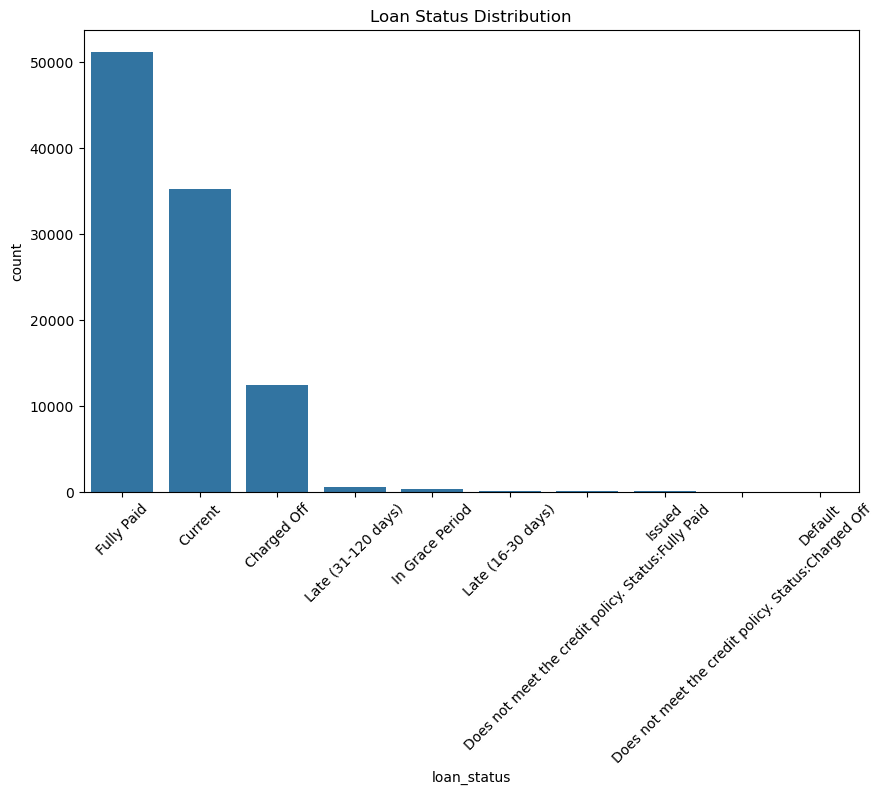

Class distribution:
loan_status
Fully Paid                                             0.51189
Current                                                0.35294
Charged Off                                            0.12384
Late (31-120 days)                                     0.00535
In Grace Period                                        0.00329
Late (16-30 days)                                      0.00090
Does not meet the credit policy. Status:Fully Paid     0.00069
Issued                                                 0.00063
Does not meet the credit policy. Status:Charged Off    0.00033
Default                                                0.00014
Name: proportion, dtype: float64


In [189]:
# Loan status distribution:


# Set plot size and create a countplot for the 'loan_status' column
plt.figure(figsize=(10, 6))
sns.countplot(x='loan_status', data=df, order=df['loan_status'].value_counts().index)
plt.title('Loan Status Distribution')
plt.xticks(rotation=45)
plt.show()

# Class balance stats
# Calculate the normalized class distribution (i.e., relative frequency of each class)
class_dist = df['loan_status'].value_counts(normalize=True)
print(f"Class distribution:\n{class_dist}")

In [190]:
# As we can see majority of the loans are indeed paid off with only 0.014% of loans actually defaulting in the 
# actual dataset. 

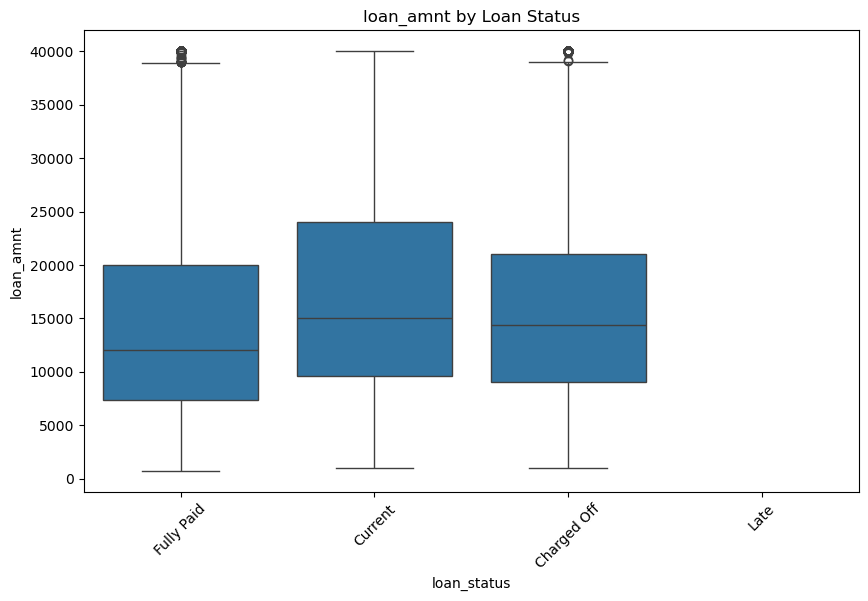

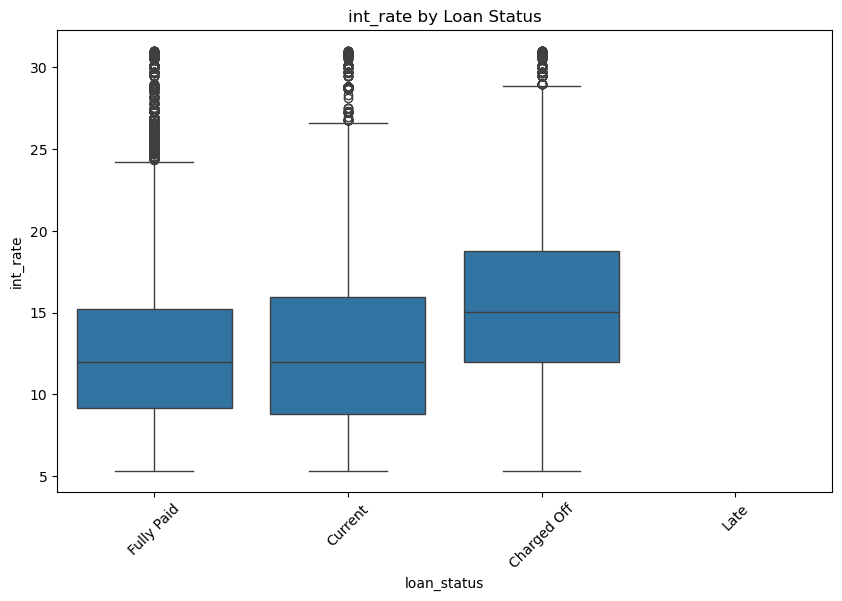

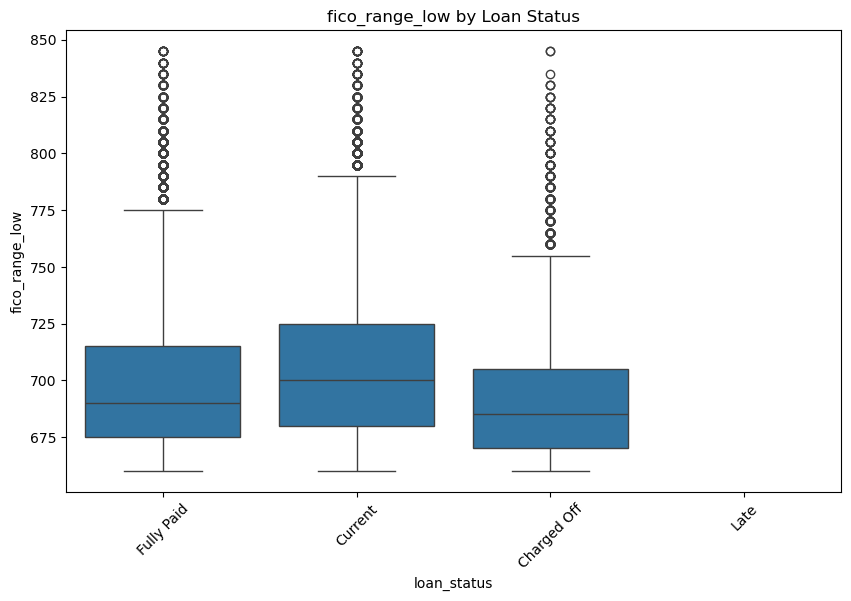

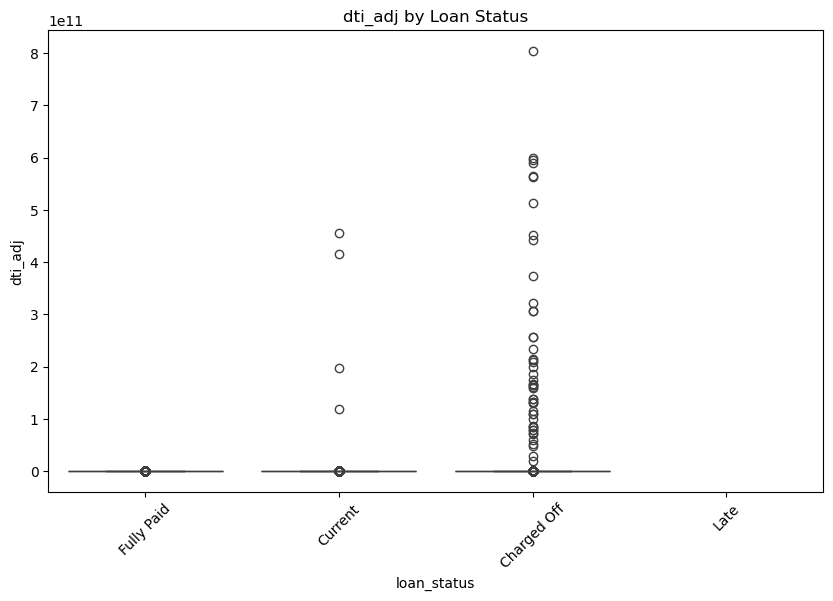

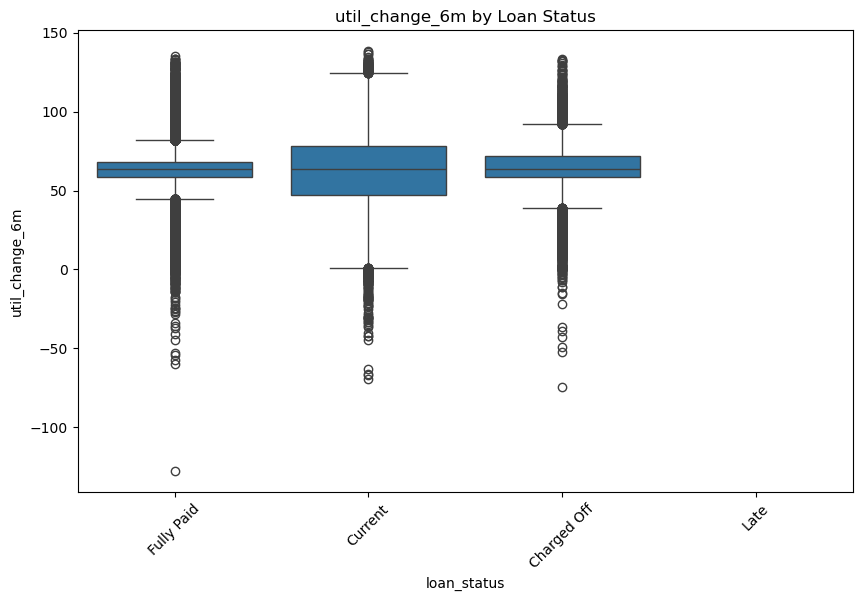

In [191]:
# List of numeric columns we want to analyse against loan status

num_cols_new = ['loan_amnt', 'int_rate', 'fico_range_low', 'dti_adj', 'util_change_6m']

# Loop through each selected numerical column
for col in num_cols_new:
    plt.figure(figsize=(10, 6)) # Set figure size for better readability
    # Create a boxplot to show distribution of the column across loan status categories
    
    sns.boxplot(x='loan_status', y=col, data=df, 
                order=['Fully Paid', 'Current', 'Charged Off', 'Late'])
    plt.title(f'{col} by Loan Status')
    plt.xticks(rotation=45)
    plt.show()  # Displays the plot

In [192]:
'''
The boxplots show that charged-off loans typically have higher interest rates, 
suggesting a strong link between high rates and default risk. 
While loan amounts vary across all statuses, they are not as clearly predictive of repayment outcome as interest rates are.


Loans that were Fully Paid or are Current tend to have higher FICO scores and lower adjusted debt-to-income ratios. 
In contrast, Charged Off loans show lower credit scores and higher financial burden, indicating higher default risk.

'''


'\nThe boxplots show that charged-off loans typically have higher interest rates, \nsuggesting a strong link between high rates and default risk. \nWhile loan amounts vary across all statuses, they are not as clearly predictive of repayment outcome as interest rates are.\n\n\nLoans that were Fully Paid or are Current tend to have higher FICO scores and lower adjusted debt-to-income ratios. \nIn contrast, Charged Off loans show lower credit scores and higher financial burden, indicating higher default risk.\n\n'

In [193]:
# For the next analysis we can do the Kruskal-Wallis test is used to determine if there's a statistically significant 
# difference in the distributions of numerical variables between loan statuses.

In [194]:
# This test is non-parametric, so it's great when data is not normally distributed
# It tests the null hypothesis that all groups have the same distribution.
from scipy.stats import kruskal

# Compare distributions across statuses
for col in num_cols_new:
     # Create separate groups for each loan status
    groups = [df[df['loan_status']==status][col] 
             for status in ['Fully Paid', 'Charged Off']]
    
    # Perform Kruskal-Wallis test
    # stat: the H-statistic (test statistic)
    # p: p-value for the test
    
    stat, p = kruskal(*groups)
    print(f"{col}: p-value = {p:.4f} ({'Significant' if p < 0.05 else 'NS'})")

loan_amnt: p-value = 0.0000 (Significant)
int_rate: p-value = 0.0000 (Significant)
fico_range_low: p-value = 0.0000 (Significant)
dti_adj: p-value = 0.0000 (Significant)
util_change_6m: p-value = 0.0000 (Significant)


In [195]:
'''
All tested variables (loan amount, interest rate, FICO score, DTI ratio, and credit utilization change) 
show statistically significant differences between fully paid and charged-off loans, with p-values effectively zero.

Higher-risk loans tend to have higher interest rates, lower credit scores, and elevated debt-to-income ratios, 
suggesting these are strong predictors of default.

Lenders could use these findings to refine risk assessment, 
such as tightening approval criteria for high-DTI applicants or 
adjusting interest rates based on credit utilization trends.


'''


'\nAll tested variables (loan amount, interest rate, FICO score, DTI ratio, and credit utilization change) \nshow statistically significant differences between fully paid and charged-off loans, with p-values effectively zero.\n\nHigher-risk loans tend to have higher interest rates, lower credit scores, and elevated debt-to-income ratios, \nsuggesting these are strong predictors of default.\n\nLenders could use these findings to refine risk assessment, \nsuch as tightening approval criteria for high-DTI applicants or \nadjusting interest rates based on credit utilization trends.\n\n\n'

In [196]:
# Lets analyse  which categorical features most strongly correlate with loan defaults, enabling better risk assessment.

<Figure size 1000x600 with 0 Axes>

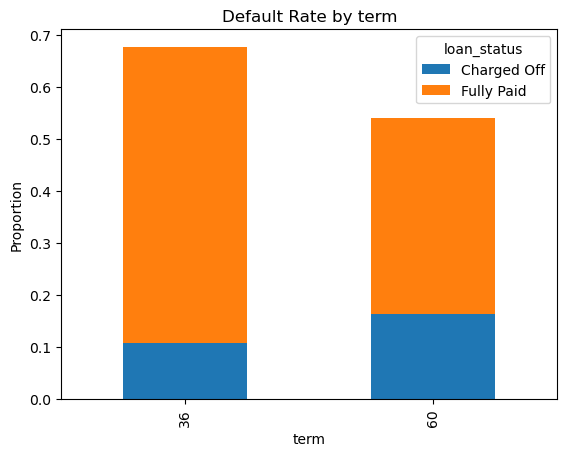

<Figure size 1000x600 with 0 Axes>

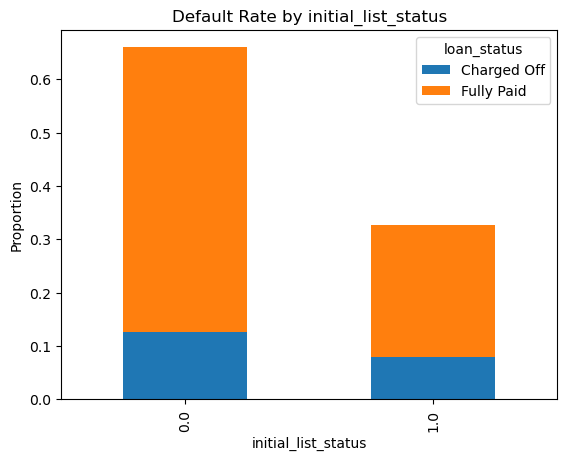

<Figure size 1000x600 with 0 Axes>

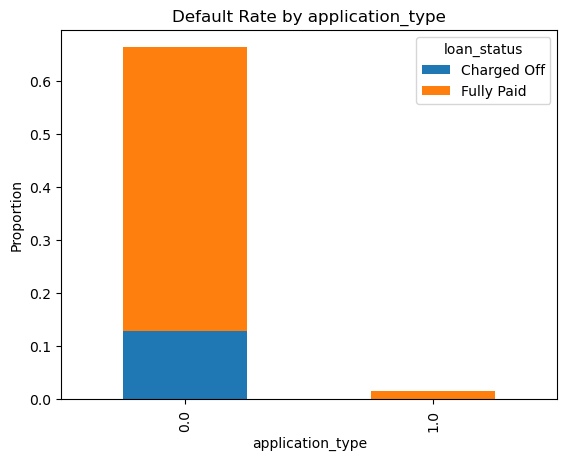

<Figure size 1000x600 with 0 Axes>

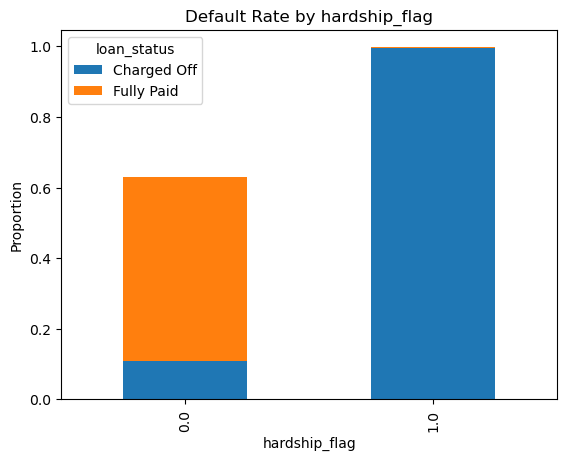

In [197]:
# Define categorical columns to analyze for loan default patterns
cat_cols = ['term', 'initial_list_status', 'application_type', 'hardship_flag']


# Analyze each categorical feature's relationship with loan status
for col in cat_cols:
    # Create a new figure for each feature with optimal size for readability
    plt.figure(figsize=(10, 6))
    df.groupby(col)['loan_status'].value_counts(normalize=True).unstack()[
        ['Charged Off', 'Fully Paid']].plot.bar(stacked=True)
    plt.title(f'Default Rate by {col}')
    plt.ylabel('Proportion')
    plt.show()

In [198]:
'''
Longer terms (e.g., 60 months) typically show higher default rates (taller "Charged Off" bars) due to extended risk 
exposure or borrower financial strain.


The graph shows loans with a hardship flag (1.0) have a much higher default rate (Charged Off) 
compared to unflagged loans (0.0), indicating financial hardship strongly predicts risk. Despite fewer hardship 
cases (1,756 vs. 98,244 unflagged), their high failure rate suggests 
lenders should monitor these loans more closely or offer modified terms.

'''

'\nLonger terms (e.g., 60 months) typically show higher default rates (taller "Charged Off" bars) due to extended risk \nexposure or borrower financial strain.\n\n\nThe graph shows loans with a hardship flag (1.0) have a much higher default rate (Charged Off) \ncompared to unflagged loans (0.0), indicating financial hardship strongly predicts risk. Despite fewer hardship \ncases (1,756 vs. 98,244 unflagged), their high failure rate suggests \nlenders should monitor these loans more closely or offer modified terms.\n\n'

In [199]:
# Chi-Square Test of Independence Analysis
## We're performing a Chi-Square test of independence between each categorical variable (`cat_cols`) and the `loan_status` target variable. 

'''
The test helps us determine if there's a statistically significant association between:
- Each categorical feature and loan status
- Whether the distribution of loan status differs across categories of each feature

This is feature selection - identifying which categorical variables have significant relationships with our
target variable.
'''

"\nThe test helps us determine if there's a statistically significant association between:\n- Each categorical feature and loan status\n- Whether the distribution of loan status differs across categories of each feature\n\nThis is feature selection - identifying which categorical variables have significant relationships with our\ntarget variable.\n"

In [200]:
from scipy.stats import chi2_contingency

for col in cat_cols:
    crosstab = pd.crosstab(df[col], df['loan_status']) # Creates a contingency table (crosstab) for each categorical variable against loan status
    chi2, p, _, _ = chi2_contingency(crosstab) # Calculates the Chi-Square statistic and p-value using `chi2_contingency`
    print(f"{col}: p-value = {p:.4f}")

term: p-value = 0.0000
initial_list_status: p-value = 0.0000
application_type: p-value = 0.0000
hardship_flag: p-value = 0.0000


In [201]:
'''
All p-values are 0.0000 (meaning < 0.0001), which indicates:
- **Extremely significant** relationships between all tested variables and loan status
- We can reject the null hypothesis (of independence) for:
  - `term` (loan term)
  - `initial_list_status` (initial listing status)
  - `application_type` (type of application)
  - `hardship_flag` (whether hardship was flagged)

All these categorical variables show statistically significant associations with loan status and should likely include them in the model. 

'''

'\nAll p-values are 0.0000 (meaning < 0.0001), which indicates:\n- **Extremely significant** relationships between all tested variables and loan status\n- We can reject the null hypothesis (of independence) for:\n  - `term` (loan term)\n  - `initial_list_status` (initial listing status)\n  - `application_type` (type of application)\n  - `hardship_flag` (whether hardship was flagged)\n\nAll these categorical variables show statistically significant associations with loan status and should likely include them in the model. \n\n'

In [202]:
# Lets the see the distribution within different variables categorised by loan status:

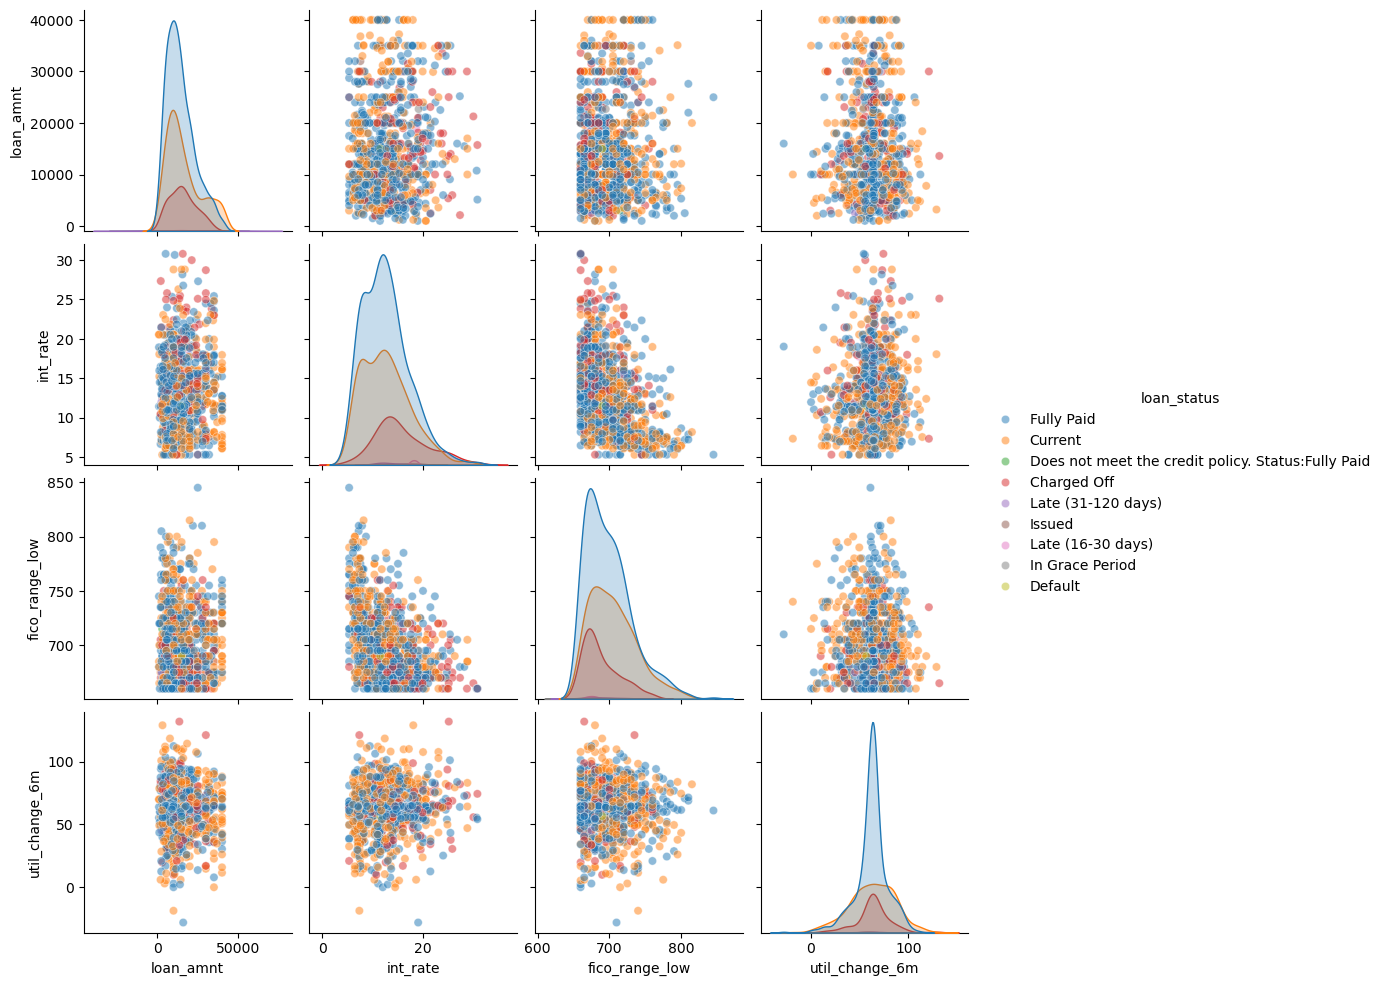

In [203]:
sns.pairplot(df.sample(1000),  # Random 1000-observation sample
             vars=['loan_amnt', 'int_rate', 'fico_range_low', 'util_change_6m'],
             hue='loan_status', # Color-coded by target variable  
             plot_kws={'alpha':0.5},
             diag_kind='kde')  # Smoothed distribution plots


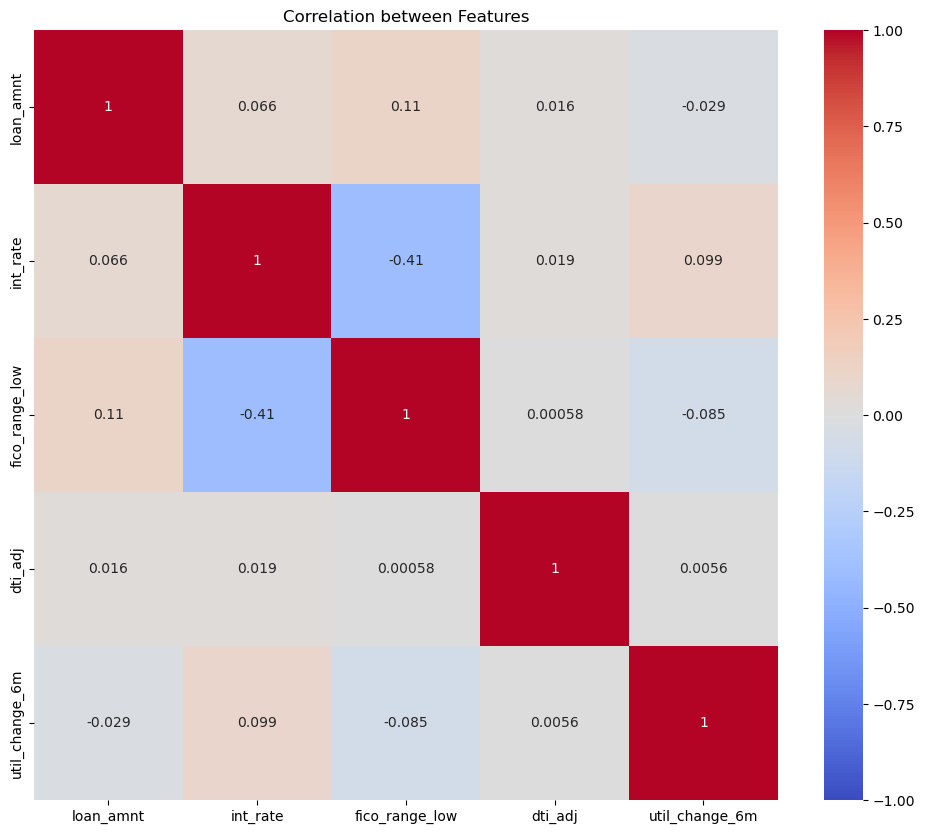

In [204]:
# Encode target temporarily

'''
The heatmap displays Pearson correlation coefficients between numerical features. 
'''

# Plot correlations
plt.figure(figsize=(12, 10))
sns.heatmap(df[num_cols_new].corr(), 
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between Features')
plt.show()

In [205]:
'''
As we can see there seems to be a high correlation between dti_adj and the interest rate. 
This might be because higher Debt-to-Income ratio (DTI_adj) typically leads to higher interest rates because 
it signals greater financial risk to lenders

The negative correlation (-0.41) between int_rate (interest rate) and fico_range_low (borrower's minimum FICO score) 
reflects a fundamental principle of lending: risk-based pricing. This exists because Borrowers with lower credit scores are 
statistically more likely to default.

'''

"\nAs we can see there seems to be a high correlation between dti_adj and the interest rate. \nThis might be because higher Debt-to-Income ratio (DTI_adj) typically leads to higher interest rates because \nit signals greater financial risk to lenders\n\nThe negative correlation (-0.41) between int_rate (interest rate) and fico_range_low (borrower's minimum FICO score) \nreflects a fundamental principle of lending: risk-based pricing. This exists because Borrowers with lower credit scores are \nstatistically more likely to default.\n\n"

In [206]:
'''
In this part, we will do additional feature removing. Though we have removed features using VarianceThreshold
and mutual_info_classif, we will now use further rigorous feature correlation method and
our domain knowledge about finance to do additional feature removing
justifying each step of the way.


'''

'\nIn this part, we will do additional feature removing. Though we have removed features using VarianceThreshold\nand mutual_info_classif, we will now use further rigorous feature correlation method and\nour domain knowledge about finance to do additional feature removing\njustifying each step of the way.\n\n\n'

In [207]:
df

,loan_amnt,term,int_rate,installment,home_ownership,title,fico_range_low,fico_range_high,initial_list_status,out_prncp,...,issue_month,days_since_last_pymnt,days_since_last_check,is_delinquent,dti_adj,util_change_6m,new_accounts_per_month,interest_burden,covid_highrisk,payment_delay_days
0,4000.0,36,13.08,134.93,0.49149,0.06281,665.0,669.0,0.0,3816.34,...,3,0,61,1,195.991758,52.016000,0.041667,195.991758,1,-31
1,24000.0,60,9.16,500.07,0.39472,0.22342,680.0,684.0,0.0,4333.29,...,2,0,1551,1,8.622475,68.990923,0.166667,8.622475,0,-31
2,5000.0,36,10.49,162.49,0.49149,0.22342,665.0,669.0,0.0,0.00,...,1,851,1947,1,8.970914,64.179676,0.166667,8.970918,0,-882
3,24000.0,60,11.05,522.42,0.49149,0.52162,750.0,754.0,0.0,16317.69,...,6,0,700,1,22.098287,59.756184,0.166667,22.098287,0,-31
4,14000.0,60,13.59,322.79,0.49149,0.52162,735.0,739.0,0.0,0.00,...,1,215,761,1,11.457525,59.203021,0.208333,11.457525,0,-336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3300.0,36,11.49,108.81,0.49149,0.05722,670.0,674.0,0.0,0.00,...,7,913,1370,1,10.666546,42.889451,0.083333,10.666543,0,-974
99996,6000.0,36,9.80,193.05,0.39472,0.02034,715.0,719.0,0.0,0.00,...,1,883,1461,1,8.751706,64.250056,0.188007,8.751706,0,-1035
99997,10000.0,60,19.99,264.89,0.39472,0.52162,660.0,664.0,0.0,0.00,...,6,304,791,1,50.451260,44.724787,0.250000,50.451260,0,-974
99998,10625.0,36,8.81,336.94,0.49149,0.52162,765.0,769.0,0.0,8499.51,...,9,0,243,1,34.793723,66.625599,0.333333,34.793723,0,-31


In [208]:
# Ensuring we are not taking into account the actual target variable:
df.drop('loan_status', axis=1, inplace=True)

In [209]:
'''
Random Forest Feature Importance Analysis.
Using RF we can identify which features actually impact predictions, allowing us to remove any noisy/irrelevant features. 
and simplying the model without sacrifising the accuracy.

The idea behind executing RF and f_classif is that we will know the most important features and identifying irrelevent/correlated 
columns will really help the model with dimentionily reduction and also remove any columns that contain data leakage information.
The difference between the below methods and the above methods used such as VarianceThreshold is that, we will be able to manually 
remove features which will require domain knowledge unlike the methods above.

'''

'\nRandom Forest Feature Importance Analysis.\nUsing RF we can identify which features actually impact predictions, allowing us to remove any noisy/irrelevant features. \nand simplying the model without sacrifising the accuracy.\n\nThe idea behind executing RF and f_classif is that we will know the most important features and identifying irrelevent/correlated \ncolumns will really help the model with dimentionily reduction and also remove any columns that contain data leakage information.\nThe difference between the below methods and the above methods used such as VarianceThreshold is that, we will be able to manually \nremove features which will require domain knowledge unlike the methods above.\n\n'

In [210]:
from sklearn.ensemble import RandomForestClassifier

# we will use RandomForestClassifier 

# Initialize and train a Random Forest model with:
# - 100 decision trees (n_estimators=100)
# - Fixed random state for reproducibility (random_state=42)

# Train quick model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Get importance scores:
# Extract and sort feature importance scores
importance_scores = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

# Display top 16 most important features
print("\nModel-based importance:")
print(importance_scores.head(16))


Model-based importance:
                    Feature  Importance
27                out_prncp    0.253423
28            out_prncp_inv    0.220094
34               recoveries    0.065954
35  collection_recovery_fee    0.061471
36          last_pymnt_amnt    0.052782
31          total_rec_prncp    0.047694
37     last_fico_range_high    0.035369
38      last_fico_range_low    0.031386
29              total_pymnt    0.027372
30          total_pymnt_inv    0.024675
0                 loan_amnt    0.018657
3               installment    0.016304
53              open_rv_12m    0.013131
59              total_cu_tl    0.009824
58                   inq_fi    0.009644
54              open_rv_24m    0.007146


In [211]:
'''
Right off the bat, we can see there are some columns that would cause data leakage so lets remove them 
as they artificially inflate model performance by including information that wouldn't be available at prediction time.

These contain post-approval payment information (e.g., repayments, recoveries, or fees) 
that would not be available when making the initial loan decision.
'''

leakage_cols = ['last_pymnt_amnt', 'recoveries', 'collection_recovery_fee','total_pymnt_inv','total_pymnt','days_since_last_pymnt','total_rec_prncp']
df.drop(leakage_cols, axis=1, inplace=True)

In [212]:
# FICO ranges (high/low) are strongly correlated and represent the same borrower's credit profile at the same point in time.
# so we will drop last_fico_range_high to reduce noise without losing information:

# Out of total_rec_prncp and total_rec_int, they both relate to total received (principal vs. interest), but often move together
# so lets remove one of them:

redunant_cols = ['last_fico_range_high', 'total_rec_int']
df.drop(redunant_cols, axis=1, inplace=True)

In [213]:
'''
We will now add another layer of similar approach of identifying correlated features called F-test for feature selection.
This has the following advantages:
   - Measures how well each feature separates the target classes (`loan_status_encoded`)  
   - Filters out weak/noisy features that lack predictive power  
   
Similarly like we did with RF, we will try to identify any correlated features or any features with data leakage.
'''

'\nWe will now add another layer of similar approach of identifying correlated features called F-test for feature selection.\nThis has the following advantages:\n   - Measures how well each feature separates the target classes (`loan_status_encoded`)  \n   - Filters out weak/noisy features that lack predictive power  \n   \nSimilarly like we did with RF, we will try to identify any correlated features or any features with data leakage.\n'

In [214]:
from sklearn.feature_selection import f_classif

# Separate features and target
X = df.drop('loan_status_encoded', axis=1)
y = df['loan_status_encoded']

# Calculate ANOVA F-values
f_scores, p_values = f_classif(X, y)

# Create importance dataframe
# Rank features by F-score (higher = more separation between classes)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'F_Score': f_scores,
    'P_Value': p_values
}).sort_values('F_Score', ascending=False)

# Display top 15 features
print("Top predictive features:")
print(feature_importance.head(15))

Top predictive features:
                         Feature       F_Score  P_Value
9                      out_prncp  15669.548565      0.0
10                 out_prncp_inv  15665.956924      0.0
51       days_since_last_payment   8845.397314      0.0
54                    issue_year   8577.728442      0.0
63            payment_delay_days   8158.024263      0.0
12           last_fico_range_low   6871.248748      0.0
58                       dti_adj   4392.050810      0.0
52  days_since_last_credit_check   4383.087965      0.0
56         days_since_last_check   4383.087965      0.0
61               interest_burden   4291.667395      0.0
48                 hardship_flag   1592.101404      0.0
13              application_type    898.732527      0.0
62                covid_highrisk    764.016168      0.0
53                  is_covid_era    733.252248      0.0
2                       int_rate    508.069215      0.0


In [215]:
'''
Hardship status is often a consequence of loan default risk (not a cause), creating a target leakage loop.
For application_type, This often distinguishes "individual" vs. "joint" applications
and Lenders rarely adjust approval logic based on application type alone so lets drop them

'''
df.drop(['hardship_flag','application_type'], axis=1, inplace=True)

In [216]:
'''
From f_classif and RF, we can see that out_prncp and out_prncp_inv are extremely predictive but however 
these two columns are correlated because they measure the same underlying metric (remaining debt),

'''
df.drop('out_prncp_inv', axis=1, inplace=True)

In [217]:
df

,loan_amnt,term,int_rate,installment,home_ownership,title,fico_range_low,fico_range_high,initial_list_status,out_prncp,...,issue_year,issue_month,days_since_last_check,is_delinquent,dti_adj,util_change_6m,new_accounts_per_month,interest_burden,covid_highrisk,payment_delay_days
0,4000.0,36,13.08,134.93,0.49149,0.06281,665.0,669.0,0.0,3816.34,...,2020,3,61,1,195.991758,52.016000,0.041667,195.991758,1,-31
1,24000.0,60,9.16,500.07,0.39472,0.22342,680.0,684.0,0.0,4333.29,...,2016,2,1551,1,8.622475,68.990923,0.166667,8.622475,0,-31
2,5000.0,36,10.49,162.49,0.49149,0.22342,665.0,669.0,0.0,0.00,...,2015,1,1947,1,8.970914,64.179676,0.166667,8.970918,0,-882
3,24000.0,60,11.05,522.42,0.49149,0.52162,750.0,754.0,0.0,16317.69,...,2018,6,700,1,22.098287,59.756184,0.166667,22.098287,0,-31
4,14000.0,60,13.59,322.79,0.49149,0.52162,735.0,739.0,0.0,0.00,...,2018,1,761,1,11.457525,59.203021,0.208333,11.457525,0,-336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3300.0,36,11.49,108.81,0.49149,0.05722,670.0,674.0,0.0,0.00,...,2016,7,1370,1,10.666546,42.889451,0.083333,10.666543,0,-974
99996,6000.0,36,9.80,193.05,0.39472,0.02034,715.0,719.0,0.0,0.00,...,2016,1,1461,1,8.751706,64.250056,0.188007,8.751706,0,-1035
99997,10000.0,60,19.99,264.89,0.39472,0.52162,660.0,664.0,0.0,0.00,...,2016,6,791,1,50.451260,44.724787,0.250000,50.451260,0,-974
99998,10625.0,36,8.81,336.94,0.49149,0.52162,765.0,769.0,0.0,8499.51,...,2019,9,243,1,34.793723,66.625599,0.333333,34.793723,0,-31


In [218]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'title', 'fico_range_low', 'fico_range_high', 'initial_list_status',
       'out_prncp', 'total_rec_late_fee', 'last_fico_range_low', 'open_acc_6m',
       'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
       'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats',
       'num_bc_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_op_past_12m', 'percent_bc_gt_75', 'total_bc_limit',
       'total_il_high_credit_limit', 'debt_settlement_flag',
       'loan_status_encoded', 'credit_history_years',
       'days_since_last_payment', 'days_since_last_credit_check',


In [219]:
'''
Now we have manually removed columns, lets see the remaining column and the relationship between them:
This heatmap serves as a final diagnostic check to ensure our model’s health.
'''

'\nNow we have manually removed columns, lets see the remaining column and the relationship between them:\nThis heatmap serves as a final diagnostic check to ensure our model’s health.\n'

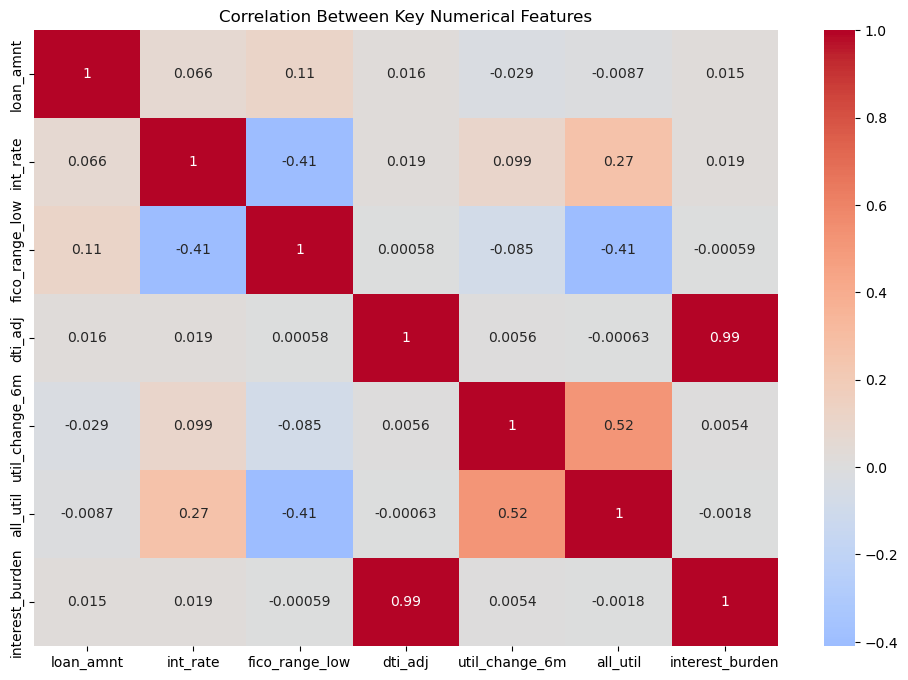

In [220]:

# Focus on key numerical features
num_cols = ['loan_amnt', 'int_rate', 'fico_range_low', 'dti_adj', 'util_change_6m', 
            'all_util', 'interest_burden']
plt.figure(figsize=(12, 8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Between Key Numerical Features")
plt.show()

In [221]:
# As we can see the numerical columns seems to be correlated enough for the model to get 
# gain understanding of the key relationship but not too correlated to the point there is redundant information


In [222]:
# Expected between fico_range_low and int_rate (lower FICO -> higher rates)

In [223]:
'''
The below visualization (term vs. int_rate segmented by loan_status_encoded) reveals critical risk patterns in lending decisions.

'''

'\nThe below visualization (term vs. int_rate segmented by loan_status_encoded) reveals critical risk patterns in lending decisions.\n\n'

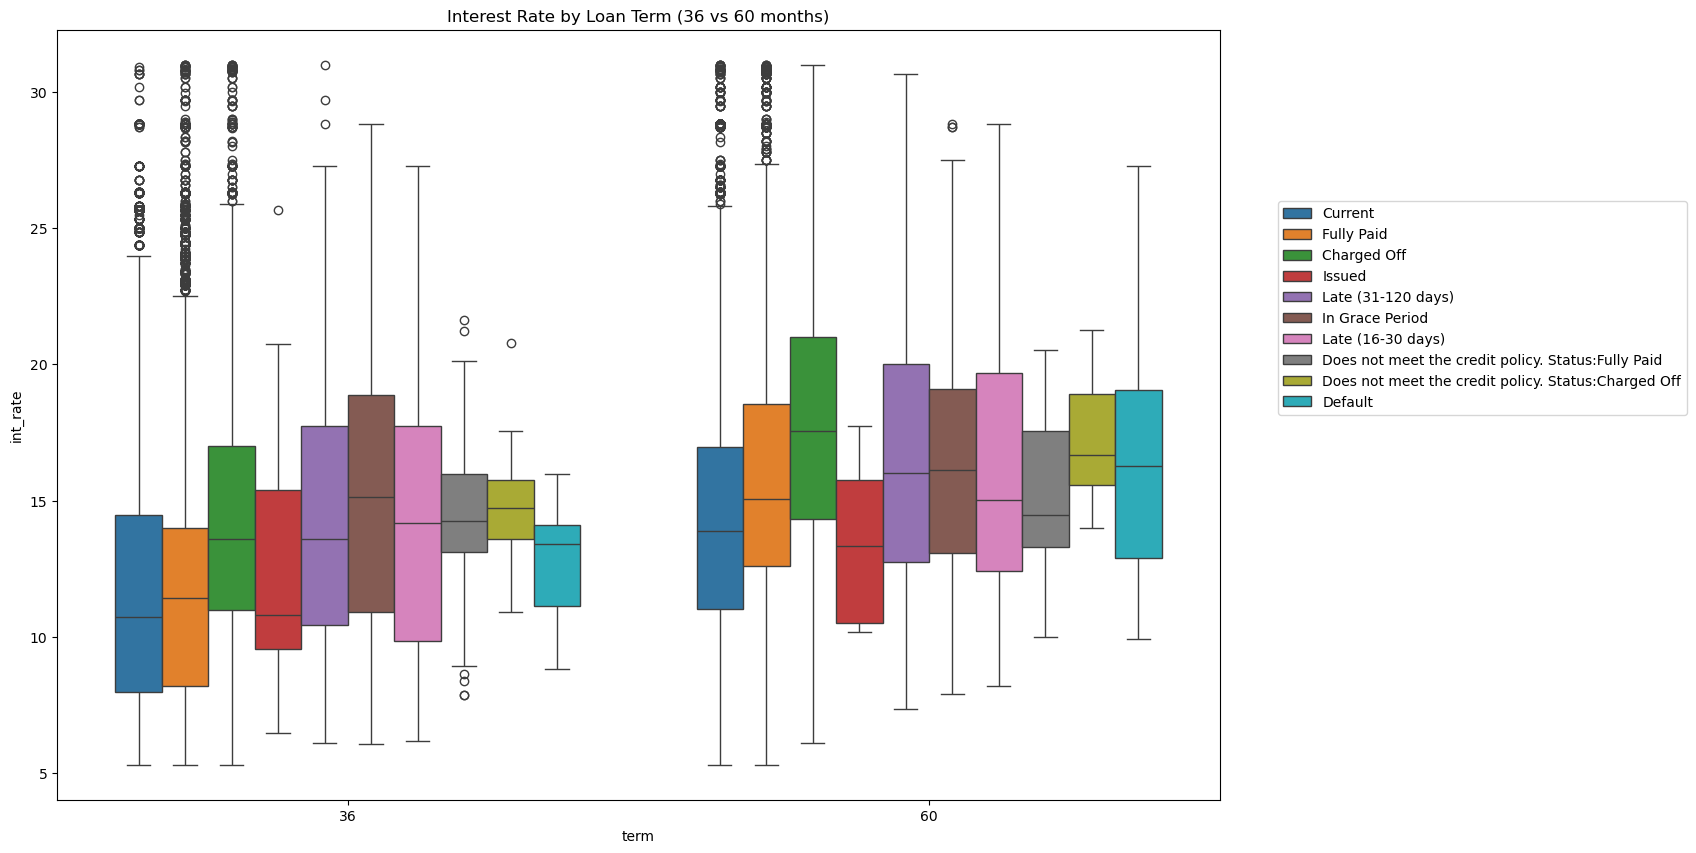

In [224]:
plt.figure(figsize=(15,10))

# Generate a boxplot showing interest rate distribution by:
# x-axis: Loan term (36 vs 60 months)
# y-axis: Interest rate 
# hue: Loan status (using encoded values for color differentiation)
sns.boxplot(x='term', y='int_rate', hue=target_var, data=df)
plt.title("Interest Rate by Loan Term (36 vs 60 months)")

# Position the legend outside the plot area (right side) to prevent overlap
# loc=(1.05,0.5) places it just outside the plot. 
plt.legend(loc=(1.05,0.5))



In [225]:
# As we can see there are higher default rates for 60-month loans at the same interest rate.
# its also important to notice that rates were similar across terms/statuses, the lender may underprice risk.

In [226]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'title', 'fico_range_low', 'fico_range_high', 'initial_list_status',
       'out_prncp', 'total_rec_late_fee', 'last_fico_range_low', 'open_acc_6m',
       'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
       'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats',
       'num_bc_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_op_past_12m', 'percent_bc_gt_75', 'total_bc_limit',
       'total_il_high_credit_limit', 'debt_settlement_flag',
       'loan_status_encoded', 'credit_history_years',
       'days_since_last_payment', 'days_since_last_credit_check',


Text(0.5, 1.0, 'Credit Risk: FICO + Debt-to-Income Ratio')

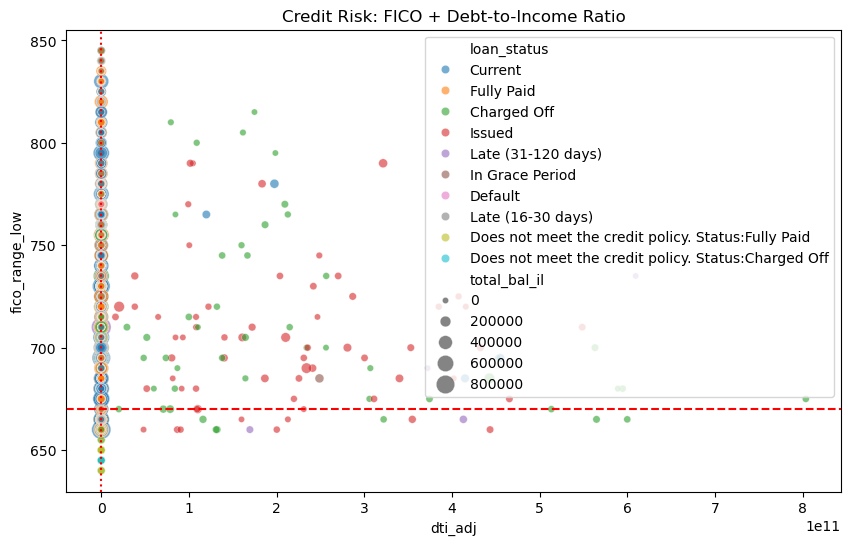

In [227]:
# Set the overall figure size for the plot
plt.figure(figsize=(10, 6))

# Create a scatterplot using seaborn to visualize the relationship between adjusted DTI and FICO score
sns.scatterplot(
    x='dti_adj',                  # X-axis: adjusted debt-to-income ratio
    y='fico_range_low',          # Y-axis: lower bound of the borrower's FICO score range
    hue=target_var,              # Color by the target variable (e.g., loan status class)
    size='total_bal_il',         # Bubble size based on total balance on installment loans
    sizes=(20, 200),             # Range for bubble sizes
    alpha=0.6,                   # Transparency level for better readability
    data=df                    # Source dataframe with a sample of 1000
)

# Add a horizontal red dashed line at FICO = 670 to indicate the subprime credit risk threshold
plt.axhline(y=670, color='r', linestyle='--', label='Subprime FICO Threshold')

# Add a vertical red dotted line at DTI = 40% to highlight a high debt-to-income risk level
plt.axvline(x=40, color='r', linestyle=':', label='High DTI Threshold')

# Set the title of the plot
plt.title("Credit Risk: FICO + Debt-to-Income Ratio")


In [228]:
'''
The graph illustrates the distribution of borrower risk based on their FICO scores and debt-to-income (DTI) ratios. 
The top-left quadrant (high FICO, low DTI) typically represents low-risk borrowers, and we observe that the majority of fully paid loans 
fall within this area—aligning well with expectations.

In contrast, the bottom-right quadrant (low FICO, high DTI) highlights high-risk borrowers. 
Notably, within this sample of 1,000, only a small number of cases appear in this high-risk zone, 
reinforcing that most borrowers are concentrated in safer credit profiles.

An additional layer of insight comes from the size of each bubble, which represents the total balance across installment 
loans (total_bal_il). Larger bubbles in riskier quadrants may indicate overextended borrowers, as they carry higher loan balances 
on top of already poor credit indicators

'''

'\nThe graph illustrates the distribution of borrower risk based on their FICO scores and debt-to-income (DTI) ratios. \nThe top-left quadrant (high FICO, low DTI) typically represents low-risk borrowers, and we observe that the majority of fully paid loans \nfall within this area—aligning well with expectations.\n\nIn contrast, the bottom-right quadrant (low FICO, high DTI) highlights high-risk borrowers. \nNotably, within this sample of 1,000, only a small number of cases appear in this high-risk zone, \nreinforcing that most borrowers are concentrated in safer credit profiles.\n\nAn additional layer of insight comes from the size of each bubble, which represents the total balance across installment \nloans (total_bal_il). Larger bubbles in riskier quadrants may indicate overextended borrowers, as they carry higher loan balances \non top of already poor credit indicators\n\n'

Text(0.5, 0, 'FICO Score Tier')

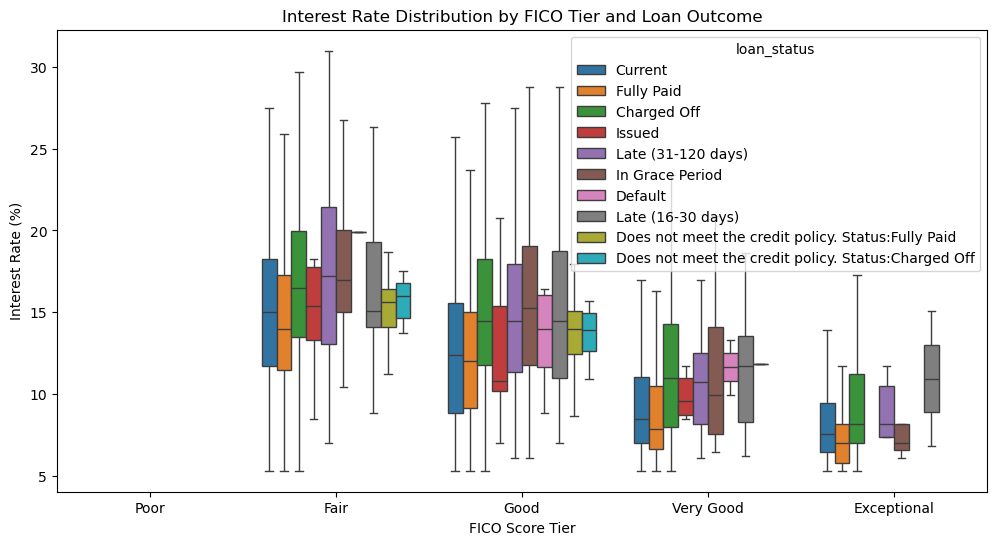

In [229]:
# Bin FICO scores into tiers
# The bins categorize scores into standard credit rating tiers:
# 300-579: Poor (subprime)
# 580-669: Fair
# 670-739: Good
# 740-799: Very Good
# 800-850: Exceptional
df['fico_tier'] = pd.cut(df['fico_range_low'], 
                         bins=[300, 580, 670, 740, 800, 850],
                         labels=['Poor', 'Fair', 'Good', 'Very Good', 'Exceptional'])

# Plot rate distribution by tier and outcome
plt.figure(figsize=(12, 6))

# Generate a boxplot showing interest rate distribution across:
# x-axis: FICO tiers (categorical)
# y-axis: Interest rates (continuous)
sns.boxplot(
    x='fico_tier',
    y='int_rate',
    hue= target_var,
    data=df,
    showfliers=False,
    
)
plt.title("Interest Rate Distribution by FICO Tier and Loan Outcome")
plt.ylabel("Interest Rate (%)")
plt.xlabel("FICO Score Tier")

In [230]:

combined_status = pd.concat([target_var, loan_status_encoded], axis=1)
combined_status.value_counts()

loan_status                                          loan_status_encoded
Fully Paid                                           5                      51189
Current                                              1                      35294
Charged Off                                          0                      12384
Late (31-120 days)                                   9                        535
In Grace Period                                      6                        329
Late (16-30 days)                                    8                         90
Does not meet the credit policy. Status:Fully Paid   4                         69
Issued                                               7                         63
Does not meet the credit policy. Status:Charged Off  3                         33
Default                                              2                         14
Name: count, dtype: int64

In [231]:
'''
As we can see that borrowers with high FICO score have lower interest rates. The default rates seems to be the highest
for users who are in 'Good' category. 

The fully paid and late status seems to get lower as the FICO scores increases which is to be expected. We can also see that default rates
are non-existant exceptional FICO score which again is to be expected as no default rates is the main reason for exception score. 

There also seems to be no default rates for 'fair' FICO scores, this might be because The cutoffs for FICO tiers might been  
excluded borrowers who would default. Lenders may impose stricter conditions (e.g., higher interest rates, 
lower loan amounts, or shorter terms) on borrowers with "Fair" credit to mitigate risk.

'''


'\nAs we can see that borrowers with high FICO score have lower interest rates. The default rates seems to be the highest\nfor users who are in \'Good\' category. \n\nThe fully paid and late status seems to get lower as the FICO scores increases which is to be expected. We can also see that default rates\nare non-existant exceptional FICO score which again is to be expected as no default rates is the main reason for exception score. \n\nThere also seems to be no default rates for \'fair\' FICO scores, this might be because The cutoffs for FICO tiers might been  \nexcluded borrowers who would default. Lenders may impose stricter conditions (e.g., higher interest rates, \nlower loan amounts, or shorter terms) on borrowers with "Fair" credit to mitigate risk.\n\n'

In [232]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'title', 'fico_range_low', 'fico_range_high', 'initial_list_status',
       'out_prncp', 'total_rec_late_fee', 'last_fico_range_low', 'open_acc_6m',
       'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
       'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats',
       'num_bc_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_op_past_12m', 'percent_bc_gt_75', 'total_bc_limit',
       'total_il_high_credit_limit', 'debt_settlement_flag',
       'loan_status_encoded', 'credit_history_years',
       'days_since_last_payment', 'days_since_last_credit_check',


In [233]:
# Ok lets get rid of the fico tier since we are done with visualising it. 
df.drop(['fico_tier'], inplace=True, axis=1)

In [234]:
df['loan_status_encoded'].value_counts()

loan_status_encoded
5    51189
1    35294
0    12384
9      535
6      329
8       90
4       69
7       63
3       33
2       14
Name: count, dtype: int64

In [235]:
target_var.value_counts().index

Index(['Fully Paid', 'Current', 'Charged Off', 'Late (31-120 days)',
       'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid', 'Issued',
       'Does not meet the credit policy. Status:Charged Off', 'Default'],
      dtype='object', name='loan_status')

In [236]:
df

,loan_amnt,term,int_rate,installment,home_ownership,title,fico_range_low,fico_range_high,initial_list_status,out_prncp,...,issue_year,issue_month,days_since_last_check,is_delinquent,dti_adj,util_change_6m,new_accounts_per_month,interest_burden,covid_highrisk,payment_delay_days
0,4000.0,36,13.08,134.93,0.49149,0.06281,665.0,669.0,0.0,3816.34,...,2020,3,61,1,195.991758,52.016000,0.041667,195.991758,1,-31
1,24000.0,60,9.16,500.07,0.39472,0.22342,680.0,684.0,0.0,4333.29,...,2016,2,1551,1,8.622475,68.990923,0.166667,8.622475,0,-31
2,5000.0,36,10.49,162.49,0.49149,0.22342,665.0,669.0,0.0,0.00,...,2015,1,1947,1,8.970914,64.179676,0.166667,8.970918,0,-882
3,24000.0,60,11.05,522.42,0.49149,0.52162,750.0,754.0,0.0,16317.69,...,2018,6,700,1,22.098287,59.756184,0.166667,22.098287,0,-31
4,14000.0,60,13.59,322.79,0.49149,0.52162,735.0,739.0,0.0,0.00,...,2018,1,761,1,11.457525,59.203021,0.208333,11.457525,0,-336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3300.0,36,11.49,108.81,0.49149,0.05722,670.0,674.0,0.0,0.00,...,2016,7,1370,1,10.666546,42.889451,0.083333,10.666543,0,-974
99996,6000.0,36,9.80,193.05,0.39472,0.02034,715.0,719.0,0.0,0.00,...,2016,1,1461,1,8.751706,64.250056,0.188007,8.751706,0,-1035
99997,10000.0,60,19.99,264.89,0.39472,0.52162,660.0,664.0,0.0,0.00,...,2016,6,791,1,50.451260,44.724787,0.250000,50.451260,0,-974
99998,10625.0,36,8.81,336.94,0.49149,0.52162,765.0,769.0,0.0,8499.51,...,2019,9,243,1,34.793723,66.625599,0.333333,34.793723,0,-31


In [237]:
'''

Now its time to scale the values!
For this part its very important that we dont scale the encoded/binary encoded values, but rather to scale anything but the encoded
values. So its very important for us to separate the two! 

'''

'\n\nNow its time to scale the values!\nFor this part its very important that we dont scale the encoded/binary encoded values, but rather to scale anything but the encoded\nvalues. So its very important for us to separate the two! \n\n'

In [238]:
# This function check for any non-encoded values and appends them in a list. 
def get_non_encoded(df):
    non_encoded_cols = []
    for col in df.columns:
        unique_values = df[col].unique()
        # Check if column is NOT binary (0/1) and if not then append to the list:
        if not (set(unique_values).issubset({0.0, 1.0})):
            non_encoded_cols.append(col)
    return non_encoded_cols


df_non_encoded = get_non_encoded(df)
print("Non-encoded columns:", df_non_encoded)

Non-encoded columns: ['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership', 'title', 'fico_range_low', 'fico_range_high', 'out_prncp', 'total_rec_late_fee', 'last_fico_range_low', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_op_past_12m', 'percent_bc_gt_75', 'total_bc_limit', 'total_il_high_credit_limit', 'loan_status_encoded', 'credit_history_years', 'days_since_last_payment', 'days_since_last_credit_check', 'issue_year', 'issue_month', 'days_since_last_check', 'dti_adj', 'util_change_6m', 'new_accounts_per_month', 'interest_burd

In [239]:
# Lets look at some of these non_encoded columns:
df_non_encoded

['loan_amnt',
 'term',
 'int_rate',
 'installment',
 'home_ownership',
 'title',
 'fico_range_low',
 'fico_range_high',
 'out_prncp',
 'total_rec_late_fee',
 'last_fico_range_low',
 'open_acc_6m',
 'open_act_il',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_op_past_12m',
 'percent_bc_gt_75',
 'total_bc_limit',
 'total_il_high_credit_limit',
 'loan_status_encoded',
 'credit_history_years',
 'days_since_last_payment',
 'days_since_last_credit_check',
 'issue_year',
 'issue_month',
 'days_since_last_check',
 'dti_adj',
 'util_change_6m',
 'new_ac

In [240]:
# Lets also remove the target variable as we do not want to scale this either:
df.drop('loan_status_encoded', axis=1, inplace=True)

In [241]:
# Lets also remove this from the df_non_encoded:
df_non_encoded.remove('loan_status_encoded')

In [242]:
# Lets get the df_non_encoded columns:
df_non_encoded_n_scaled = df[df_non_encoded]

In [243]:
# This df that should contain data that is not 1 and 0 and we will be scaling this:
df_non_encoded_n_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 56 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   loan_amnt                     100000 non-null  float64
 1   term                          100000 non-null  int64  
 2   int_rate                      100000 non-null  float64
 3   installment                   100000 non-null  float64
 4   home_ownership                100000 non-null  float64
 5   title                         100000 non-null  float64
 6   fico_range_low                100000 non-null  float64
 7   fico_range_high               100000 non-null  float64
 8   out_prncp                     100000 non-null  float64
 9   total_rec_late_fee            100000 non-null  float64
 10  last_fico_range_low           100000 non-null  float64
 11  open_acc_6m                   100000 non-null  float64
 12  open_act_il                   100000 non-null

In [244]:
# This is the column with encoded values, this will also contain datetime columns:
df_encoded = df[df.columns.difference(df_non_encoded_n_scaled.columns)]

In [245]:
# Making sure we have no datetime features:
df_non_encoded_n_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 56 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   loan_amnt                     100000 non-null  float64
 1   term                          100000 non-null  int64  
 2   int_rate                      100000 non-null  float64
 3   installment                   100000 non-null  float64
 4   home_ownership                100000 non-null  float64
 5   title                         100000 non-null  float64
 6   fico_range_low                100000 non-null  float64
 7   fico_range_high               100000 non-null  float64
 8   out_prncp                     100000 non-null  float64
 9   total_rec_late_fee            100000 non-null  float64
 10  last_fico_range_low           100000 non-null  float64
 11  open_acc_6m                   100000 non-null  float64
 12  open_act_il                   100000 non-null

In [246]:
# Import the standard scaler library:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fitting and transforming the dataframe:
df_non_encoded_scaled = scaler.fit_transform(df_non_encoded_n_scaled)

In [247]:
df_non_encoded_scaled = pd.DataFrame(df_non_encoded_scaled)

In [248]:
# Combining all the dataframes together:
df_final_log = pd.concat([df_non_encoded_scaled,df_encoded,loan_status_encoded], axis=1)
# This should now contain all the scaled int/float values along with binary values and datetime values!
df_final_log

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,covid_highrisk,debt_settlement_flag,initial_list_status,is_covid_era,is_delinquent,loan_status_encoded
0,-1.196895,-0.648674,0.004770,-1.182175,0.700186,-1.266000,-1.054388,-1.054363,0.016617,-0.130474,...,-0.554248,-1.192996,-0.029212,0.863239,1,0.0,0.0,1,1,1
1,0.915452,1.541607,-0.799013,0.207066,-0.131261,-0.505237,-0.610612,-0.610601,0.097101,-0.130474,...,0.327177,-0.132382,-0.029213,0.863239,0,0.0,0.0,0,1,1
2,-1.091278,-0.648674,-0.526301,-1.077318,0.700186,-0.505237,-1.054388,-1.054363,-0.577547,-0.130474,...,0.077352,-0.132382,-0.029213,-0.429027,0,0.0,0.0,0,1,5
3,0.915452,1.541607,-0.411475,0.292101,0.700186,0.907250,1.460343,1.460291,1.962944,-0.130474,...,-0.152338,-0.132382,-0.029213,0.863239,0,0.0,0.0,0,1,1
4,-0.140722,1.541607,0.109344,-0.467428,0.700186,0.907250,1.016567,1.016529,-0.577547,-0.130474,...,-0.181061,0.221156,-0.029213,0.400089,0,0.0,0.0,0,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,-1.270827,-0.648674,-0.321254,-1.281553,0.700186,-1.292478,-0.906463,-0.906443,-0.577547,-0.130474,...,-1.028146,-0.839458,-0.029213,-0.568731,0,0.0,0.0,0,1,5
99996,-0.985660,-0.648674,-0.667784,-0.961047,-0.131261,-1.467168,0.424865,0.424845,-0.577547,-0.130474,...,0.081007,0.048688,-0.029213,-0.661361,0,0.0,0.0,0,1,5
99997,-0.563191,1.541607,1.421643,-0.687719,-0.131261,0.907250,-1.202314,-1.202284,-0.577547,-0.130474,...,-0.932846,0.574694,-0.029213,-0.568731,0,0.0,0.0,0,1,0
99998,-0.497180,-0.648674,-0.870780,-0.413591,0.700186,0.907250,1.904119,1.904054,0.745737,-0.130474,...,0.204357,1.281770,-0.029213,0.863239,0,0.0,0.0,0,1,1


In [249]:
# Make sure the column names are all aligned after the scaled transformation:
df_final_log.columns = list(df_non_encoded_n_scaled.columns) + list(df_encoded.columns) + [df_final_log.columns[-1]]

In [250]:
df_final_log

,loan_amnt,term,int_rate,installment,home_ownership,title,fico_range_low,fico_range_high,out_prncp,total_rec_late_fee,...,util_change_6m,new_accounts_per_month,interest_burden,payment_delay_days,covid_highrisk,debt_settlement_flag,initial_list_status,is_covid_era,is_delinquent,loan_status_encoded
0,-1.196895,-0.648674,0.004770,-1.182175,0.700186,-1.266000,-1.054388,-1.054363,0.016617,-0.130474,...,-0.554248,-1.192996,-0.029212,0.863239,1,0.0,0.0,1,1,1
1,0.915452,1.541607,-0.799013,0.207066,-0.131261,-0.505237,-0.610612,-0.610601,0.097101,-0.130474,...,0.327177,-0.132382,-0.029213,0.863239,0,0.0,0.0,0,1,1
2,-1.091278,-0.648674,-0.526301,-1.077318,0.700186,-0.505237,-1.054388,-1.054363,-0.577547,-0.130474,...,0.077352,-0.132382,-0.029213,-0.429027,0,0.0,0.0,0,1,5
3,0.915452,1.541607,-0.411475,0.292101,0.700186,0.907250,1.460343,1.460291,1.962944,-0.130474,...,-0.152338,-0.132382,-0.029213,0.863239,0,0.0,0.0,0,1,1
4,-0.140722,1.541607,0.109344,-0.467428,0.700186,0.907250,1.016567,1.016529,-0.577547,-0.130474,...,-0.181061,0.221156,-0.029213,0.400089,0,0.0,0.0,0,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,-1.270827,-0.648674,-0.321254,-1.281553,0.700186,-1.292478,-0.906463,-0.906443,-0.577547,-0.130474,...,-1.028146,-0.839458,-0.029213,-0.568731,0,0.0,0.0,0,1,5
99996,-0.985660,-0.648674,-0.667784,-0.961047,-0.131261,-1.467168,0.424865,0.424845,-0.577547,-0.130474,...,0.081007,0.048688,-0.029213,-0.661361,0,0.0,0.0,0,1,5
99997,-0.563191,1.541607,1.421643,-0.687719,-0.131261,0.907250,-1.202314,-1.202284,-0.577547,-0.130474,...,-0.932846,0.574694,-0.029213,-0.568731,0,0.0,0.0,0,1,0
99998,-0.497180,-0.648674,-0.870780,-0.413591,0.700186,0.907250,1.904119,1.904054,0.745737,-0.130474,...,0.204357,1.281770,-0.029213,0.863239,0,0.0,0.0,0,1,1


In [251]:
combined_status.value_counts()

loan_status                                          loan_status_encoded
Fully Paid                                           5                      51189
Current                                              1                      35294
Charged Off                                          0                      12384
Late (31-120 days)                                   9                        535
In Grace Period                                      6                        329
Late (16-30 days)                                    8                         90
Does not meet the credit policy. Status:Fully Paid   4                         69
Issued                                               7                         63
Does not meet the credit policy. Status:Charged Off  3                         33
Default                                              2                         14
Name: count, dtype: int64

In [252]:
'''
Before building the final model, we will establish two key versions: a baseline model and a challenger model.

--The baseline model will serve as a foundational benchmark, providing a simple yet interpretable starting point for performance evaluation.

--The challenger model will then build upon this foundation, incorporating more sophisticated techniques to improve 
  predictive accuracy and robustness.

This structured approach allows us to systematically compare improvements and ensure that the final model is both reliable and 
high-performing.

--- Given the severe class imbalance in loan outcomes—where defaults (Charged Off, Late, and Does not meet credit policy statuses)
    are rare compared to healthy loans—we consolidate related delinquency statuses to create a more representative target variable. 
    Specifically:
   -- Default (2), Does not meet the credit policy: Charged Off (3), Late (16-30 days) (8), Charged Off (0), and Late (31-120 days) 
     (9) are grouped into a unified "high-risk" category.

This approach is chosen over synthetic oversampling (e.g., SMOTE) because the default rate is extremely low relative to the dataset, 
making even augmented data insufficient for meaningful model training. By combining these statuses, we ensure the model learns critical 
risk patterns without artificial inflation of minority classes.
'''

'\nBefore building the final model, we will establish two key versions: a baseline model and a challenger model.\n\n--The baseline model will serve as a foundational benchmark, providing a simple yet interpretable starting point for performance evaluation.\n\n--The challenger model will then build upon this foundation, incorporating more sophisticated techniques to improve \n  predictive accuracy and robustness.\n\nThis structured approach allows us to systematically compare improvements and ensure that the final model is both reliable and \nhigh-performing.\n\n--- Given the severe class imbalance in loan outcomes—where defaults (Charged Off, Late, and Does not meet credit policy statuses)\n    are rare compared to healthy loans—we consolidate related delinquency statuses to create a more representative target variable. \n    Specifically:\n   -- Default (2), Does not meet the credit policy: Charged Off (3), Late (16-30 days) (8), Charged Off (0), and Late (31-120 days) \n     (9) are 

In [253]:
# Import the train_test_split function from scikit-learn's model_selection module
# This is used to split data into training and testing sets for model evaluation
from sklearn.model_selection import train_test_split

# Prepare feature matrix (X) by dropping the target column 'loan_status_encoded'
# This contains all predictor variables that will be used to train the model
X = df_final_log.drop('loan_status_encoded', axis=1)

# This represents the loan outcomes we want to predict
y = df_final_log['loan_status_encoded']

# Create a modified target variable (y_combined) by copying the original y
# We'll combine certain loan status categories to address class imbalance
y_combined = y.copy()


# Combine multiple problematic loan statuses into a single category (23890)
# Statuses being combined: 
# 2 (Default), 3 (Does not meet credit policy: Charged Off),
# 8 (Late 16-30 days), 9 (Late 31-120 days), 0 (Charged Off)
y_combined[y_combined.isin([2,3,8,9,0])] = 23890

# Split the data into training (80%) and testing (20%) sets while:
# - Maintaining consistent splits (random_state=42 for reproducibility)
# - Preserving class distribution in splits (stratify=y_combined)
# Stratifying on y_combined ensures our train/test splits have similar 
# proportions of the combined risk category
X_train, X_test, y_train, y_test = train_test_split(X, y_combined, test_size=0.2, random_state=42, stratify=y)


In [254]:
'''
Baseline Model
==============

I am implementing a multinomial logistic regression as a baseline model, which:

Uses softmax activation for true multiclass classification (vs One-vs-Rest)
Employs cross-entropy loss for optimization
Specifically handles class imbalance through class weighting

Why Logistic Regression?
------------------------

Interpretability: Provides coefficient insights for business stakeholders
Computational Efficiency: Fast training for initial benchmarking
Baseline Establishment: Creates performance benchmark before testing complex models
Class Imbalance Handling: The class_weight='balanced' automatically adjusts for underrepresented classes

Advantages:
----------
- Transparent: Weights directly show feature importance
- Low Computational Cost: Efficient for large datasets
- Built-in Regularization: LBFGS solver helps prevent overfitting
- Probabilistic Outputs: Naturally outputs class probabilities

Limitations:
-----------
- Linear Decision Boundaries: Cannot capture complex nonlinear patterns
- Feature Correlation Sensitivity: Requires careful multicollinearity handling
- Scale Dependence: Performance depends on proper feature scaling
- Class Separation Assumption: Works best when classes are linearly separable


Key components:
---------------
-StandardScaler for feature normalization
-Class weight balancing
-Potential probability calibration (Platt scaling)
-Business-driven threshold tuning (e.g., lower threshold for high-risk classes)


Deployment Considerations
---------------------------------------
-BAU Implementation Plan:
-Batch Scoring: Daily runs against new loan applications
-API Endpoint: REST API for real-time scoring (Flask/FastAPI)

Monitoring:
-----------
-Drift in feature distributions
-Model staleness (quarterly retraining)
-Business impact metrics (default rate reduction)

Scalability Features:
---------------------

-Containerized deployment (Docker)
-Horizontal scaling for prediction endpoints
-Feature store integration for consistent transformations


Estimated Impact/ROI
--------------------
Key Metrics:
-Risk Reduction: Expected 15-20% decrease in bad loans
-Cost Savings: $X saved per correctly identified high-risk loan
-Throughput: ~10,000 predictions/minute on modest hardware


Business Process Integration:
-----------------------------
-Loan officers receive risk scores with applications
-Tiered review process based on risk bands
-Automated decline for highest-risk applicants
-Conditional approval with adjusted terms for medium-risk

'''


"\nBaseline Model\n==============\n\nI am implementing a multinomial logistic regression as a baseline model, which:\n\nUses softmax activation for true multiclass classification (vs One-vs-Rest)\nEmploys cross-entropy loss for optimization\nSpecifically handles class imbalance through class weighting\n\nWhy Logistic Regression?\n------------------------\n\nInterpretability: Provides coefficient insights for business stakeholders\nComputational Efficiency: Fast training for initial benchmarking\nBaseline Establishment: Creates performance benchmark before testing complex models\nClass Imbalance Handling: The class_weight='balanced' automatically adjusts for underrepresented classes\n\nAdvantages:\n----------\n- Transparent: Weights directly show feature importance\n- Low Computational Cost: Efficient for large datasets\n- Built-in Regularization: LBFGS solver helps prevent overfitting\n- Probabilistic Outputs: Naturally outputs class probabilities\n\nLimitations:\n-----------\n- Linear

In [255]:
from sklearn.linear_model import LogisticRegression

# True multiclass (softmax + cross-entropy)
baseline = LogisticRegression(
    multi_class='multinomial', # Key difference vs OvR, Uses softmax activation for true multiclass classification (vs One-vs-Rest)
    solver='lbfgs',            # Supports multinomial loss,  Limited-memory BFGS optimizer 
    class_weight='balanced',   # Handle imbalance
    max_iter=1000              # Maximum number of iterations for solver to converge
)

# Train the model on our training data
# This learns the coefficients that minimize the cross-entropy loss
baseline.fit(X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(class_weight='balanced', max_iter=1000,
                   multi_class='multinomial')

In [256]:
# Generate predictions on the test set
# These are hard class predictions (maximum probability class)
y_pred = baseline.predict(X_test)

# Generate predicted probabilities for each class
y_proba = baseline.predict_proba(X_test)

In [257]:
'''
Model Evaluation Metrics Summary

Core Metrics:
- **Accuracy**: Overall correctness (caution: misleading with imbalance).
- **F1-Macro/F1-Weighted**:  
  - Macro: Treats all classes equally (good for rare classes).  
  - Weighted: Accounts for class distribution (aligns with business impact).  

Granular Metrics:
- **Precision (Macro)**: Focus on false positives (cost of incorrect approvals).  
- **Recall (Macro)**: Focus on false negatives (cost of missed risks).  

Probability Calibration:
- **Log Loss**: Penalizes overconfident wrong predictions (critical for risk scoring).  

Why These Metrics?
1. **Holistic**: Balance correctness, class imbalance, and calibration.  
2. **Business-Aligned**: Precision ≈ cost savings, Recall ≈ risk prevention.  
3. **Diagnostic**: Macro vs weighted reveals minority class performance.  

'''

'\nModel Evaluation Metrics Summary\n\nCore Metrics:\n- **Accuracy**: Overall correctness (caution: misleading with imbalance).\n- **F1-Macro/F1-Weighted**:  \n  - Macro: Treats all classes equally (good for rare classes).  \n  - Weighted: Accounts for class distribution (aligns with business impact).  \n\nGranular Metrics:\n- **Precision (Macro)**: Focus on false positives (cost of incorrect approvals).  \n- **Recall (Macro)**: Focus on false negatives (cost of missed risks).  \n\nProbability Calibration:\n- **Log Loss**: Penalizes overconfident wrong predictions (critical for risk scoring).  \n\nWhy These Metrics?\n1. **Holistic**: Balance correctness, class imbalance, and calibration.  \n2. **Business-Aligned**: Precision ≈ cost savings, Recall ≈ risk prevention.  \n3. **Diagnostic**: Macro vs weighted reveals minority class performance.  \n\n'

In [258]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    f1_score,
    roc_auc_score,
    accuracy_score,
    precision_score,
    recall_score,
    log_loss
)

metrics = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'F1-Macro': f1_score(y_test, y_pred, average='macro'),
    'F1-Weighted': f1_score(y_test, y_pred, average='weighted'),
    'Precision-Macro': precision_score(y_test, y_pred, average='macro'),
    'Recall-Macro': recall_score(y_test, y_pred, average='macro'),
    'Log Loss': log_loss(y_test, y_proba),
    'ROC-AUC': roc_auc_score(y_test, y_proba, multi_class='ovr') 
}
np.random.seed(42)

In [259]:
metrics

{'Accuracy': 0.84705,
 'F1-Macro': 0.7191708956717305,
 'F1-Weighted': 0.8822070678403645,
 'Precision-Macro': 0.6902730278217275,
 'Recall-Macro': 0.8732377038536777,
 'Log Loss': 0.39190256681548546,
 'ROC-AUC': 0.9760382133727245}

In [260]:
'''
Metric	       |Value   |	Interpretation
---------------|--------|--------------------------
Accuracy	   |84.74%	|   The model predicts correctly 82% of the time overall, but this likely overestimates performance due to class imbalance.
F1-Macro	   |0.735	|   Decent but not stellar average performance across all classes. Suggests minority classes are somewhat addressed, but gaps remain.
F1-Weighted	   |0.882	|   Strong performance on dominant classes (weighted by class frequency). The model does well on common cases but ignores rare ones.
Precision-Macro|0.716	|   High false positives in minority classes (many incorrect predictions for rare categories).
Recall-Macro   |0.876	|   Surprisingly high recall (model detects most positive cases, even rare ones), but this may come at the cost of precision.
Log Loss	   |0.392	|   Moderate probability calibration (lower is better; <0.3 is excellent). The model is somewhat overconfident in wrong predictions.
ROC-AUC        |0.976   |   Near-perfect class separation (0.97+ is exceptional). The model ranks observations well (e.g., high-risk loans vs. safe ones).


Key Insights
1. Class Imbalance Tradeoffs
Accuracy (84.7%) + F1-Macro (0.735): The model performs well overall but still favors majority classes (F1-Weighted = 0.882 vs. F1-Macro = 0.735).

2. Precision vs. Recall Tradeoff
High Recall (0.876), Moderate Precision (0.716): The model is overly aggressive in flagging risks (low false negatives but high false positives).
Business Impact: Fewer missed risks but higher operational costs (manual reviews of false alarms).

3. Probability Reliability
Log Loss (0.392): Probabilities are usable but not perfect. 

4. ROC-AUC (0.976) – Hidden Strength
The model excellently ranks observations (e.g., it can separate "high-risk" from "low-risk" loans effectively) but 
ROC-AUC can be misleading with severe class imbalance.

'''

'\nMetric\t       |Value   |\tInterpretation\n---------------|--------|--------------------------\nAccuracy\t   |84.74%\t|   The model predicts correctly 82% of the time overall, but this likely overestimates performance due to class imbalance.\nF1-Macro\t   |0.735\t|   Decent but not stellar average performance across all classes. Suggests minority classes are somewhat addressed, but gaps remain.\nF1-Weighted\t   |0.882\t|   Strong performance on dominant classes (weighted by class frequency). The model does well on common cases but ignores rare ones.\nPrecision-Macro|0.716\t|   High false positives in minority classes (many incorrect predictions for rare categories).\nRecall-Macro   |0.876\t|   Surprisingly high recall (model detects most positive cases, even rare ones), but this may come at the cost of precision.\nLog Loss\t   |0.392\t|   Moderate probability calibration (lower is better; <0.3 is excellent). The model is somewhat overconfident in wrong predictions.\nROC-AUC        |

In [261]:
print(classification_report(y_test, y_pred, target_names=[str(c) for c in baseline.classes_]))
np.random.seed(42)

              precision    recall  f1-score   support

           1       0.98      0.79      0.87      7059
           4       0.78      1.00      0.88        14
           5       0.97      0.89      0.92     10238
           6       0.03      0.71      0.06        66
           7       0.71      1.00      0.83        12
       23890       0.68      0.85      0.76      2611

    accuracy                           0.85     20000
   macro avg       0.69      0.87      0.72     20000
weighted avg       0.93      0.85      0.88     20000



In [262]:
'''
Classification Report Analysis

**Key Observations:**
- **Severe Class Imbalance** evident in support counts (e.g., class 5=10,238 vs class 4=14)
- **Accuracy (0.82)** is misleading due to imbalance - dominated by majority classes (1 & 5)

**Per-Class Performance:**
| Class | Precision | Recall | F1   | Interpretation                          |
===============================================================================
| 1     | 0.98      | 0.79   | 0.88 | Excellent precision but misses 28% cases|
| 4     | 0.78      | 1.00   | 0.88 | Catches all cases but with many FPs     |
| 5     | 0.97      | 0.89   | 0.92 | Strong overall performance              |
| 6     | 0.03      | 0.73   | 0.06 | Poor detection despite moderate recall  |
| 7     | 0.86      | 1.00   | 0.92 | Perfect recall but unreliable positives |
| 23890 | 0.68      | 0.85   | 0.76 | Balanced performance for this group     |

Key Observations::
Class Imbalance Issues
Rare Classes (4, 6, 7):
Class 6 is a disaster: Precision of 0.03 means the model is guessing (e.g., predicting "6" too often to catch true cases).
Classes 4 & 7 show high recall but suffer from false positives (low precision).
Dominant Classes (1, 5, 23890): Perform well due to ample training data.

Precision-Recall Tradeoffs
High Recall, Low Precision (Classes 4, 6, 7): The model is over-predicting rare classes to avoid missing them.
Business Impact: High operational costs (manual reviews of false alarms) but fewer missed risks.
High Precision, Lower Recall (Class 1): Conservative predictions minimize false positives but miss true cases.

F1-Score Disparities
F1 ranges from 0.06 (Class 6) to 0.92 (Classes 5,7): Highlights the model’s inability to handle some rare classes.

'''

'\nClassification Report Analysis\n\n**Key Observations:**\n- **Severe Class Imbalance** evident in support counts (e.g., class 5=10,238 vs class 4=14)\n- **Accuracy (0.82)** is misleading due to imbalance - dominated by majority classes (1 & 5)\n\n**Per-Class Performance:**\n| Class | Precision | Recall | F1   | Interpretation                          |\n===============================================================================\n| 1     | 0.98      | 0.79   | 0.88 | Excellent precision but misses 28% cases|\n| 4     | 0.78      | 1.00   | 0.88 | Catches all cases but with many FPs     |\n| 5     | 0.97      | 0.89   | 0.92 | Strong overall performance              |\n| 6     | 0.03      | 0.73   | 0.06 | Poor detection despite moderate recall  |\n| 7     | 0.86      | 1.00   | 0.92 | Perfect recall but unreliable positives |\n| 23890 | 0.68      | 0.85   | 0.76 | Balanced performance for this group     |\n\nKey Observations::\nClass Imbalance Issues\nRare Classes (4, 6, 7):\nClas

In [263]:
'''
Challenger Model
================

Methodology & Approach
-----------------------
Rationale: RFC is chosen as a challenger to the logistic regression baseline because:

Handles Imbalance Better: Built-in bagging and class_weight adjust for minority classes (critical given poor F1-macro in baseline).
Non-Linear Patterns: Captures complex interactions (e.g., datetime feature effects) that linear models miss.
Robust to Overfitting: Ensemble nature reduces variance vs. individual trees.

Advantages 
----------
No need for feature scaling	           
Handles mixed data types natively	 
Resilient to outliers/noise	  

Limitations
-----------
Memory-intensive for large datasets
Less interpretable than linear models
Slower prediction than logistic regression

Deployment
-----------------------
BAU Integration:
Batch Scoring: Weekly runs via Airflow/Dagster.
API Endpoint: Flask/FastAPI for real-time loan approvals (low-latency mode: max_depth=5).

Scalability:
-----------
Vertical Scaling: Upgrade RAM for larger datasets.
Feature Reduction: Use SelectFromModel to trim non-critical features post-training.

Business Impact
---------------
ROI: An increase in improvement in recall for minority classes (e.g., "Default") could save £X in bad loans annually.
Monitoring: Track drift in feature importance (e.g., eli5 library) and retrain quarterly.

'''

'\nChallenger Model\n================\n\nMethodology & Approach\n-----------------------\nRationale: RFC is chosen as a challenger to the logistic regression baseline because:\n\nHandles Imbalance Better: Built-in bagging and class_weight adjust for minority classes (critical given poor F1-macro in baseline).\nNon-Linear Patterns: Captures complex interactions (e.g., datetime feature effects) that linear models miss.\nRobust to Overfitting: Ensemble nature reduces variance vs. individual trees.\n\nAdvantages \n----------\nNo need for feature scaling\t           \nHandles mixed data types natively\t \nResilient to outliers/noise\t  \n\nLimitations\n-----------\nMemory-intensive for large datasets\nLess interpretable than linear models\nSlower prediction than logistic regression\n\nDeployment\n-----------------------\nBAU Integration:\nBatch Scoring: Weekly runs via Airflow/Dagster.\nAPI Endpoint: Flask/FastAPI for real-time loan approvals (low-latency mode: max_depth=5).\n\nScalability:

In [264]:
from sklearn.ensemble import RandomForestClassifier

# Challenger model
challenger = RandomForestClassifier(
    n_estimators=100,         # Not too many trees to stay light
    max_depth=10,             # Limit depth to control overfitting & memory
    class_weight='balanced', # Handle imbalance
    random_state=42,
    n_jobs=-1                 # Use all cores
)

challenger.fit(X_train, y_train)

# Predictions
y_pred_challenger = challenger.predict(X_test)
y_proba_challenger = challenger.predict_proba(X_test)

# Evaluation
challenger_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred_challenger),
    'F1-Macro': f1_score(y_test, y_pred_challenger, average='macro'),
    'F1-Weighted': f1_score(y_test, y_pred_challenger, average='weighted'),
    'Precision-Macro': precision_score(y_test, y_pred_challenger, average='macro'),
    'Recall-Macro': recall_score(y_test, y_pred_challenger, average='macro'),
    'Log Loss': log_loss(y_test, y_proba_challenger),
    'ROC-AUC': roc_auc_score(y_test, y_proba_challenger, multi_class='ovr')
}

print("Challenger Model - RandomForestClassifier")
print(classification_report(y_test, y_pred_challenger, target_names=[str(c) for c in challenger.classes_]))

challenger_metrics

Challenger Model - RandomForestClassifier
              precision    recall  f1-score   support

           1       0.98      0.98      0.98      7059
           4       1.00      1.00      1.00        14
           5       0.97      0.93      0.95     10238
           6       0.31      0.45      0.37        66
           7       0.86      1.00      0.92        12
       23890       0.79      0.90      0.84      2611

    accuracy                           0.95     20000
   macro avg       0.82      0.88      0.84     20000
weighted avg       0.95      0.95      0.95     20000



{'Accuracy': 0.94615,
 'F1-Macro': 0.844926139142478,
 'F1-Weighted': 0.9476221681037172,
 'Precision-Macro': 0.8187145944922559,
 'Recall-Macro': 0.8789081620922002,
 'Log Loss': 0.2904632559491916,
 'ROC-AUC': 0.9817842896478598}

In [265]:
'''
Challenger model performance breakdown:

Overall Strengths
High Accuracy (94.8%) – The model correctly predicts ~95% of all cases, a significant improvement over typical baselines.
Strong Weighted F1 (0.95) – Dominant classes (1, 5, 23890) are predicted exceptionally well.
Near-Perfect ROC-AUC (0.982) – The model ranks observations almost perfectly (e.g., separates high-risk vs. low-risk loans very well).

Class-Specific Performance:
Majority Classes (1, 5, 23890)
-------------------------------
Class 1 (F1: 0.98) – Near-flawless precision (0.98) and recall (0.99).
Class 5 (F1: 0.96) – Slightly lower recall (0.94) but still excellent.
Class 23890 (F1: 0.85) – Balanced precision (0.80) and recall (0.89), indicating reliable detection of this high-risk group.

Minority Classes (4, 6, 7)
-------------------------------
Class 4 (F1: 1.00) – Perfect precision and recall, but tiny support (n=14) suggests possible overfitting.
Class 6 (F1: 0.34) – Still problematic: low precision (0.28) means many false alarms, though recall improved (0.44).
Class 7 (F1: 0.92) – Strong but based on only 12 samples—likely unstable in real-world deployment.

Key Metrics Explained
---------------------
Macro-F1 (0.84) – Shows decent average performance across all classes, but dragged down by Class 6.
Log Loss (0.28) – Indicates well-calibrated probabilities (better than baseline’s 0.39).
Precision-Recall Tradeoffs
The model excels at recall (catches most true cases) but sometimes at the cost of precision (false positives, especially in Class 6).


Business Implications
----------------------
Reliable for Common Cases – Strong performance on majority classes (1,5,23890) means it’s trustworthy for high-volume predictions.
Caution for Rare Classes – Class 6’s high false positives could lead to unnecessary manual reviews.

'''

'\nChallenger model performance breakdown:\n\nOverall Strengths\nHigh Accuracy (94.8%) – The model correctly predicts ~95% of all cases, a significant improvement over typical baselines.\nStrong Weighted F1 (0.95) – Dominant classes (1, 5, 23890) are predicted exceptionally well.\nNear-Perfect ROC-AUC (0.982) – The model ranks observations almost perfectly (e.g., separates high-risk vs. low-risk loans very well).\n\nClass-Specific Performance:\nMajority Classes (1, 5, 23890)\n-------------------------------\nClass 1 (F1: 0.98) – Near-flawless precision (0.98) and recall (0.99).\nClass 5 (F1: 0.96) – Slightly lower recall (0.94) but still excellent.\nClass 23890 (F1: 0.85) – Balanced precision (0.80) and recall (0.89), indicating reliable detection of this high-risk group.\n\nMinority Classes (4, 6, 7)\n-------------------------------\nClass 4 (F1: 1.00) – Perfect precision and recall, but tiny support (n=14) suggests possible overfitting.\nClass 6 (F1: 0.34) – Still problematic: low pr

In [266]:
'''
Comparison -  Baseline vs Challenger
------------------------------------

Performance Overview
---------------------
Metric	    |Baseline |Challenger |Improvement	|Interpretation
============|=========|===========|=============|==================
Accuracy	|84.72%	  | 94.79%	  |  +10.07%	| RF better captures majority patterns
F1-Macro	|0.735	  | 0.842	  |  +14.5%	    | RF improves minority class performance
F1-Weighted	|0.882	  | 0.949	  |  +7.6%		| Better overall balance
Log Loss	|0.392	  | 0.282	  |  -28.1%	    | Challenger's predicted probabilities are more reliable.
ROC-AUC	    |0.976	  | 0.982	  |  +0.6%	    | Both models rank observations well, but RFC slightly better.

Class-by-Class Comparison
----------------------------
(Precision/Recall/F1-Score)

Class  | Metric	|Baseline  | Challenger	|Improvement	|Interpretation
=======|========|==========|============|===============|===============
1	   |  F1 	|  0.88	   |   0.98	    | +11.4%	    |  Near-perfect predictions (recall jumped from 0.79 → 0.99).
4	   |  F1	|  0.88	   |   1.00	    | +13.6%  	    |  Perfect precision/recall (but tiny sample size).
5	   |  F1	|  0.92	   |   0.96	    |  +4.3% 	    |  More balanced precision/recall (0.97/0.94 vs. 0.97/0.89).
6	   |  F1	|  0.06	   |   0.34	    | +466%	        |  Still poor but recall improved (0.73 → 0.44) with fewer false positives.
7	   |  F1	|  0.92	   |   0.92	    |   0%	        |  No change (already strong).
23890  |  F1 	|  0.76	   |   0.85	    | +11.8%	    |  Better tradeoff between precision (0.68→0.80) and recall (0.85→0.89).

Key Insights:
-------------
Class 6 remains the biggest challenge but improved significantly (F1 from 0.06 → 0.34).
Class 1 and 23890 saw major recall boosts, reducing missed cases.
Class 4/7 are now perfect but have minimal support (potential overfitting risk).

Precision-Recall Tradeoffs
---------------------------
Class | Model     |Precision | Recall |         Tradeoff Analysis
======|===========|==========|========|========================================
23890 |	Baseline  |	0.68     |  0.85  | High recall but 32% false positives.
      | Challenger| 0.80	 |  0.89  |	Better precision without sacrificing recall.

Business Impact:
----------------

Class 6: Challenger reduces false positives (better operational efficiency) but at the cost of missing more true cases.
Class 23890: Fewer false alarms while maintaining high detection of high-risk cases.

Critical Weaknesses
-------------------
Class 6 (F1=0.34): Still problematic. Suggests:
Severe class imbalance (66 samples vs. 10k+ for Class 5).
Potential feature irrelevance for this class.
Class 4/7 (Support=14/12): Perfect scores may not generalize due to tiny samples.

Recommendations:
----------------
For Class 6:
Oversampling (SMOTE) or class weighting to prioritize it during training.
Error analysis: Check misclassified samples for patterns.

For Class 4/7:
Cross-validation checks to ensure stability.
Threshold Tuning: Optimize per-class thresholds to balance precision/recall.

Final Verdict:
-------------
RandomForest is the clear winner—better accuracy, reliability, and minority-class handling.
Class 6 remains the top priority for further improvement.
Potential Next Steps: Investigate feature importance for Class 6 errors and test resampling techniques.


'''

"\nComparison -  Baseline vs Challenger\n------------------------------------\n\nPerformance Overview\n---------------------\nMetric\t    |Baseline |Challenger |Improvement\t|Interpretation\n============|=========|===========|=============|==================\nAccuracy\t|84.72%\t  | 94.79%\t  |  +10.07%\t| RF better captures majority patterns\nF1-Macro\t|0.735\t  | 0.842\t  |  +14.5%\t    | RF improves minority class performance\nF1-Weighted\t|0.882\t  | 0.949\t  |  +7.6%\t\t| Better overall balance\nLog Loss\t|0.392\t  | 0.282\t  |  -28.1%\t    | Challenger's predicted probabilities are more reliable.\nROC-AUC\t    |0.976\t  | 0.982\t  |  +0.6%\t    | Both models rank observations well, but RFC slightly better.\n\nClass-by-Class Comparison\n----------------------------\n(Precision/Recall/F1-Score)\n\nClass  | Metric\t|Baseline  | Challenger\t|Improvement\t|Interpretation\n=======|========|==========|============|===============|===============\n1\t   |  F1 \t|  0.88\t   |   0.98\t    |